## 0. Imports

In [1]:
import bson
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
import random
import csv

## 1. Split and save all images for tree models: main, single, additional. Applied 2 splits: train/valid, all/small.

### Create folders

In [2]:
out_folder_train = './data/files/train'
out_folder_valid = './data/files/valid'
out_folder_train_small = './data/files/train_small'
out_folder_valid_small = './data/files/valid_small'

# Create output folders
if not os.path.exists(out_folder_train):
    os.makedirs(out_folder_train)
if not os.path.exists(out_folder_valid):
    os.makedirs(out_folder_valid)
if not os.path.exists(out_folder_train_small):
    os.makedirs(out_folder_train_small)
if not os.path.exists(out_folder_valid_small):
    os.makedirs(out_folder_valid_small)

In [3]:
out_folder_train_single = './data/files/train_single'
out_folder_valid_single = './data/files/valid_single'
out_folder_train_small_single = './data/files/train_small_single'
out_folder_valid_small_single = './data/files/valid_small_single'

# Create output folders
if not os.path.exists(out_folder_train_single):
    os.makedirs(out_folder_train_single)
if not os.path.exists(out_folder_valid_single):
    os.makedirs(out_folder_valid_single)
if not os.path.exists(out_folder_train_small_single):
    os.makedirs(out_folder_train_small_single)
if not os.path.exists(out_folder_valid_small_single):
    os.makedirs(out_folder_valid_small_single)

In [4]:
out_folder_train_additional = './data/files/train_additional'
out_folder_valid_additional = './data/files/valid_additional'
out_folder_train_small_additional = './data/files/train_small_additional'
out_folder_valid_small_additional = './data/files/valid_small_additional'

# Create output folders
if not os.path.exists(out_folder_train_additional):
    os.makedirs(out_folder_train_additional)
if not os.path.exists(out_folder_valid_additional):
    os.makedirs(out_folder_valid_additional)
if not os.path.exists(out_folder_train_small_additional):
    os.makedirs(out_folder_train_small_additional)
if not os.path.exists(out_folder_valid_small_additional):
    os.makedirs(out_folder_valid_small_additional)

In [5]:
# Create categories folders for train
categories = pd.read_csv('./data/category_names.csv', index_col='category_id')

for category in tqdm(categories.index):
    os.mkdir(os.path.join(out_folder_train, str(category)))
for category in tqdm(categories.index):
    os.mkdir(os.path.join(out_folder_valid, str(category)))
    
for category in tqdm(categories.index):
    os.mkdir(os.path.join(out_folder_train_single, str(category)))
for category in tqdm(categories.index):
    os.mkdir(os.path.join(out_folder_valid_single, str(category)))
    
for category in tqdm(categories.index):
    os.mkdir(os.path.join(out_folder_train_additional, str(category)))
for category in tqdm(categories.index):
    os.mkdir(os.path.join(out_folder_valid_additional, str(category)))

100%|██████████| 5270/5270 [00:00<00:00, 24150.18it/s]


In [6]:
categories_small = categories.index.values.tolist()
for i in range(int(len(categories.index)*0.8)):
    categories_small.pop(random.randrange(len(categories_small)))

for category in tqdm(categories_small):
    if not os.path.exists(os.path.join(out_folder_train_small, str(category))):
        os.mkdir(os.path.join(out_folder_train_small, str(category)))
for category in tqdm(categories_small):
    if not os.path.exists(os.path.join(out_folder_valid_small, str(category))):
        os.mkdir(os.path.join(out_folder_valid_small, str(category)))
        
for category in tqdm(categories_small):
    if not os.path.exists(os.path.join(out_folder_train_small_single, str(category))):
        os.mkdir(os.path.join(out_folder_train_small_single, str(category)))
for category in tqdm(categories_small):
    if not os.path.exists(os.path.join(out_folder_valid_small_single, str(category))):
        os.mkdir(os.path.join(out_folder_valid_small_single, str(category)))

for category in tqdm(categories_small):
    if not os.path.exists(os.path.join(out_folder_train_small_additional, str(category))):
        os.mkdir(os.path.join(out_folder_train_small_additional, str(category)))
for category in tqdm(categories_small):
    if not os.path.exists(os.path.join(out_folder_valid_small_additional, str(category))):
        os.mkdir(os.path.join(out_folder_valid_small_additional, str(category)))

100%|██████████| 1054/1054 [00:00<00:00, 41928.72it/s]


In [7]:
def save_image(valid, out_folder_train, out_folder_valid, _id, e, pic):
    if valid:
        fname = os.path.join(out_folder_valid, str(category), '{}-{}.jpg'.format(_id, e))
    else:
        fname = os.path.join(out_folder_train, str(category), '{}-{}.jpg'.format(_id, e))
    with open(fname, 'wb') as f:
        f.write(pic['picture'])

### Split and save

In [8]:
valid_ids = []
with open('./data/train.bson', 'rb') as fbson:
    data = bson.decode_file_iter(fbson)
    for c, d in tqdm(enumerate(data)):
        valid = False
        category = d['category_id']
        _id = d['_id']
        if random.random() < 0.2:
            valid = True
            valid_ids.append(_id)
        for e, pic in enumerate(d['imgs']):
            save_image(valid, out_folder_train, out_folder_valid, _id, e, pic)
            if e == 0:
                save_image(valid, out_folder_train_single, out_folder_valid_single, _id, e, pic)
            else:
                save_image(valid, out_folder_train_additional, out_folder_valid_additional, _id, e, pic)
            if random.random() < 0.2:
                if category in categories_small:
                    save_image(valid, out_folder_train_small, out_folder_valid_small, _id, e, pic)
                    if e == 0:
                        save_image(valid, out_folder_train_small_single, out_folder_valid_small_single, _id, e, pic)
                    else:
                        save_image(valid, out_folder_train_small_additional, out_folder_valid_small_additional, _id, e, pic)
with open("./data/valid_ids.csv", "wb") as f:
    writer = csv.writer(f)
    writer.writerows(valid_ids)

7069896it [57:01, 2066.09it/s]


Error: iterable expected, not int

## 1.a Single first image per product save

In [14]:
import random
from multiprocessing import Pool

#categories_small = categories.index.values.tolist()
#for i in range(int(len(categories.index)*0.8)):
#    categories_small.pop(random.randrange(len(categories_small)))
categories_small = os.listdir('./data/files/train_small')
    
for category in tqdm(categories_small):
    if not os.path.exists(os.path.join(out_folder_train_small, str(category))):
        os.mkdir(os.path.join(out_folder_train_small, str(category)))
for category in tqdm(categories_small):
    if not os.path.exists(os.path.join(out_folder_valid_small, str(category))):
        os.mkdir(os.path.join(out_folder_valid_small, str(category)))


with open('./data/train.bson', 'rb') as fbson:
    data = bson.decode_file_iter(fbson)
    #p = Pool(4)
    #p.map(fast, enumerate(data))
    for c, d in tqdm(enumerate(data)):
        valid = False
        if random.random() < 0.2:
            valid = True
        category = d['category_id']
        _id = d['_id']
        pic = d['imgs'][0]
        if valid:
            fname = os.path.join(out_folder_valid, str(category), '{}.jpg'.format(_id))
        else:
            fname = os.path.join(out_folder_train, str(category), '{}.jpg'.format(_id))
        with open(fname, 'wb') as f:
            f.write(pic['picture'])
        if random.random() < 0.2:
            if str(category) in categories_small:
                if valid:
                    fname2 = os.path.join(out_folder_valid_small, str(category), '{}.jpg'.format(_id))
                else:
                    fname2 = os.path.join(out_folder_train_small, str(category), '{}.jpg'.format(_id))
                with open(fname2, 'wb') as f:
                    f.write(pic['picture'])

100%|██████████| 1054/1054 [00:00<00:00, 255242.29it/s]
7069896it [13:38, 8641.05it/s] 


## 1b. Saving additional photos

In [22]:
out_folder_train = './data/files/train_additional'
out_folder_valid = './data/files/valid_additional'
out_folder_train_small = './data/files/train_small_additional'
out_folder_valid_small = './data/files/valid_small_additional'

# Create output folder
if not os.path.exists(out_folder_train):
    os.makedirs(out_folder_train)
if not os.path.exists(out_folder_valid):
    os.makedirs(out_folder_valid)
if not os.path.exists(out_folder_train_small):
    os.makedirs(out_folder_train_small)
if not os.path.exists(out_folder_valid_small):
    os.makedirs(out_folder_valid_small)

categories_small = os.listdir('./data/files/train_small')
#print(categories_small)
    
# Create categories folders for train
categories = pd.read_csv('./data/category_names.csv', index_col='category_id')

for category in tqdm(categories.index):
    os.mkdir(os.path.join(out_folder_train, str(category)))
for category in tqdm(categories.index):
    os.mkdir(os.path.join(out_folder_valid, str(category)))
    

for category in tqdm(categories_small):
    if not os.path.exists(os.path.join(out_folder_train_small, str(category))):
        os.mkdir(os.path.join(out_folder_train_small, str(category)))
for category in tqdm(categories_small):
    if not os.path.exists(os.path.join(out_folder_valid_small, str(category))):
        os.mkdir(os.path.join(out_folder_valid_small, str(category)))

with open('./data/train.bson', 'rb') as fbson:
    data = bson.decode_file_iter(fbson)
    for c, d in tqdm(enumerate(data)):
        valid = False
        if random.random() < 0.2:
            valid = True
        category = d['category_id']
        _id = d['_id']
        pics = d['imgs']
        if len(pics) >= 2:
            for i in range(1, len(pics), 1):
                pic = pics[i]
                if valid:
                    fname = os.path.join(out_folder_valid, str(category), '{}_{}.jpg'.format(_id, i))
                else:
                    fname = os.path.join(out_folder_train, str(category), '{}_{}.jpg'.format(_id, i))
                with open(fname, 'wb') as f:
                    f.write(pic['picture'])
                if random.random() < 0.2:
                    if str(category) in categories_small:
                        if valid:
                            fname2 = os.path.join(out_folder_valid_small, str(category), '{}_{}.jpg'.format(_id, i))
                        else:
                            fname2 = os.path.join(out_folder_train_small, str(category), '{}_{}.jpg'.format(_id, i))
                        with open(fname2, 'wb') as f:
                            f.write(pic['picture'])

  0%|          | 0/5270 [00:00<?, ?it/s]

['1000014062', '1000002666', '1000017093', '1000015254', '1000013882', '1000003971', '1000017699', '1000006939', '1000002285', '1000008765', '1000012949', '1000012308', '1000012236', '1000016364', '1000006394', '1000014269', '1000005302', '1000014390', '1000017842', '1000011409', '1000017071', '1000006360', '1000000724', '1000015828', '1000015588', '1000010924', '1000015391', '1000016204', '1000016398', '1000012738', '1000010022', '1000014700', '1000008381', '1000001853', '1000003519', '1000018237', '1000015006', '1000015521', '1000014736', '1000012967', '1000020661', '1000014796', '1000011993', '1000003353', '1000012622', '1000012024', '1000016992', '1000016589', '1000003468', '1000001725', '1000014044', '1000014094', '1000018729', '1000016583', '1000004536', '1000018740', '1000015462', '1000012304', '1000014233', '1000010849', '1000016617', '1000015190', '1000000518', '1000016536', '1000019071', '1000005562', '1000004526', '1000007700', '1000011580', '1000007414', '1000017987', '1000

100%|██████████| 1054/1054 [00:00<00:00, 37735.88it/s]
7069896it [08:43, 13496.55it/s]


## 2. Statistics

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
out_folder = './data/files/train_small'
df = pd.DataFrame(columns = ('category', 'count'))
for category in os.listdir(out_folder):
    #os.mkdir(os.path.join(out_folder_val, str(category)))
    files = os.listdir(os.path.join(out_folder, category))
    length = len(files)
    df.loc[len(df)] = [category, length]
    #print(str(category) +' - ' +  str(length))
df.head()

NameError: name 'pd' is not defined

(array([ 823.,  103.,   38.,   24.,   13.,   11.,    5.,    5.,    1.,
           5.,    2.,    3.,    2.,    3.,    0.,    1.,    0.,    1.,
           1.,    0.,    0.,    1.,    0.,    0.,    1.,    0.,    0.,
           0.,    0.,    0.,    0.,    1.,    0.,    1.,    0.,    2.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.,
           0.,    0.,    0.,    1.,    5.]),
 array([  1.00000000e+00,   2.58640000e+02,   5.16280000e+02,
          7.73920000e+02,   1.03156000e+03,   1.28920000e+03,
          1.54684000e+03,   1.80448000e+03,   2.06212000e+03,
          2.31976000e+03,   2.57740000e+03,   2.83504000e+03,
          3.09268000e+03,   3.35032000e+03,   3.60796000e+03,
          3.86560000e+03,   4.12324000e+03,   4.38088000e+03,
          4.63852000e+03,   4.89616000e+03,   5.15380000e+03,
          5.41144000e+03,   5.66908000e+03,   5.92672000e+03,
          6.18436000e+03,   6.44200000e+03,   6.69964000e+03,
          6.95728000e+03,   7.21492000e+03

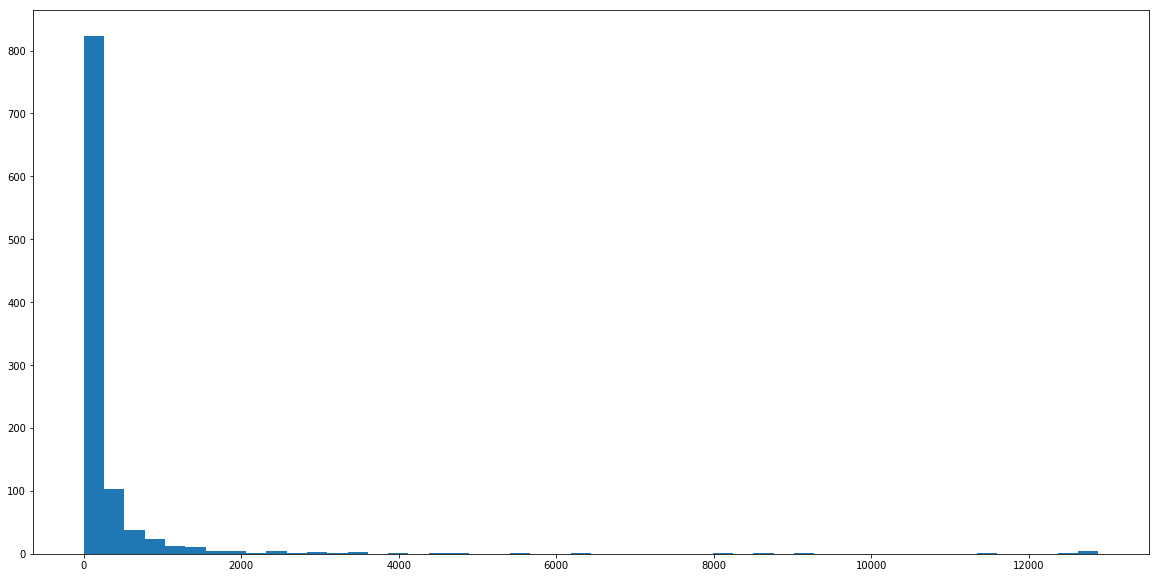

In [13]:
plt.figure(figsize=(20,10))
plt.hist(df['count'], bins=50)

## 3. Saving test data

In [6]:
with open('./data/test.bson', 'rb') as fbson:
    data = bson.decode_file_iter(fbson)
    for c, d in tqdm(enumerate(data)):
        #print(c)
        #print(d)
        valid = False
        #category = d['category_id']
        _id = d['_id']
        i = 1
        for e, pic in enumerate(d['imgs']):
            print(i)
            i += 1
            #fname = os.path.join(out_folder_test, str(category), '{}-{}.jpg'.format(_id, e))
            #with open(fname, 'wb') as f:
            #    f.write(pic['picture'])



0it [00:00, ?it/s]
757it [00:00, 7538.30it/s]

1
2
3
1
1
1
1
1
1
2
3
4
1
1
1
1
1
1
1
2
3
1
2
3
4
1
1
2
3
4
1
1
2
1
1
1
1
2
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
3
4
1
2
3
4
1
1
1
1
1
1
2
3
4
1
1
1
2
1
1
2
3
4
1
1
1
1
1
1
1
1
1
2
1
2
1
1
2
3
4
1
1
1
2
3
4
1
2
3
4
1
2
3
4
1
1
1
1
1
1
2
3
4
1
1
1
1
1
1
1
1
2
1
1
1
2
3
4
1
1
1
2
1
1
2
1
1
1
1
2
3
4
1
1
1
1
1
1
1
2
1
2
3
4
1
2
1
1
1
1
2
1
2
3
1
1
1
1
1
2
3
4
1
1
1
2
1
2
3
4
1
1
2
3
1
1
1
1
1
2
3
4
1
2
3
4
1
1
1
1
1
1
2
3
1
1
1
2
3
1
2
3
1
1
2
1
1
1
1
2
3
1
1
1
2
3
4
1
1
2
1
1
1
2
3
1
1
1
2
3
4
1
1
1
2
3
4
1
1
2
3
1
2
3
1
2
1
2
1
2
3
4
1
1
2
3
4
1
1
1
1
1
1
1
2
3
4
1
1
2
1
1
1
2
1
1
2
1
2
3
4
1
2
3
4
1
1
1
2
1
1
1
2
1
2
1
1
2
3
4
1
2
3
4
1
1
1
1
2
1
1
1
1
2
3
4
1
1
1
2
1
1
1
2
1
1
1
1
2
1
2
1
1
2
1
1
1
1
1
2
3
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
2
3
4
1
2
1
2
1
2
1
1
1
1
2
3
4
1
1
1
1
1
1
2
1
1
1
2
1
1
1
1
1
1
1
1
2
3
1
1
1
1
2
3
4
1
1
1
1
1
1
1
1
1
2
1
1
1
2
1
2
3
4
1
1
2
3
4
1
1
1
1
1
2
3
4
1
1
1
1
2
3
4
1
1
2
3
1
1
1
1
1
1
1
2
3
4
1
1
2
3
4
1
2
3
4
1
1
2
1
1
2
1
1
2
3
1
1



1543it [00:00, 7625.05it/s]
2322it [00:00, 7648.99it/s]


4
1
1
1
2
3
4
1
1
2
3
4
1
1
1
2
3
4
1
2
3
4
1
2
3
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
3
4
1
1
2
3
1
1
1
1
2
3
4
1
2
3
4
1
1
2
1
1
1
1
2
1
1
1
2
1
1
2
1
1
1
1
2
1
2
1
1
1
2
3
1
1
2
3
4
1
1
1
1
2
3
1
2
1
1
1
1
1
2
1
1
2
3
1
2
3
4
1
1
1
1
1
1
1
1
1
1
2
1
2
3
1
1
1
1
1
1
2
3
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
2
1
1
2
1
2
1
1
1
1
1
1
1
1
2
3
4
1
1
2
3
4
1
2
1
1
1
2
3
4
1
2
1
1
1
1
1
1
1
2
3
4
1
1
1
1
1
1
2
3
4
1
1
1
1
1
2
3
4
1
1
1
1
2
3
4
1
1
1
2
3
4
1
1
2
3
4
1
1
1
1
1
1
2
3
1
1
2
1
1
1
1
1
2
3
1
1
2
3
4
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
2
1
1
1
1
1
1
2
1
1
2
1
2
3
1
1
2
1
1
2
3
4
1
2
1
1
2
3
4
1
1
2
3
4
1
2
3
4
1
2
3
1
1
1
2
3
1
1
1
1
1
2
1
1
1
2
3
1
2
1
1
1
1
1
2
3
1
1
1
1
2
3
4
1
1
1
1
1
2
1
1
1
1
1
2
3
1
2
3
4
1
1
2
3
4
1
1
2
3
1
1
1
1
2
3
4
1
2
1
2
3
4
1
1
2
1
1
1
1
1
1
1
2
1
2
3
1
2
1
1
2
3
4
1
2
3
4
1
2
3
4
1
1
1
1
2
3
1
1
1
1
1
1
1
1
1
2
3
4
1
1
1
2
3
4
1
2
3
4
1
1
1
1
1
1
1
1
1
2
1
2
1
1
2
3
4
1
2
1
2
3
4
1
1
1
1
2
3
4
1
2
3
4
1
1
2
3
4
1
1
2
1
2
3
4
1
1
2
3
4


3111it [00:00, 7719.50it/s]
3928it [00:00, 7832.61it/s]


2
3
1
1
1
2
3
1
1
1
1
1
1
1
1
1
1
1
1
2
3
4
1
1
1
2
3
4
1
1
1
1
1
2
1
2
1
2
3
4
1
2
3
1
1
2
3
4
1
1
1
2
3
4
1
2
3
4
1
1
1
1
2
3
1
2
3
1
2
3
4
1
2
1
1
1
2
3
4
1
1
1
1
1
2
3
4
1
2
3
1
1
2
1
2
3
1
1
2
1
1
1
1
1
1
1
1
1
1
1
2
1
2
3
1
1
2
3
4
1
2
1
2
3
4
1
1
2
1
2
1
1
1
1
1
1
1
2
3
1
2
3
4
1
1
2
3
4
1
1
1
1
2
3
4
1
1
2
1
2
3
4
1
2
1
2
1
1
1
1
1
1
1
2
1
1
1
2
1
2
3
4
1
1
1
1
1
2
3
1
2
3
4
1
1
2
1
1
1
2
3
1
1
1
1
1
1
1
1
1
1
1
2
3
1
2
3
4
1
2
1
1
1
2
1
1
2
1
2
3
4
1
1
2
3
4
1
1
1
1
2
3
1
1
1
2
1
1
2
3
1
1
1
2
3
4
1
1
2
3
4
1
1
1
2
1
1
2
3
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
3
4
1
1
1
1
2
1
2
1
1
1
2
1
1
1
2
1
2
1
1
1
1
1
2
3
4
1
1
2
3
4
1
1
1
2
3
4
1
1
1
1
2
1
1
1
2
3
4
1
2
3
4
1
1
2
1
2
3
1
1
1
1
1
1
2
3
4
1
1
2
3
1
1
1
2
1
1
1
2
1
1
2
1
2
1
2
1
1
2
3
4
1
2
3
4
1
1
1
1
1
1
2
3
4
1
1
1
1
1
2
1
1
1
1
1
1
1
2
3
4
1
1
1
2
3
4
1
1
2
1
1
1
1
1
2
3
4
1
1
2
3
4
1
2
3
4
1
1
1
1
2
1
1
1
1
1
1
1
1
2
3
4
1
1
1
1
2
3
4
1
1
1
1
1
2
1
1
1
2
3
4
1
1
2
3
4
1
2
1
2
3
1
1
2
1
2
3
4
1
1
1
1
2
3
1
1
2


4695it [00:00, 7782.64it/s]
5498it [00:00, 7838.07it/s]


1
1
1
1
2
3
1
1
1
1
1
2
1
2
3
4
1
1
2
3
1
1
2
3
4
1
1
1
2
3
4
1
1
1
1
2
3
4
1
1
1
1
2
1
1
1
1
1
2
3
1
1
1
1
2
3
4
1
1
1
1
1
1
2
3
4
1
2
1
1
1
1
1
1
1
1
2
3
4
1
2
3
4
1
1
2
3
4
1
1
2
3
4
1
2
1
1
2
3
4
1
1
1
2
1
1
1
2
3
1
1
2
3
4
1
1
2
1
1
1
1
2
3
4
1
1
1
1
1
1
1
1
2
1
1
1
1
2
1
1
1
1
1
1
1
2
3
4
1
1
1
1
1
1
2
3
1
1
2
3
4
1
2
3
4
1
1
1
2
3
1
2
3
4
1
2
3
1
1
2
3
4
1
2
1
1
2
3
1
2
3
1
1
2
3
4
1
1
1
2
3
4
1
1
1
1
1
1
1
2
3
1
2
3
1
2
3
4
1
1
2
3
4
1
1
1
1
1
1
2
3
1
2
3
4
1
1
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
1
1
1
1
2
1
1
1
1
1
1
1
1
2
3
4
1
2
3
4
1
1
1
1
1
1
2
3
4
1
2
3
4
1
1
2
1
1
2
3
4
1
1
1
1
1
1
1
1
1
1
2
3
1
1
1
1
2
3
4
1
1
1
2
1
1
2
3
4
1
1
1
1
1
1
1
1
1
2
3
4
1
2
3
4
1
1
1
1
1
2
1
1
2
1
2
3
4
1
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
1
2
1
1
2
3
4
1
1
1
1
2
1
1
1
1
1
2
3
4
1
1
1
1
2
3
4
1
1
2
1
2
1
2
1
1
1
2
3
4
1
2
1
1
1
1
1
1
1
1
2
1
1
2
3
4
1
1
1
1
1
2
3
4
1
1
1
1
1
1
1
1
1
1
1
1
2
3
4
1
1
2
3
1
2
3
1
1
1
1
1
2
3
4
1
2
3
4
1
1
2
3
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
2
3


6288it [00:00, 7856.42it/s]
7130it [00:00, 7999.99it/s]

1
2
1
1
1
2
3
4
1
1
2
1
2
1
1
1
1
2
1
1
1
1
1
1
1
1
1
2
3
4
1
1
1
2
3
4
1
2
1
1
2
3
4
1
2
3
4
1
1
1
1
2
3
4
1
1
2
3
4
1
1
1
2
3
1
2
3
4
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
2
3
1
1
1
1
1
2
1
1
2
3
4
1
1
2
3
1
1
2
3
4
1
1
1
1
1
2
1
1
2
3
4
1
1
1
1
1
1
2
3
4
1
1
1
1
2
1
1
1
1
1
1
2
3
4
1
1
2
3
4
1
2
1
2
1
1
1
2
1
1
1
1
2
1
1
1
1
1
2
1
1
1
1
1
1
2
1
1
2
1
2
3
4
1
2
3
4
1
1
1
1
1
1
1
1
1
1
1
1
1
2
3
4
1
2
3
4
1
1
2
1
1
1
1
2
3
4
1
2
3
4
1
1
2
3
4
1
1
1
1
1
2
3
4
1
1
2
3
4
1
1
1
1
1
1
1
1
2
3
4
1
1
1
2
1
2
3
1
1
1
2
3
4
1
1
1
2
3
4
1
2
3
4
1
2
3
4
1
1
1
2
1
1
2
3
4
1
2
3
4
1
1
1
1
1
2
1
1
1
1
2
1
1
2
3
4
1
2
1
1
1
1
1
2
3
1
1
2
1
1
1
1
2
3
4
1
1
1
1
1
1
2
3
4
1
1
1
2
1
1
1
1
1
2
3
1
2
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
2
1
2
1
2
3
4
1
2
3
4
1
1
1
1
1
1
2
3
1
2
1
1
1
1
1
1
2
3
4
1
1
2
1
1
1
2
3
4
1
1
2
1
2
1
1
1
1
2
3
4
1
1
1
1
1
1
1
2
3
1
2
3
4
1
2
1
1
1
1
2
1
2
3
4
1
1
1
2
3
4
1
1
2
3
4
1
2
3
4
1
1
1
1
2
1
1
1
2
1
2
1
1
1
1
1
1
1
1
1
2
3
4
1
1
1
1
1
2
3
4
1
1
1
1
1
1
1
1
1
1
2
3
4
1



7974it [00:01, 8126.69it/s]
8767it [00:01, 7645.94it/s]


2
3
4
1
1
1
2
3
1
1
1
2
3
4
1
1
2
1
2
1
1
1
1
1
2
3
4
1
1
1
2
1
1
1
1
2
3
4
1
1
2
3
4
1
1
2
3
1
2
3
4
1
2
3
4
1
1
2
3
4
1
2
3
4
1
1
1
1
1
2
3
4
1
1
1
2
3
4
1
1
2
3
4
1
1
1
1
1
1
1
1
2
1
1
2
3
4
1
2
3
1
1
1
1
1
1
1
1
1
1
1
2
3
4
1
2
3
4
1
1
2
3
4
1
2
1
1
1
1
1
2
3
4
1
2
3
4
1
1
1
2
3
4
1
2
1
2
3
4
1
1
2
3
4
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
3
4
1
1
2
3
4
1
1
2
3
4
1
1
1
2
3
1
1
1
1
2
3
4
1
1
2
3
4
1
2
3
4
1
1
1
1
2
3
4
1
1
1
2
1
1
1
1
1
2
3
4
1
2
3
1
2
3
4
1
1
2
1
1
2
3
1
1
1
1
2
3
1
1
1
1
2
3
4
1
1
1
1
2
3
4
1
2
3
4
1
1
2
3
4
1
2
1
1
1
1
2
1
1
1
2
3
1
2
3
4
1
2
3
4
1
1
1
1
1
1
1
2
3
4
1
1
1
2
3
1
1
1
1
1
2
1
1
1
2
3
4
1
1
1
2
3
4
1
1
2
3
1
1
2
3
4
1
2
3
4
1
1
1
2
1
1
2
1
1
1
2
1
2
3
1
1
2
1
1
1
2
3
4
1
1
2
1
1
1
2
3
1
1
1
1
1
1
1
2
3
4
1
1
2
3
4
1
1
2
3
1
2
1
2
3
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
3
4
1
2
3
4
1
1
1
1
2
3
1
2
1
2
3
4
1
1
1
1
1
1
2
3
4
1
2
1
1
1
1
1
1
1
2
3
4
1
1
1
2
1
1
1
1
1
1
1
1
2
1
2
1
2
3
4
1
1
1
1
2
1
1
1
2
3
1
2
1
1
2
3
4
1
2
3
1
2
3
4
1
2
3
4
1
1
2
3
4
1


9524it [00:01, 7482.27it/s]
10268it [00:01, 7328.99it/s]


1
2
3
1
1
1
1
1
1
2
3
4
1
1
1
1
1
1
2
3
1
1
1
1
2
3
4
1
2
3
4
1
2
3
4
1
1
1
1
2
3
1
2
3
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
2
1
2
3
1
1
1
1
1
1
1
1
1
1
2
3
4
1
1
1
1
1
1
1
2
3
1
2
3
4
1
1
1
1
1
1
1
2
1
1
1
1
1
2
1
1
1
2
1
1
1
1
2
3
4
1
2
3
4
1
1
1
1
1
2
3
1
1
1
1
1
1
1
1
1
1
2
3
1
1
2
1
2
1
1
1
2
3
1
1
2
3
4
1
2
3
4
1
1
2
3
4
1
1
1
2
1
1
1
1
1
1
2
3
1
1
1
1
1
2
1
1
1
2
1
1
2
3
4
1
1
1
1
1
1
1
1
1
1
1
1
2
3
4
1
1
2
3
4
1
2
3
4
1
1
2
3
4
1
1
2
1
1
1
1
2
1
1
1
1
1
1
1
2
3
4
1
1
1
1
1
2
3
4
1
1
1
1
1
2
3
4
1
1
1
2
3
4
1
1
1
2
1
1
2
3
4
1
2
1
2
3
1
2
3
4
1
1
1
1
1
1
1
2
3
4
1
1
2
1
1
2
3
4
1
2
3
4
1
1
2
3
4
1
2
3
1
1
1
1
1
1
1
1
1
2
1
2
3
1
1
1
1
1
2
3
4
1
1
1
2
3
1
2
1
1
1
1
1
1
1
2
3
4
1
1
1
1
1
1
1
2
3
1
1
1
1
1
1
1
1
1
1
1
1
2
3
4
1
1
1
2
1
1
1
2
3
4
1
1
1
1
1
2
1
1
1
2
1
1
2
3
1
2
1
1
1
2
3
4
1
1
1
1
2
3
4
1
1
1
1
1
1
2
3
4
1
2
1
1
2
3
1
2
3
4
1
1
2
3
4
1
2
1
1
1
1
1
2
1
1
1
1
1
2
1
1
2
1
1
1
1
1
1
2
3
4
1
1
1
1
1
1
1
2
1
1
1
1
2
3
1
1
1
1
1
2
3
1
1
1
2
3
4
1
1
1
1
2
1
1
1
1
2
3
4
1
2
3
4
1


11007it [00:01, 7346.60it/s]
11740it [00:01, 7158.50it/s]


1
1
1
1
2
3
4
1
1
1
1
2
3
1
1
2
3
4
1
1
2
3
1
1
1
2
3
1
1
1
1
1
1
1
1
2
1
1
1
2
3
4
1
1
1
2
3
4
1
1
1
2
3
4
1
1
2
3
4
1
1
1
1
2
3
1
1
1
2
3
1
2
3
1
2
3
1
2
1
1
1
2
3
4
1
1
1
1
2
1
1
1
1
2
3
4
1
2
1
1
1
2
3
4
1
1
2
1
1
2
1
1
1
1
1
2
3
4
1
1
2
3
4
1
1
1
2
3
4
1
1
1
1
1
1
1
2
1
2
1
2
1
1
1
1
1
1
2
1
1
1
1
2
1
2
1
1
1
1
2
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
3
4
1
1
2
3
4
1
2
3
4
1
1
1
1
1
2
1
1
1
1
1
1
1
2
3
4
1
2
1
1
1
1
1
1
1
1
1
2
1
1
1
1
2
1
2
1
1
1
1
1
2
3
4
1
1
1
1
1
1
1
1
1
2
1
1
2
3
1
1
1
1
1
1
1
2
3
4
1
2
3
4
1
1
2
3
1
1
1
1
2
1
1
2
1
1
1
2
1
2
3
4
1
1
2
3
1
1
1
2
1
1
1
2
3
4
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
2
3
1
2
3
1
1
1
1
1
2
3
4
1
1
1
1
1
1
1
2
1
1
2
3
4
1
1
2
3
4
1
1
2
3
4
1
1
1
1
2
3
4
1
1
1
1
1
1
2
1
1
1
2
3
4
1
2
1
1
2
3
4
1
1
2
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
2
1
1
1
1
1
2
3
1
1
1
2
1
2
3
1
1
1
2
3
1
2
3
1
1
1
1
1
1
1
2
1
1
1
1
2
3
4
1
1
1
2
3
4
1
1
1
1
2
3
4
1
1
1
2
3
4
1
2
1
1
1
2
3
4
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
2
1
1
1
2
3
4
1
1
1


12456it [00:01, 6870.13it/s]
13146it [00:01, 6682.72it/s]

2
3
4
1
1
1
1
2
1
1
1
2
3
4
1
1
2
1
1
2
3
4
1
2
3
1
1
1
1
1
1
1
1
1
2
3
1
1
1
1
2
1
2
3
4
1
2
3
4
1
2
3
1
2
3
1
1
2
3
4
1
1
1
2
1
1
1
2
1
1
2
3
4
1
1
1
1
1
1
2
3
4
1
2
3
1
2
3
4
1
2
3
1
2
1
1
1
2
3
4
1
1
2
3
1
2
1
1
2
3
4
1
1
1
1
1
2
3
1
1
2
3
1
1
1
2
3
4
1
1
2
3
4
1
2
1
2
1
2
3
4
1
1
2
3
4
1
1
2
1
1
1
2
1
1
1
1
2
1
1
2
3
4
1
2
1
2
3
1
2
1
1
2
1
1
2
3
4
1
1
1
2
1
1
2
3
4
1
2
1
2
3
4
1
1
2
3
4
1
1
1
2
1
1
2
3
4
1
1
2
3
4
1
1
2
3
4
1
2
3
4
1
1
1
1
1
1
1
2
1
1
1
2
3
4
1
1
1
1
2
3
1
2
3
4
1
2
1
1
2
3
1
1
2
3
4
1
2
3
4
1
1
2
3
4
1
1
1
2
1
2
3
1
2
3
1
1
2
3
1
2
3
4
1
2
1
1
2
1
1
2
3
4
1
2
3
4
1
1
1
2
3
1
1
1
2
1
2
1
1
2
3
4
1
1
1
1
1
1
2
3
1
1
1
1
1
2
1
1
1
2
1
1
1
2
1
1
2
3
4
1
1
2
3
4
1
2
1
2
3
4
1
1
2
1
1
1
2
3
1
1
2
1
2
3
1
1
1
1
1
1
2
1
2
1
1
2
3
4
1
1
2
1
2
1
1
1
1
1
1
2
3
4
1
1
1
1
2
1
1
1
1
2
3
1
1
1
1
2
1
1
2
3
4
1
1
2
1
2
3
4
1
1
1
2
1
2
1
1
2
3
4
1
2
1
1
1
2
3
1
1
2
3
1
2
1
1
2
3
4
1
2
3
4
1
1
1
1
2
1
1
1
1
1
1
2
3
4
1
2
3
4
1
1
1
2
3
4
1
1
2
3
1
2
1
1
1
2
3
4
1
1
2
3
1
1
1
1
2
1



13817it [00:01, 6511.78it/s]
14472it [00:01, 6425.21it/s]

1
2
3
4
1
1
1
1
1
1
2
3
4
1
1
2
3
1
2
3
1
2
3
1
1
2
1
1
1
2
3
4
1
1
2
1
1
2
3
4
1
1
1
2
3
1
1
2
3
4
1
2
3
4
1
1
1
2
3
4
1
2
1
1
2
1
1
1
2
1
2
3
1
1
1
1
2
3
4
1
1
1
1
2
3
4
1
2
3
4
1
1
1
2
1
1
1
2
1
1
2
3
4
1
1
1
1
2
3
1
1
2
3
1
1
2
3
1
1
1
1
1
2
1
2
3
4
1
1
1
2
3
4
1
1
2
3
4
1
2
3
1
1
2
3
1
2
1
1
1
1
1
2
3
1
1
2
1
1
1
1
1
1
2
3
4
1
1
2
1
1
1
1
1
2
3
4
1
1
1
2
1
2
3
4
1
1
1
2
3
4
1
1
1
1
1
2
3
1
2
1
1
2
3
4
1
2
3
1
1
2
1
1
1
2
1
1
2
3
4
1
1
1
2
1
1
2
1
2
3
4
1
1
2
1
2
3
4
1
1
2
3
4
1
2
3
4
1
1
1
2
1
1
1
2
1
1
1
2
3
4
1
2
3
4
1
1
1
2
3
4
1
2
1
2
3
4
1
2
3
4
1
2
1
1
1
1
1
1
1
2
3
4
1
2
3
4
1
1
2
1
2
1
2
1
2
1
1
2
1
2
3
4
1
1
2
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
1
1
1
1
1
2
3
4
1
1
1
2
1
2
3
4
1
2
3
1
1
1
1
2
3
1
1
2
3
4
1
1
2
1
1
2
3
4
1
2
3
4
1
2
1
1
2
3
4
1
1
1
2
3
4
1
1
2
3
4
1
1
1
2
1
2
3
4
1
2
3
4
1
1
2
1
1
1
1
1
2
1
1
2
1
1
2
1
2
3
4
1
2
3
4
1
1
1
1
2
3
1
1
1
2
1
2
3
4
1
2
3
1
1
2
1
1
1
2
1
1
1
1
1
2
1
2
1
2
3
1
2
1
2
1
1
1
2
1
2
3
4
1
2
1
2
1
2
3
1
2
3
4
1
2
3
4
1
2
3
4
1
1
2
3
4
1



15117it [00:02, 6349.42it/s]
15754it [00:02, 6316.51it/s]

1
2
3
1
1
1
1
2
3
4
1
1
1
1
2
3
4
1
2
1
1
1
1
2
3
4
1
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
1
1
2
3
1
1
1
1
1
1
1
1
2
3
4
1
1
2
1
1
2
3
4
1
2
1
1
1
2
3
4
1
2
3
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
1
1
1
1
1
1
1
1
2
1
2
3
4
1
1
1
1
2
3
1
2
1
1
1
2
3
4
1
1
1
1
1
1
2
3
4
1
1
1
1
1
1
1
2
3
4
1
1
2
3
4
1
1
1
1
2
1
1
2
3
1
1
1
2
3
1
1
1
1
1
2
3
4
1
1
2
3
4
1
1
1
1
1
1
2
3
4
1
1
2
3
4
1
1
1
2
3
4
1
2
3
1
1
1
2
3
4
1
2
3
1
1
1
1
2
3
1
1
1
2
1
2
3
4
1
1
2
3
1
2
1
1
2
3
4
1
2
3
1
2
1
1
2
3
1
2
3
4
1
1
2
3
1
1
1
2
1
1
1
1
1
2
1
1
1
1
1
1
2
3
4
1
2
3
4
1
2
3
1
1
1
2
3
1
1
2
1
2
3
4
1
1
1
1
1
2
3
4
1
1
1
1
1
2
3
4
1
2
3
1
1
2
3
4
1
1
1
2
3
4
1
1
2
1
1
1
1
2
3
1
2
3
4
1
1
2
1
2
1
1
1
2
1
1
1
1
1
1
2
3
4
1
1
1
2
1
1
1
1
2
3
1
1
1
2
3
1
1
2
3
1
1
2
1
1
1
1
1
1
1
1
1
2
3
4
1
2
3
4
1
2
3
4
1
1
1
2
3
4
1
1
2
3
4
1
1
1
1
2
3
4
1
1
2
1
1
1
1
1
2
3
4
1
2
1
1
2
3
4
1
2
3
4
1
1
1
2
3
4
1
2
3
4
1
1
2
3
4
1
2
3
4
1
1
1
2
3
4
1
2
1
1
1
1
2
3
4
1
2
3
1
2
3
4
1
1
1
2
3
1
1
1
1
1
2
1
1
2
3
1
2
1
1
1
2
3



16387it [00:02, 6263.98it/s]
17015it [00:02, 6006.18it/s]

1
1
2
3
4
1
1
1
2
3
4
1
2
3
4
1
1
1
2
1
2
3
4
1
1
1
1
1
2
3
4
1
2
3
1
1
2
3
4
1
1
2
3
4
1
1
2
3
1
2
1
1
2
3
4
1
1
2
3
4
1
1
1
2
3
4
1
2
1
2
3
4
1
1
2
3
1
1
2
3
1
2
3
4
1
2
3
1
1
1
1
1
2
3
4
1
1
2
3
4
1
1
1
1
1
1
1
2
3
4
1
2
1
1
2
3
1
1
2
3
1
1
1
2
3
1
2
3
4
1
1
1
2
3
1
1
2
1
2
1
2
3
4
1
2
3
4
1
2
1
2
3
1
1
2
1
1
2
3
1
1
2
1
2
3
1
1
1
1
2
3
4
1
2
1
1
1
1
1
1
1
1
2
3
1
1
1
2
1
1
2
3
4
1
2
3
1
1
1
2
1
1
1
2
3
4
1
2
1
2
3
4
1
1
1
2
3
4
1
2
3
4
1
2
1
1
1
1
2
3
4
1
1
1
2
1
2
3
1
1
1
2
3
4
1
1
1
1
2
3
4
1
1
2
3
4
1
2
3
1
1
2
1
1
2
3
1
2
3
4
1
1
1
1
1
1
2
3
4
1
1
1
2
1
1
2
1
2
3
4
1
2
3
4
1
1
2
3
4
1
1
2
1
1
2
3
4
1
1
1
1
2
3
1
1
2
3
4
1
1
2
1
1
1
1
2
3
4
1
2
1
1
2
3
1
1
1
2
3
1
2
1
1
1
1
1
2
3
4
1
2
3
1
1
1
2
1
1
2
1
2
3
4
1
1
2
3
4
1
1
2
3
4
1
1
1
2
1
1
1
2
1
1
1
1
2
3
1
1
2
1
1
1
1
1
1
2
3
1
1
2
3
4
1
1
1
2
1
2
1
1
1
1
1
2
3
1
1
2
3
1
1
1
1
1
2
3
1
1
1
1
1
1
1
2
3
4
1
2
1
2
1
1
1
2
3
1
2
1
1
2
3
4
1
2
3
4
1
1
2
3
4
1
2
1
2
1
2
1
1
1
2
3
4
1
1
2
1
1
2
1
2
1
1
2
3
4
1
1
2
3
4
1
1
1
1
1
1
1
2



17619it [00:02, 5546.75it/s]

1
2
3
4
1
2
3
4
1
1
1
1
2
3
1
2
3
4
1
1
1
1
1
2
3
4
1
1
1
2
3
1
2
1
2
3
4
1
1
1
2
1
1
1
1
2
1
1
1
2
3
4
1
1
2
3
4
1
1
2
1
2
3
4
1
1
2
1
1
2
1
1
2
3
1
1
2
1
1
1
1
1
2
3
1
2
1
1
1
1
1
1
2
3
4
1
1
1
2
1
1
2
3
4
1
1
2
3
4
1
2
1
1
2
1
2
3
4
1
1
2
3
4
1
1
1
2
1
2
3
1
2
1
2
3
4
1
2
3
4
1
1
2
3
4
1
2
1
1
1
2
3
1
2
1
1
1
1
2
3
4
1
2
3
1
1
1
1
1
1
2
3
4
1
1
2
3
4
1
2
1
2
1
2
3
4
1
1
1
1
1
2
1
2
1
1
2
3
4
1
2
3
1
1
1
2
3
4
1
1
1
1
1
1
1
2
1
2
3
1
1
1
1
1
2
1
2
1
1
2
3
4
1
2
1
1
2
3
4
1
2
1
2
3
1
2
3
1
1
1
1
2
1
2
3
4
1
2
3
4
1
1
1
1
1
2
3
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
3
1
1
2
3
4
1
2
1
2
3
1
1
1
2
3
4
1
1
2
1
1
1
2
1
2
3
4
1
1
1
1
2
3
1
1
1
2
3
4
1
1
2
3
4
1
2
1
1
1
2
3
4
1
1
1
1
2
3
4
1
2
1
2
3
4
1
2
1
2
3
1
1
2
3
4
1
2
3
4
1
1
1
1
2
1
2
1
1
2
3
4
1
2
3
1
1
2
1
1
2
3
4
1
1
1
1
1
2
3
4
1
1
1
2
3
1
1
2
3
1
1
2
3
1
1
1
1
1
1
2
3
4
1
1
2
1
2
3
4
1
1
2
1
1
1
1
1
1
2
1
2
3
1
1
1
2
3
4
1
2
1
1
2
3
4
1
1
1
1
2
1
1
2
3
4
1
2
3
4
1
2
1
1
2
3
4
1
2
1
2
1
1
1
2
3
4
1
1
1
2
3
4
1
1
1
2
3
1
1
1
1
1
1
1
2
3



18183it [00:02, 5352.81it/s]
18727it [00:02, 5259.58it/s]


1
1
2
1
1
1
2
3
4
1
1
2
3
4
1
2
3
4
1
1
1
1
1
1
1
2
1
2
3
4
1
1
2
3
4
1
1
2
3
4
1
1
1
2
3
4
1
1
1
2
3
4
1
1
1
1
1
2
1
2
1
1
1
1
1
2
3
4
1
2
3
4
1
2
1
2
3
4
1
1
1
2
3
4
1
2
3
4
1
1
2
3
4
1
2
3
4
1
2
1
2
3
4
1
1
1
1
1
2
1
2
3
4
1
2
3
4
1
1
2
3
4
1
1
2
1
1
2
3
4
1
1
1
1
1
2
1
1
2
3
4
1
2
3
4
1
2
3
1
1
1
2
1
2
3
1
2
3
4
1
1
1
1
1
1
1
1
2
3
1
2
3
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
3
4
1
1
1
1
2
1
2
3
1
1
1
1
1
2
3
4
1
2
3
1
1
2
3
4
1
1
2
1
1
1
2
1
2
3
4
1
1
1
1
1
1
1
1
2
3
1
2
3
4
1
2
3
4
1
2
3
4
1
1
1
1
2
1
1
1
1
2
1
2
1
2
3
4
1
1
2
3
4
1
1
2
3
1
2
1
2
3
4
1
1
1
1
2
3
4
1
2
3
4
1
2
3
1
1
1
2
3
4
1
2
3
4
1
1
1
1
1
1
2
1
1
2
3
4
1
1
1
2
3
4
1
1
1
1
1
1
2
3
4
1
2
3
4
1
1
2
1
1
2
3
4
1
1
1
1
2
1
1
2
1
2
1
2
3
1
1
1
2
3
4
1
1
1
1
2
1
1
1
1
2
1
1
2
1
1
2
3
4
1
1
2
3
4
1
1
1
2
1
2
3
4
1
1
2
3
1
1
1
2
3
4
1
1
1
1
1
2
3
4
1
1
1
1
2
3
4
1
1
1
1
2
3
4
1
1
1
1
1
1
2
3
1
1
1
2
1
1
1
2
1
1
1
1
2
3
4
1
1
2
3
1
2
1
2
3
4
1
1
2
1
1
2
1
2
3
1
1
1
2
1
2
1
1
1
1
1
2
1
2
3
4
1
1
1
1
1
2
3
4
1
2
1
1
1
2
1


19259it [00:02, 5111.09it/s]
19776it [00:02, 5036.75it/s]


1
1
2
3
1
1
1
2
1
1
1
2
3
4
1
2
3
4
1
2
3
4
1
1
1
2
1
2
1
2
1
1
1
1
1
1
2
1
2
1
2
3
1
2
3
4
1
1
1
2
1
2
3
1
2
3
1
1
2
3
4
1
1
1
2
3
4
1
2
3
1
2
3
4
1
1
1
1
1
2
3
4
1
2
1
1
1
1
1
2
3
1
1
1
1
1
1
1
1
2
3
1
1
2
3
1
1
1
1
1
2
3
4
1
1
1
2
1
1
2
1
2
1
2
3
4
1
1
2
1
2
1
1
2
1
1
1
2
3
4
1
2
3
1
2
1
2
3
1
1
2
3
4
1
2
3
4
1
2
3
4
1
1
2
3
1
2
3
1
1
1
1
2
1
2
3
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
1
1
1
2
1
1
1
1
1
2
1
2
3
4
1
1
2
3
4
1
1
2
1
1
1
2
3
4
1
1
1
1
2
1
1
1
1
2
3
1
2
3
1
2
1
2
1
2
3
1
1
2
3
4
1
2
3
1
2
3
4
1
1
1
1
1
1
1
1
2
3
4
1
2
3
4
1
1
1
2
1
2
3
4
1
2
1
1
2
3
4
1
2
3
4
1
2
3
4
1
1
2
3
4
1
2
3
4
1
2
1
2
1
1
1
1
2
3
1
1
1
2
3
1
1
1
2
3
1
1
1
2
3
1
2
1
1
2
3
4
1
1
1
2
3
4
1
1
2
1
1
1
2
1
2
3
4
1
2
1
2
3
4
1
2
3
1
1
1
2
3
4
1
2
3
1
1
1
2
1
1
1
1
1
2
3
4
1
2
1
1
1
1
2
3
4
1
1
1
1
1
1
2
1
2
3
4
1
1
2
3
4
1
2
1
2
3
4
1
2
3
1
2
1
2
1
1
1
1
1
1
2
3
4
1
1
2
3
4
1
1
1
1
2
1
2
1
1
1
2
3
1
2
3
1
2
3
1
2
1
1
1
2
1
1
1
1
1
1
2
1
1
1
1
1
2
3
4
1
2
3
4
1
1
2
3
4
1
1
1
1
2
3
1
1
1
1


20284it [00:03, 4923.80it/s]
20792it [00:03, 4968.97it/s]


2
1
1
2
1
2
3
4
1
2
1
1
2
3
4
1
2
3
4
1
1
2
3
4
1
2
1
1
1
2
1
1
2
1
2
1
1
1
2
3
4
1
2
1
2
1
2
3
1
2
1
1
2
3
1
1
2
3
1
1
1
1
2
3
4
1
2
3
4
1
2
3
4
1
1
2
1
1
2
3
1
1
1
1
1
2
3
1
1
1
1
2
3
4
1
1
2
1
1
1
2
1
1
2
3
4
1
2
3
4
1
1
2
1
1
2
1
1
1
1
1
1
1
1
1
2
3
4
1
1
2
3
4
1
1
2
3
4
1
1
2
3
4
1
1
2
3
4
1
1
1
2
1
2
1
1
2
3
4
1
2
3
4
1
1
1
2
1
2
1
1
1
1
1
1
1
1
1
1
1
1
2
1
2
3
1
2
3
4
1
2
1
1
2
3
4
1
2
3
4
1
2
1
1
1
1
1
2
1
2
1
2
3
4
1
1
1
2
3
1
2
3
1
1
2
1
2
3
4
1
1
2
1
1
1
1
2
3
1
2
1
1
1
2
1
1
1
2
1
1
1
2
3
4
1
1
1
2
3
1
1
1
1
1
1
2
3
1
2
1
2
1
2
3
4
1
1
1
1
1
1
2
3
4
1
2
3
4
1
1
2
3
4
1
2
1
1
1
1
2
3
1
2
1
1
1
1
2
3
4
1
1
1
1
1
2
3
1
1
2
3
4
1
2
3
4
1
1
1
2
1
2
1
2
3
4
1
1
1
2
3
4
1
2
3
1
1
1
2
3
4
1
1
1
1
1
1
1
1
2
1
2
3
4
1
2
1
2
1
2
3
4
1
1
2
3
4
1
1
2
3
4
1
2
1
1
1
2
3
4
1
1
1
1
2
1
1
1
1
1
1
2
3
4
1
2
1
1
1
1
2
3
1
2
3
1
1
2
3
4
1
1
1
2
3
4
1
1
2
3
4
1
1
2
1
1
2
3
4
1
1
2
1
1
2
1
1
2
3
4
1
2
1
1
1
2
1
1
1
1
1
2
3
4
1
2
1
1
1
1
2
3
4
1
1
2
3
4
1
2
1
2
3
4
1
2
1
1
2
3
4
1
2
3
4
1
1
2
3
1


21305it [00:03, 5009.26it/s]
21812it [00:03, 5015.38it/s]


2
1
1
2
1
1
1
1
1
2
3
4
1
2
1
1
2
1
2
3
1
1
2
1
1
1
2
3
4
1
2
1
2
1
2
1
1
2
1
2
1
2
1
1
1
1
1
1
1
2
3
1
1
1
1
1
1
1
2
3
4
1
1
2
1
2
1
1
1
1
1
1
1
1
2
3
1
1
2
3
1
1
2
3
4
1
2
3
4
1
2
1
1
2
3
4
1
2
3
4
1
1
1
1
2
3
1
1
1
2
3
1
2
1
1
1
2
3
4
1
1
1
2
1
2
3
1
2
3
1
2
1
2
1
2
3
1
2
3
1
1
2
3
4
1
2
1
2
3
1
2
3
1
2
3
4
1
2
3
4
1
1
1
1
1
1
2
1
2
3
4
1
2
1
1
1
2
3
4
1
2
3
4
1
1
1
1
1
1
2
1
1
1
2
3
4
1
1
1
1
1
2
1
1
2
3
1
2
3
4
1
2
3
4
1
1
1
1
1
1
1
2
3
4
1
2
3
1
1
2
1
1
2
3
4
1
2
3
4
1
1
1
1
1
1
2
1
1
1
2
3
4
1
1
2
3
1
2
1
1
2
1
2
3
4
1
2
3
4
1
1
1
1
1
2
3
4
1
2
1
2
1
2
3
4
1
1
2
3
1
1
2
1
1
2
1
2
3
1
1
1
1
2
3
4
1
1
1
1
1
2
1
2
1
1
1
2
3
1
1
2
1
1
2
3
4
1
1
1
2
1
1
1
1
2
3
4
1
2
3
1
2
3
4
1
1
1
1
1
1
1
2
1
1
1
1
2
3
4
1
1
2
1
1
1
1
1
2
3
4
1
2
3
1
2
3
4
1
1
1
2
1
2
3
4
1
2
1
2
1
1
1
1
1
1
1
2
3
4
1
1
2
3
1
1
2
3
1
1
2
3
4
1
1
1
1
2
3
1
1
1
1
2
1
1
2
3
4
1
1
2
1
1
1
1
1
1
1
2
3
1
2
1
1
1
2
1
2
3
1
1
2
3
4
1
1
2
3
1
2
3
1
1
1
1
1
2
3
4
1
1
1
2
1
1
1
1
2
3
4
1
1
1
1
1
2
1
1
1
2
1
1
1
1
1
1
1
1
1
2


22327it [00:03, 5051.51it/s]
22834it [00:03, 5026.73it/s]

1
1
1
1
1
1
1
2
3
1
2
3
4
1
1
2
3
4
1
2
1
1
1
2
1
1
1
1
2
3
1
1
1
2
1
1
2
3
4
1
2
3
4
1
2
3
4
1
1
1
1
1
1
1
1
2
3
4
1
1
1
2
3
4
1
1
1
1
2
3
1
2
3
1
1
1
2
3
1
1
1
1
2
3
1
2
3
1
1
2
3
1
2
3
1
1
2
3
1
1
2
1
1
1
1
1
2
3
1
2
3
1
1
1
2
3
4
1
1
2
3
1
2
3
4
1
1
1
1
1
2
1
1
2
1
2
1
1
2
3
4
1
2
3
1
2
3
1
1
1
1
1
2
3
1
1
2
3
1
1
1
1
1
1
1
2
1
1
1
1
2
3
1
1
1
1
1
1
2
1
1
1
2
3
4
1
1
1
1
1
2
1
1
2
3
1
2
3
1
1
1
1
1
1
1
1
2
3
4
1
2
3
4
1
2
3
4
1
1
1
2
1
1
1
1
1
1
1
2
1
1
1
2
3
4
1
1
1
1
1
1
2
3
4
1
1
1
2
1
2
3
4
1
1
1
2
3
1
1
1
1
1
1
2
3
4
1
1
1
1
1
2
1
1
1
2
3
1
1
1
1
1
1
1
2
1
1
2
1
1
1
1
2
1
2
1
1
1
2
1
1
1
2
3
4
1
1
2
3
1
1
2
1
1
2
3
1
1
2
3
4
1
1
1
1
1
1
2
3
4
1
1
1
2
3
4
1
2
3
4
1
2
3
4
1
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
1
2
3
1
2
1
2
3
1
1
2
3
4
1
1
2
1
2
1
2
1
1
1
2
3
4
1
2
3
4
1
1
2
3
1
1
1
2
3
4
1
1
1
2
1
1
1
1
1
1
1
1
1
2
1
1
1
2
1
1
1
2
1
1
1
1
1
2
3
1
2
3
4
1
1
2
1
1
2
3
4
1
2
1
1
1
1
1
1
1
2
3
4
1
2
3
1
1
1
2
3
1
2
3
4
1
1
1
2
1
2
3
4
1
2
3
4
1
1
1
1
1
1
1
1
1
1
2
3
4
1
2
1
2
3
4
1
2



23338it [00:03, 5008.78it/s]
23865it [00:03, 5080.34it/s]


2
3
4
1
1
1
1
1
1
1
2
1
1
2
1
2
3
4
1
2
3
4
1
2
3
1
1
2
3
1
1
1
1
1
1
1
2
3
4
1
1
1
1
1
2
3
4
1
1
1
1
2
1
1
1
1
1
2
3
4
1
2
3
4
1
1
1
2
3
1
1
1
2
1
1
1
1
1
2
3
4
1
1
2
3
4
1
1
1
1
2
3
1
1
2
3
1
1
2
1
2
3
1
2
3
1
2
1
2
1
1
1
1
1
1
2
3
1
1
1
2
3
4
1
1
1
1
1
1
2
1
2
3
4
1
1
2
1
1
2
3
4
1
1
1
2
1
1
1
1
1
2
1
1
1
2
1
2
3
4
1
1
1
1
1
1
2
1
2
1
2
3
4
1
1
2
1
1
2
1
1
1
2
3
1
1
1
2
3
4
1
1
2
1
1
1
1
2
1
1
1
1
2
3
4
1
1
1
1
2
3
1
1
2
3
4
1
1
1
2
3
1
2
3
4
1
1
1
2
3
1
1
2
1
1
2
3
4
1
2
1
1
2
3
4
1
1
1
1
2
3
4
1
1
2
1
1
2
3
1
2
3
1
1
2
1
1
1
2
3
4
1
1
2
3
4
1
1
2
3
4
1
2
3
1
1
1
2
1
2
1
2
1
2
3
4
1
1
1
2
1
1
1
2
1
1
1
1
1
1
1
2
1
1
2
1
1
1
2
3
4
1
2
1
1
1
1
2
3
1
1
2
3
1
2
1
1
2
3
4
1
2
3
4
1
1
2
3
1
1
1
1
1
1
1
2
3
1
2
3
1
1
2
1
1
1
2
3
4
1
1
2
3
1
1
2
3
4
1
1
1
2
3
1
2
3
1
2
3
4
1
2
3
4
1
2
3
4
1
1
1
1
2
1
2
1
1
1
1
1
2
3
1
1
1
2
3
4
1
1
1
2
3
1
1
1
1
2
1
2
1
2
3
4
1
2
1
2
1
1
2
3
4
1
1
1
1
2
1
2
3
1
2
3
1
2
1
1
1
2
3
4
1
1
1
2
1
1
1
2
3
4
1
2
3
1
2
3
4
1
1
2
3
4
1
1
2
3
4
1
1
1
1
1
1
2
1
1
2
1


24374it [00:03, 5051.48it/s]
24885it [00:03, 5061.73it/s]


2
3
4
1
2
1
1
1
1
1
2
1
2
3
1
1
1
1
1
1
1
1
2
3
4
1
1
1
1
1
2
1
1
2
3
4
1
2
3
4
1
1
1
2
3
1
1
2
3
4
1
2
3
4
1
1
2
1
1
1
2
3
4
1
2
1
1
2
3
4
1
2
3
1
2
1
1
1
1
1
1
1
1
1
2
3
4
1
1
2
3
4
1
2
1
1
1
2
1
1
1
1
1
2
3
4
1
2
3
4
1
1
2
3
4
1
2
3
4
1
1
2
1
2
1
1
2
3
4
1
1
2
1
2
3
4
1
2
1
1
1
1
1
2
3
1
2
3
4
1
2
3
4
1
1
2
3
4
1
2
1
1
1
2
3
1
2
1
1
2
3
4
1
2
1
2
1
1
1
2
3
4
1
1
2
3
1
1
1
1
2
1
1
1
2
3
1
1
2
1
2
1
1
1
2
3
4
1
2
1
2
3
4
1
2
3
4
1
2
1
1
1
1
2
3
4
1
1
1
1
1
1
1
1
2
1
2
3
1
1
1
1
1
1
2
1
2
1
1
2
3
1
1
2
3
1
1
2
3
4
1
1
1
2
1
1
2
1
1
1
1
1
1
2
1
1
1
2
3
4
1
1
1
2
3
1
1
1
1
1
1
2
3
1
2
1
2
3
4
1
2
3
4
1
1
2
3
4
1
1
2
3
4
1
2
3
4
1
1
1
1
2
3
4
1
1
2
3
1
2
3
1
2
3
1
2
1
1
2
3
4
1
1
2
1
2
1
2
1
1
2
1
2
3
1
1
1
1
1
1
2
1
1
1
2
3
1
1
2
3
4
1
1
1
1
1
1
1
2
1
1
1
2
3
4
1
2
3
4
1
1
2
3
1
1
2
1
1
2
3
1
2
3
4
1
1
1
2
3
4
1
1
2
1
1
1
1
1
2
3
4
1
1
1
2
3
4
1
1
1
1
1
1
2
3
4
1
2
3
4
1
1
1
1
1
1
1
1
1
1
2
1
1
1
2
3
4
1
1
1
1
2
3
4
1
1
2
1
2
3
4
1
1
2
3
4
1
2
3
4
1
1
1
1
1
2
3
4
1
1
2
1
1
1
1
2
3
1
1
1


25397it [00:04, 5070.64it/s]
25905it [00:04, 5066.26it/s]

1
2
3
4
1
2
1
2
1
1
1
1
2
3
4
1
2
1
1
1
1
1
2
1
1
2
1
2
1
1
1
1
1
1
2
3
1
1
1
1
1
1
1
2
3
4
1
1
2
1
2
1
2
3
1
1
1
2
3
4
1
2
3
1
1
1
1
2
1
1
2
3
4
1
1
2
3
4
1
1
1
1
2
3
4
1
2
1
1
2
1
1
2
3
1
1
1
2
3
4
1
1
1
2
3
1
2
1
2
1
1
2
3
4
1
1
1
2
1
1
2
3
1
2
1
2
3
1
2
3
4
1
1
1
1
2
3
1
2
3
1
2
3
1
1
1
1
2
3
4
1
1
1
1
2
1
1
1
1
2
1
1
1
2
3
4
1
1
1
1
2
1
1
1
1
1
1
1
1
1
2
3
1
1
2
1
2
1
1
2
3
1
1
2
1
2
1
2
3
1
2
1
1
1
1
1
1
1
1
1
2
3
4
1
1
1
1
1
2
3
4
1
1
1
2
1
1
2
3
1
1
1
1
1
1
1
1
2
3
4
1
1
1
1
1
1
1
1
2
1
2
1
2
3
4
1
1
2
3
4
1
1
1
1
1
1
2
3
1
2
1
1
2
1
2
1
2
1
1
1
1
2
3
4
1
1
1
1
2
3
1
1
1
2
3
1
2
3
4
1
2
3
1
1
1
1
2
1
1
1
1
1
1
2
3
4
1
1
1
2
3
1
1
1
2
1
1
1
1
2
3
1
1
1
1
2
1
2
1
2
1
2
3
4
1
1
1
1
1
1
1
1
1
1
1
1
2
3
1
1
1
2
3
1
1
1
2
3
1
2
1
1
1
1
1
2
3
4
1
2
3
4
1
1
2
1
2
3
1
1
1
1
1
1
1
1
2
1
1
1
2
1
2
3
1
2
1
2
3
1
1
2
1
1
2
1
2
3
4
1
2
1
1
2
3
4
1
1
1
2
3
4
1
2
1
1
1
1
2
3
4
1
1
2
3
4
1
2
1
1
1
2
3
4
1
2
3
4
1
2
1
2
3
4
1
1
2
3
1
1
2
3
1
1
2
3
4
1
2
3
4
1
1
1
1
2
1
2
1
1
1
2
1
1
2
1
1
1
1
1



26412it [00:04, 5032.39it/s]
26927it [00:04, 5061.69it/s]

2
1
1
1
2
3
4
1
2
1
2
3
1
2
3
4
1
1
1
2
3
1
2
3
4
1
1
2
1
1
1
1
1
1
1
1
2
3
4
1
1
1
2
3
1
1
1
2
3
1
2
1
2
1
2
3
1
1
2
3
4
1
1
1
2
3
1
2
3
4
1
1
2
1
1
2
1
1
1
1
1
1
2
3
1
1
2
3
1
1
2
1
1
1
1
1
1
2
3
4
1
2
3
4
1
1
1
1
2
3
4
1
2
3
4
1
1
2
1
1
1
2
1
1
1
2
3
4
1
2
1
1
1
2
1
1
1
1
1
1
2
1
1
2
1
2
1
1
1
1
1
2
3
1
2
3
1
1
2
1
2
1
1
2
1
1
1
1
2
1
1
1
2
1
2
1
2
3
4
1
1
1
1
2
1
1
1
2
1
2
1
1
2
1
1
2
1
1
1
1
2
3
4
1
1
1
1
1
2
1
2
3
4
1
1
2
3
1
1
1
2
3
1
2
3
1
2
1
1
1
2
3
1
1
1
1
1
1
1
2
3
1
2
3
1
1
1
2
1
2
1
2
1
1
2
1
1
1
1
2
1
2
3
4
1
1
2
3
4
1
2
1
1
2
3
4
1
2
1
2
1
1
1
1
1
2
3
1
1
1
1
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
1
1
1
1
2
1
1
1
2
3
4
1
1
1
2
3
4
1
1
1
2
3
4
1
1
1
2
3
4
1
2
1
2
3
4
1
2
1
1
2
3
4
1
1
2
3
1
2
1
1
1
2
3
4
1
1
1
1
2
1
2
3
4
1
2
3
4
1
2
1
2
1
1
1
2
3
4
1
1
1
2
3
1
2
1
1
1
2
3
1
2
3
1
2
1
1
2
1
1
2
3
4
1
2
3
4
1
1
1
1
2
3
4
1
1
1
1
2
1
2
1
1
2
1
1
1
2
1
2
1
2
3
4
1
2
3
4
1
1
1
2
3
1
1
1
2
3
4
1
2
1
1
1
1
1
2
3
4
1
2
3
4
1
1
2
3
1
2
3
4
1
1
1
2
1
1
2
3
4
1
1
2
3
1
2
1
2
3
4
1
1
1



27446it [00:04, 5097.57it/s]
27962it [00:04, 5106.00it/s]


3
4
1
2
3
1
1
1
1
1
2
3
1
2
1
1
1
2
1
2
1
1
1
1
2
3
4
1
1
2
3
4
1
1
2
1
1
1
1
2
3
4
1
2
3
1
2
3
4
1
2
3
1
1
2
3
4
1
2
1
2
3
1
1
1
2
1
1
1
1
1
1
2
3
4
1
2
3
1
1
1
1
1
1
1
1
1
1
1
1
2
3
1
1
2
3
1
2
3
4
1
2
1
2
3
4
1
1
1
1
1
1
2
3
4
1
1
2
1
1
2
1
2
3
1
1
2
1
1
1
2
1
1
1
2
1
2
3
4
1
1
2
1
1
2
1
1
1
2
3
1
1
2
3
4
1
2
3
4
1
1
2
3
4
1
1
1
1
2
3
1
1
1
1
2
3
4
1
2
3
1
1
2
3
1
1
2
3
4
1
2
1
1
2
1
2
3
1
1
1
2
1
2
3
4
1
1
1
1
1
1
1
2
1
2
1
1
1
1
1
1
2
3
4
1
1
2
3
4
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
2
1
2
3
4
1
1
2
3
1
2
3
4
1
2
1
1
1
2
3
4
1
1
2
1
2
3
1
1
2
1
1
1
1
1
1
1
1
2
1
2
3
4
1
1
1
2
3
4
1
2
1
1
2
1
1
2
1
1
1
1
1
2
3
1
2
1
2
3
1
2
3
4
1
2
1
2
1
1
1
1
1
1
2
1
1
1
1
1
2
1
2
1
1
2
3
4
1
1
1
2
1
1
2
3
4
1
2
1
1
2
1
1
1
2
3
1
2
3
4
1
1
1
2
1
1
1
1
1
2
3
4
1
2
1
1
2
1
1
1
2
1
1
1
1
1
1
1
2
1
2
3
4
1
2
1
2
1
2
1
1
2
1
1
1
1
2
3
1
1
1
1
2
3
4
1
1
2
3
4
1
1
2
1
1
2
1
1
1
1
1
1
1
1
1
2
3
4
1
1
2
3
1
2
3
1
2
3
4
1
1
2
3
4
1
1
2
3
4
1
1
1
1
1
1
1
1
1
1
1
1
2
3
4
1
2
3
4
1
2
3
1
1
2
1
2
3
4
1
1
2
1
1
2
1


28482it [00:04, 5131.46it/s]
29022it [00:04, 5197.72it/s]

1
2
1
1
2
1
1
2
1
2
1
2
3
4
1
2
3
1
2
1
2
1
1
2
3
1
1
1
2
1
2
3
1
1
1
1
2
3
4
1
2
1
1
1
1
1
1
1
1
1
2
3
4
1
2
1
1
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
1
1
1
1
1
1
1
1
1
1
2
3
1
2
3
1
1
1
1
1
2
3
1
2
1
1
2
3
4
1
2
3
4
1
1
1
1
1
2
3
4
1
1
2
1
1
1
1
1
2
1
2
3
1
1
2
3
1
1
1
1
1
2
3
1
1
1
1
2
3
4
1
2
1
2
1
2
1
1
2
3
4
1
2
1
1
2
3
1
2
1
1
1
1
1
2
1
1
1
1
1
1
1
1
2
3
1
1
1
2
3
4
1
2
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
3
1
1
1
1
1
1
1
1
2
1
2
3
1
1
1
1
1
2
1
2
1
1
1
2
1
2
3
4
1
1
2
3
4
1
1
1
1
2
1
1
2
3
1
1
2
1
1
1
2
1
1
1
1
1
2
3
1
2
3
4
1
2
3
4
1
1
1
1
2
1
2
3
1
2
3
1
2
3
4
1
1
1
1
2
3
4
1
1
1
1
1
1
1
1
2
1
2
1
2
3
4
1
1
2
3
4
1
2
3
1
1
2
1
1
1
2
3
4
1
1
1
2
3
4
1
1
1
2
1
2
1
2
1
1
1
2
3
1
1
1
2
3
4
1
1
1
1
1
2
3
4
1
1
1
2
3
1
1
1
1
2
3
4
1
1
1
2
3
1
2
1
2
1
1
2
3
4
1
1
2
3
4
1
1
1
1
1
2
1
1
2
3
1
1
1
1
2
1
1
2
3
1
2
3
4
1
2
1
1
1
2
3
1
1
1
1
2
1
1
1
1
2
3
1
2
3
4
1
1
2
1
2
3
1
1
1
1
1
1
1
1
2
1
1
1
1
2
3
4
1
1
2
1
2
3
4
1
1
1
2
3
4
1
1
2
1
1
1
1
1
1
2
1
1
1
1
1
2
3
1
2
3
4
1
1
1
2
1
2
3
1
1
1
1
2
1
2



29543it [00:04, 5112.26it/s]
30059it [00:05, 5123.70it/s]


4
1
1
2
1
1
1
1
1
1
2
1
1
2
1
2
3
1
2
1
2
3
4
1
1
1
1
2
3
4
1
1
2
1
1
1
2
3
4
1
1
1
1
1
2
3
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
2
3
4
1
1
2
3
4
1
2
3
1
1
1
2
3
4
1
2
1
1
2
3
1
2
1
2
1
2
3
4
1
1
1
1
1
2
3
1
1
1
1
1
2
3
4
1
1
2
3
4
1
1
2
1
1
2
3
4
1
2
3
1
1
2
3
4
1
1
1
1
2
1
2
1
1
2
1
2
1
2
1
2
1
1
2
3
1
1
1
1
1
2
3
4
1
2
1
1
2
1
2
3
1
1
1
1
2
1
2
3
4
1
2
3
4
1
1
2
3
4
1
1
1
1
1
2
3
1
1
2
3
1
2
3
4
1
2
3
1
2
1
2
3
4
1
1
1
2
3
1
2
1
1
2
1
2
1
1
2
3
4
1
2
3
1
2
3
4
1
1
1
2
1
2
3
1
1
2
1
1
1
1
1
1
2
1
1
1
2
1
2
3
4
1
2
1
1
1
1
1
1
2
1
2
1
1
1
1
2
3
4
1
2
3
4
1
1
1
1
2
3
1
1
2
3
4
1
1
2
3
4
1
2
3
1
1
1
2
1
1
2
1
2
3
1
1
2
3
1
1
1
1
1
2
3
4
1
2
3
4
1
1
1
2
3
4
1
1
1
2
1
1
2
1
1
1
2
3
4
1
2
3
4
1
1
2
1
1
2
1
1
1
1
1
2
3
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
3
1
1
1
1
1
1
1
1
2
3
1
1
2
3
1
2
1
1
2
3
4
1
2
3
1
1
1
1
1
1
1
2
3
1
2
3
1
1
1
2
1
1
2
1
1
2
3
1
1
1
2
3
1
1
2
3
1
1
2
1
2
1
1
2
3
1
1
1
1
1
1
1
1
1
1
1
1
1
2
3
4
1
1
2
3
4
1
1
2
1
1
2
3
4
1
2
3
4
1
2
1
1
2
3
4
1
2
3
4
1
1
1
1
1
2
3
1
2
3
4
1


30572it [00:05, 5036.60it/s]
31122it [00:05, 5165.48it/s]

3
4
1
2
1
1
2
3
4
1
1
1
2
3
4
1
1
1
1
2
3
4
1
2
3
1
1
1
1
2
1
2
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
3
4
1
2
3
4
1
2
1
1
1
2
1
2
3
1
1
1
1
1
1
2
3
4
1
1
2
3
1
1
2
3
4
1
2
1
1
1
2
3
1
2
1
2
1
1
2
1
2
3
4
1
1
2
1
2
3
1
1
2
3
4
1
2
1
2
1
1
1
1
2
3
1
2
3
4
1
1
2
3
1
2
3
1
1
2
3
1
1
1
1
1
1
1
2
3
4
1
1
2
1
1
2
3
4
1
1
2
1
1
2
1
1
2
1
2
3
4
1
2
3
1
2
3
1
1
1
2
3
4
1
1
1
2
1
1
2
1
2
1
1
2
1
1
1
2
3
1
2
3
4
1
1
1
2
1
2
3
4
1
1
2
3
4
1
2
1
2
3
1
1
1
2
3
1
1
2
1
2
3
1
2
1
1
1
1
1
2
3
4
1
1
1
1
1
2
3
4
1
2
3
4
1
2
3
4
1
1
1
1
1
2
1
1
2
1
2
3
4
1
1
2
3
1
1
1
2
1
1
2
1
2
1
1
2
3
4
1
2
1
1
2
1
2
3
4
1
2
3
1
1
1
1
1
2
3
1
2
3
4
1
1
1
2
3
4
1
2
3
4
1
1
1
1
2
3
1
1
2
3
1
2
3
4
1
1
2
3
1
2
3
1
1
1
2
3
1
2
1
2
3
4
1
1
1
2
1
2
1
2
1
2
3
4
1
2
1
2
3
4
1
1
2
3
4
1
2
1
2
1
1
1
2
1
2
3
4
1
2
1
1
1
2
1
2
1
1
2
1
1
2
1
2
1
1
1
2
1
1
1
1
1
2
1
2
3
4
1
1
2
3
1
2
3
4
1
1
1
1
2
3
4
1
2
1
1
2
3
4
1
1
2
3
4
1
2
1
2
3
4
1
1
1
1
2
3
1
1
1
2
1
2
3
1
1
1
1
1
1
1
1
1
2
3
4
1
2
3
4
1
2
3
1
1
2
1
2
3
1
1
1
1
2
3
4
1
1



31640it [00:05, 5127.66it/s]
32154it [00:05, 5088.11it/s]

1
1
1
2
1
2
1
1
2
3
4
1
1
1
1
1
1
1
1
1
1
2
3
1
1
2
3
4
1
1
2
3
1
1
2
3
1
2
3
4
1
1
1
1
1
1
1
2
3
4
1
2
1
1
2
3
4
1
2
1
1
2
3
4
1
2
1
1
2
1
1
1
2
3
1
2
3
1
1
2
3
1
1
2
3
1
1
2
1
2
1
1
1
1
1
1
1
2
1
1
1
1
1
1
2
3
4
1
1
1
1
2
3
1
2
3
1
2
1
2
1
1
1
1
2
3
4
1
1
2
3
1
1
1
2
1
1
2
1
1
1
1
1
1
2
1
2
1
1
2
3
1
1
1
1
2
3
4
1
1
2
3
4
1
1
1
1
2
3
1
2
1
1
2
3
4
1
2
3
4
1
1
2
1
2
3
4
1
2
3
4
1
1
2
1
2
3
4
1
2
3
4
1
1
1
1
2
3
1
2
1
2
3
4
1
2
1
1
2
3
1
1
2
1
1
1
2
3
1
2
3
4
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
2
3
4
1
2
3
1
1
1
2
3
4
1
1
1
1
1
1
2
3
4
1
1
2
3
4
1
2
1
1
1
2
3
1
2
1
1
2
3
1
1
1
1
2
1
1
1
1
1
1
2
3
4
1
2
3
4
1
1
1
1
1
1
1
2
1
1
2
3
4
1
1
2
1
1
2
1
1
1
1
1
2
1
2
3
4
1
1
2
3
4
1
1
1
1
1
2
1
1
1
1
1
1
1
1
2
1
2
3
1
2
1
2
3
4
1
1
2
3
1
2
3
1
2
3
1
2
3
4
1
2
3
4
1
2
3
1
1
1
2
1
1
1
2
1
1
2
1
1
2
3
1
1
2
3
4
1
1
2
3
1
1
2
1
2
1
1
1
1
2
3
4
1
2
1
2
3
1
1
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
1
1
1
1
1
2
1
2
3
4
1
2
3
4
1
2
1
1
1
1
2
1
1
2
1
2
3
1
2
3
1
1
1
2
3
4
1
2
3
1
2
1
1
2
3
4
1
2
3
4
1
2
3



32664it [00:05, 5080.57it/s]
33174it [00:05, 5078.72it/s]

1
2
3
4
1
1
1
2
1
2
1
2
1
2
1
2
1
2
3
4
1
1
1
1
1
2
3
1
1
2
3
1
2
3
1
1
2
3
1
2
1
1
1
1
1
1
1
1
1
1
2
1
2
3
1
1
2
1
2
3
1
1
1
2
1
1
2
3
1
1
2
3
1
1
1
2
1
2
1
1
1
1
2
1
1
2
3
1
2
3
1
1
2
1
2
3
4
1
2
3
4
1
1
1
1
2
1
2
3
1
2
3
1
2
3
4
1
2
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
2
3
4
1
1
1
2
3
4
1
1
2
1
2
1
1
1
2
3
4
1
2
1
2
3
1
1
1
1
1
2
3
4
1
1
2
3
1
1
1
1
2
3
4
1
2
1
2
1
2
1
1
1
1
1
1
1
1
1
2
1
2
3
4
1
1
1
1
1
1
1
1
1
1
2
3
1
2
1
1
2
3
4
1
1
1
1
2
3
1
2
1
1
1
1
1
2
3
1
2
1
2
3
4
1
2
1
1
1
2
1
1
2
3
4
1
1
2
3
4
1
1
2
1
1
1
2
3
1
1
1
2
1
1
1
2
1
1
1
1
1
1
2
3
4
1
1
1
1
1
2
1
1
1
2
3
4
1
1
1
2
1
1
1
2
3
4
1
1
1
2
1
1
2
3
1
1
2
3
1
2
1
2
1
2
3
1
1
2
3
1
2
3
4
1
1
2
3
4
1
2
1
2
3
4
1
2
3
1
2
1
1
1
1
1
2
1
2
3
4
1
1
1
2
3
1
1
1
2
3
1
1
2
3
4
1
2
3
4
1
1
2
1
1
1
2
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
2
1
1
2
3
4
1
1
1
2
3
1
1
2
3
4
1
1
1
2
1
1
1
2
3
4
1
2
1
2
1
1
1
1
1
2
3
4
1
1
1
2
1
1
2
3
4
1
2
3
4
1
1
2
3
4
1
1
2
3
1
2
3
1
2
1
1
2
3
4
1
2
3
1
1
1
1
2
3
4
1
1
2
3
1
1
2
3
1
1
1
2
1
2
3
1
1
2
1
1
1
1
1
1
2



33683it [00:05, 5077.54it/s]
34213it [00:05, 5135.49it/s]


1
1
1
2
1
2
1
1
2
3
4
1
1
2
3
4
1
1
2
3
4
1
1
2
3
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
2
3
1
2
3
4
1
1
1
1
2
3
4
1
1
1
2
3
1
2
3
4
1
1
2
1
1
1
1
1
1
1
1
1
1
1
2
1
1
2
3
1
1
2
3
4
1
2
3
1
1
1
1
2
3
4
1
1
2
3
1
1
1
1
2
3
1
1
1
1
1
1
1
1
2
1
1
1
1
1
2
1
1
1
2
1
2
1
1
1
1
2
3
1
1
2
1
1
1
1
1
2
3
1
2
1
2
1
1
1
2
3
4
1
1
1
1
1
2
3
4
1
2
1
1
1
1
1
1
2
1
2
1
1
2
3
4
1
1
2
3
1
1
1
2
1
2
3
4
1
1
1
1
2
3
4
1
1
1
2
3
4
1
1
2
1
2
3
4
1
1
2
3
4
1
2
3
1
2
1
1
1
1
1
2
3
4
1
2
3
1
2
3
4
1
1
2
3
4
1
1
1
1
1
1
1
1
1
2
3
1
1
2
3
4
1
2
1
2
1
1
2
1
2
1
1
2
3
4
1
2
1
1
2
3
1
2
3
4
1
1
2
1
1
1
2
1
1
1
1
1
1
1
1
2
3
1
1
2
1
1
1
1
1
1
2
1
1
2
3
4
1
2
1
2
1
1
2
3
4
1
2
1
2
3
1
2
1
2
3
1
1
1
2
3
1
2
3
4
1
1
1
1
2
3
1
1
1
2
3
4
1
1
2
3
1
1
1
1
1
1
2
1
1
1
2
1
2
3
4
1
1
2
3
4
1
2
3
4
1
1
1
1
2
3
1
1
2
3
4
1
1
1
1
2
3
4
1
2
3
1
2
3
4
1
2
1
1
1
1
1
1
2
1
2
1
1
1
1
1
2
3
4
1
1
1
1
1
2
3
1
2
1
1
1
1
2
3
4
1
1
1
1
2
1
1
1
2
1
2
1
1
2
1
2
1
1
1
2
3
4
1
2
3
1
2
3
1
1
1
1
1
2
3
4
1
1
1
2
1
1
1
2
1
1
1
2
3
4
1
1
1
1
2
3
1
2
3


34732it [00:05, 5145.52it/s]
35247it [00:06, 5117.40it/s]

1
2
1
1
2
1
1
2
3
1
2
3
1
2
3
4
1
1
1
1
1
1
1
1
2
1
2
1
2
1
2
1
1
1
1
1
1
1
1
2
1
1
1
2
3
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
2
3
1
2
3
4
1
2
1
1
1
1
2
3
4
1
1
1
1
1
1
1
1
2
1
2
1
1
1
2
3
4
1
1
1
1
1
2
3
4
1
2
3
4
1
2
1
2
3
1
2
3
4
1
1
1
2
1
1
2
3
1
1
1
1
1
2
3
4
1
1
1
1
1
2
3
4
1
2
3
4
1
1
1
1
2
3
4
1
2
1
1
1
2
1
2
1
1
2
3
1
2
1
2
3
1
2
1
2
1
2
1
2
1
1
2
3
4
1
2
3
4
1
2
3
4
1
1
1
2
3
4
1
1
1
2
1
2
1
1
1
1
1
2
3
1
2
1
1
2
3
1
1
1
1
1
2
3
4
1
1
1
1
1
2
1
1
1
2
1
2
3
4
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
2
1
2
3
4
1
1
1
1
1
1
1
1
1
2
3
1
2
1
2
3
1
1
2
1
2
3
1
1
1
2
3
1
1
1
1
1
1
2
1
2
3
4
1
1
1
1
1
1
1
1
1
2
3
4
1
1
1
2
3
1
2
3
4
1
1
1
1
1
1
1
2
1
1
2
1
2
3
1
1
1
1
2
3
1
2
1
2
3
4
1
2
1
1
2
3
1
1
1
2
1
1
1
1
1
1
2
1
1
2
1
2
1
1
1
1
1
2
3
1
1
1
1
1
1
1
1
1
2
1
2
1
1
2
3
4
1
1
1
2
1
1
2
3
1
2
3
4
1
1
2
3
1
2
3
4
1
1
2
3
4
1
1
1
1
2
3
1
1
1
1
1
2
3
4
1
1
1
1
2
1
2
3
4
1
1
1
2
1
1
1
1
2
1
2
3
1
2
3
4
1
2
3
4
1
1
2
3
1
2
3
4
1
2
1
2
3
1
1
2
1
2
3
1
1
2
3
1
1
1
2
1
2
1
1
2
3
4
1
1
1
2
3
4
1
2
3



35759it [00:06, 5062.62it/s]
36266it [00:06, 5049.78it/s]


2
3
1
1
1
2
3
1
1
1
2
1
1
1
1
1
1
1
2
3
1
1
2
3
1
1
2
3
4
1
1
2
3
4
1
1
2
1
2
1
2
1
2
3
4
1
2
3
4
1
2
1
2
3
4
1
1
2
1
2
3
4
1
1
2
1
1
2
1
1
2
3
4
1
2
3
1
1
1
2
1
1
2
3
4
1
1
1
2
1
2
3
1
1
1
1
1
2
1
1
2
3
1
1
1
2
3
4
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
2
3
1
2
1
2
3
4
1
1
1
1
1
1
1
2
1
1
2
1
2
1
1
1
1
1
2
3
4
1
2
3
4
1
2
3
1
2
1
2
1
1
1
2
3
4
1
2
1
1
1
2
3
4
1
2
1
1
1
1
1
1
2
3
1
2
3
4
1
1
1
1
2
1
1
2
3
4
1
1
1
1
1
1
2
3
4
1
2
1
1
1
2
1
1
2
3
1
1
1
1
1
2
1
1
1
2
3
1
2
1
2
3
1
1
1
2
3
4
1
1
2
3
4
1
1
2
3
4
1
1
1
1
2
3
4
1
1
2
3
4
1
1
1
2
3
4
1
1
1
1
1
2
3
1
1
2
3
4
1
2
1
2
1
1
2
3
1
1
2
3
4
1
1
1
1
2
3
4
1
1
2
3
4
1
1
2
3
1
2
3
4
1
1
1
2
3
4
1
1
2
1
1
2
3
1
1
2
3
4
1
2
1
2
3
1
1
1
1
1
1
1
2
1
2
3
1
1
1
1
1
1
2
3
1
1
1
2
3
1
1
2
1
2
1
2
3
1
1
2
3
4
1
2
3
4
1
1
2
3
4
1
1
1
1
1
2
3
1
1
2
3
4
1
2
3
1
2
3
4
1
2
3
1
1
1
2
3
4
1
2
1
2
3
4
1
1
1
1
1
1
2
1
1
1
1
2
3
1
1
2
3
4
1
2
1
2
3
4
1
2
3
4
1
1
2
3
1
1
1
1
2
3
1
1
1
2
3
4
1
2
1
1
1
1
2
3
4
1
1
1
1
1
1
1
1
2
1
2
1
1
1
1
1
1
1
1
2
1
2
3
4
1
1
2
1


36772it [00:06, 4957.45it/s]
37289it [00:06, 5013.89it/s]


2
3
1
1
1
2
3
1
2
1
2
3
1
2
3
4
1
1
1
2
3
4
1
2
3
1
1
2
1
1
2
3
1
2
3
1
1
2
3
4
1
1
2
3
4
1
1
2
1
1
2
3
4
1
1
1
1
1
1
2
3
1
1
2
3
1
2
3
4
1
1
2
1
2
1
2
3
1
1
1
2
1
1
1
1
1
1
2
1
1
1
1
1
1
2
1
1
2
3
4
1
2
3
4
1
1
1
1
1
1
1
1
2
3
4
1
2
3
4
1
1
1
2
3
4
1
1
1
1
1
1
1
2
3
1
1
2
1
2
3
4
1
1
1
2
1
2
3
1
1
2
3
4
1
2
1
1
2
1
1
2
1
1
1
2
3
4
1
2
3
4
1
1
1
2
1
2
1
2
3
4
1
1
1
1
1
2
3
4
1
2
1
1
1
2
3
4
1
2
3
1
1
2
1
2
1
1
2
3
1
1
2
1
1
2
3
4
1
2
1
2
3
1
2
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
2
1
1
1
2
3
4
1
1
2
1
2
3
1
2
3
4
1
2
3
4
1
2
1
1
1
1
1
1
1
1
1
2
3
4
1
1
2
1
1
1
1
1
2
1
1
2
3
1
1
1
2
1
2
3
4
1
1
1
2
1
2
3
1
1
2
3
4
1
2
3
1
1
1
1
2
1
2
1
1
1
1
1
1
1
2
1
1
2
3
1
2
3
1
1
1
2
1
2
1
1
2
1
1
2
3
4
1
1
2
3
4
1
2
1
2
3
4
1
1
1
2
1
2
3
1
1
1
2
1
2
3
1
1
1
1
1
2
3
1
2
3
4
1
2
1
2
1
2
3
1
1
2
3
4
1
2
1
1
1
1
2
1
1
1
1
1
2
3
4
1
2
3
4
1
1
1
1
2
3
4
1
1
2
3
4
1
2
3
1
2
3
4
1
1
2
1
2
1
1
1
2
3
1
1
1
1
2
3
1
1
2
1
1
2
3
4
1
1
1
1
2
3
4
1
1
1
1
1
1
2
3
4
1
2
3
1
1
1
1
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
1
2
3
1


37818it [00:06, 5086.24it/s]
38328it [00:06, 5067.97it/s]

3
4
1
1
1
1
2
1
1
2
3
1
2
3
1
1
2
1
1
2
1
1
1
2
3
4
1
1
2
3
4
1
2
1
1
1
1
2
3
4
1
2
1
1
1
1
1
1
1
2
1
1
1
2
1
1
2
3
4
1
2
3
4
1
1
2
3
4
1
2
3
4
1
1
1
2
3
1
1
1
1
1
1
1
1
1
1
1
2
1
2
1
1
1
1
1
1
2
3
4
1
1
1
1
2
3
4
1
1
1
1
1
2
1
1
1
2
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
3
4
1
1
2
3
4
1
1
1
2
1
2
1
1
2
3
4
1
2
1
2
1
1
1
1
1
2
3
4
1
1
1
2
1
2
1
2
3
4
1
1
1
1
1
2
3
4
1
2
3
1
1
1
2
3
1
2
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
2
3
1
2
3
1
1
1
1
1
1
2
1
2
3
1
2
1
2
3
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
2
3
4
1
2
3
4
1
2
3
1
1
2
1
1
2
3
4
1
1
1
2
1
1
1
2
1
1
2
3
4
1
2
3
1
1
1
1
2
1
2
3
4
1
1
2
3
1
2
3
1
1
1
1
1
2
3
1
1
1
2
3
1
1
2
1
2
3
4
1
2
3
1
1
1
2
3
4
1
1
1
1
1
2
1
1
2
1
1
2
3
1
1
1
1
1
2
1
1
1
1
1
1
1
2
3
4
1
2
1
1
2
3
1
1
2
1
1
1
1
2
1
1
1
1
2
1
1
1
2
1
1
2
3
4
1
2
1
1
1
2
3
1
2
3
1
1
2
3
1
1
1
1
1
1
1
1
1
1
2
3
4
1
1
2
1
2
3
4
1
2
3
4
1
1
2
3
4
1
2
3
1
2
3
1
1
2
1
2
3
4
1
1
1
2
3
4
1
1
1
1
1
1
1
2
1
1
2
1
1
2
3
4
1
1
2
1
2
3
4
1
1
1
2
3
4
1
1
2
3
4
1
2
1
2
1
2
1
2
3
1
2
3
4
1



38837it [00:06, 5073.19it/s]
39374it [00:06, 5150.06it/s]

1
1
2
3
4
1
2
1
1
2
1
1
1
1
2
3
1
1
1
1
2
3
4
1
2
3
4
1
2
3
4
1
1
1
1
1
1
1
1
1
2
3
4
1
1
1
1
1
1
1
2
3
4
1
1
1
1
2
3
4
1
1
1
1
1
1
1
1
1
2
3
4
1
1
1
2
3
4
1
2
3
4
1
1
1
2
3
1
1
2
3
4
1
1
2
1
2
1
1
1
1
1
1
1
2
1
2
3
1
1
1
1
1
1
1
1
2
3
1
2
1
1
1
1
2
1
2
3
1
1
2
3
4
1
2
1
1
1
1
1
1
2
3
1
1
2
1
1
2
3
1
1
2
3
4
1
1
1
1
2
3
1
1
1
2
3
1
1
1
1
1
1
1
2
3
4
1
1
1
1
1
1
2
1
1
1
2
1
1
2
3
4
1
2
3
1
2
3
4
1
1
2
3
4
1
1
1
2
1
2
3
4
1
1
2
3
4
1
1
2
1
1
1
2
3
1
1
1
2
3
1
2
1
1
1
2
3
4
1
1
1
1
1
2
1
2
3
4
1
2
1
2
3
4
1
1
2
1
2
1
2
3
1
1
1
1
1
2
3
4
1
1
1
2
1
2
1
2
3
1
2
1
1
1
1
1
1
2
3
1
2
3
4
1
1
2
3
4
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
2
3
4
1
2
3
1
2
3
1
1
1
1
1
1
2
3
1
1
2
3
1
1
2
1
1
1
1
2
3
1
1
2
3
4
1
2
1
1
1
1
1
1
2
3
1
1
1
1
1
2
1
2
1
1
1
2
3
4
1
2
3
4
1
1
1
1
1
1
2
1
2
3
4
1
2
1
1
2
1
1
2
3
4
1
1
2
3
4
1
1
1
1
1
2
3
1
1
1
2
1
1
1
2
1
1
1
1
1
1
1
2
3
1
2
3
1
1
2
3
4
1
2
1
2
1
1
1
2
1
2
1
2
3
1
2
1
1
1
1
2
3
1
2
3
4
1
1
2
3
1
2
1
2
1
1
1
2
3
4
1
2
1
2
1
1
1
2
1
1
1
1
1
1
1
2
3
4
1
2



39894it [00:06, 5162.30it/s]
40416it [00:07, 5166.67it/s]

1
2
3
4
1
1
1
2
1
1
1
1
2
1
2
3
1
1
1
2
3
1
1
1
2
3
4
1
1
2
1
2
3
4
1
2
1
1
1
1
2
1
2
1
2
1
1
2
1
1
1
1
2
1
1
1
1
2
3
1
2
1
1
1
2
3
1
1
1
1
1
1
1
2
3
4
1
1
1
1
1
2
1
2
1
1
2
1
1
2
3
1
2
3
1
2
1
2
3
4
1
2
3
4
1
1
1
1
1
1
2
1
2
3
1
1
2
3
1
1
2
1
1
1
2
3
4
1
1
1
1
1
2
3
1
1
1
2
1
2
1
1
2
3
4
1
1
2
3
4
1
1
2
1
1
2
1
1
1
1
1
2
1
2
3
4
1
1
1
1
1
2
1
2
1
1
1
2
3
1
1
1
1
2
1
1
2
1
2
3
4
1
1
2
3
4
1
1
1
2
3
4
1
2
1
1
2
1
1
1
1
2
1
1
2
3
4
1
1
2
1
1
1
2
3
4
1
2
1
2
3
4
1
2
3
1
1
1
1
1
1
2
3
4
1
1
1
1
2
3
4
1
1
1
2
3
4
1
1
2
1
1
2
3
1
2
1
1
1
2
3
4
1
2
3
4
1
2
1
1
2
1
1
1
1
1
2
1
1
2
1
1
2
3
4
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
2
3
1
1
1
2
3
1
2
1
2
3
4
1
1
1
2
3
4
1
1
2
3
1
2
3
1
1
1
2
1
2
1
1
1
1
1
1
2
3
4
1
2
3
1
1
2
3
4
1
2
3
4
1
1
1
2
3
4
1
1
1
1
1
2
1
1
1
2
3
1
2
1
2
1
1
2
1
2
3
1
1
2
1
1
2
3
4
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
2
3
4
1
2
1
2
1
1
2
3
1
2
1
2
3
1
1
1
1
1
1
1
2
3
4
1
2
3
4
1
1
2
1
1
1
2
1
1
1
1
2
3
4
1
1
1
2
1
2
3
4
1
1
1
1
1
2
3
4
1
1
2
3
4
1
1
1
2
1
2
1
1
1
2
1
2
3
1
1
2
3



40933it [00:07, 5059.64it/s]

2
3
4
1
1
2
3
4
1
1
1
1
1
1
2
3
1
2
3
4
1
1
2
3
4
1
1
1
2
3
1
1
1
2
3
4
1
1
1
2
1
1
2
1
2
3
1
1
2
3
4
1
2
3
4
1
1
1
2
3
4
1
2
1
2
3
4
1
1
1
2
3
4
1
1
2
3
1
1
1
1
1
1
1
1
1
2
3
4
1
2
3
4
1
1
1
1
1
1
1
2
3
4
1
1
1
1
2
3
4
1
1
1
1
2
3
4
1
1
1
1
2
3
1
1
2
1
1
1
1
1
2
1
1
1
1
2
1
1
2
3
1
2
1
1
1
1
2
3
4
1
2
3
1
1
1
2
3
4
1
1
2
3
1
1
2
3
4
1
1
1
2
1
1
2
1
1
2
3
4
1
1
1
1
1
1
2
3
4
1
1
1
1
1
1
1
2
3
1
1
1
1
2
1
2
1
1
2
1
2
3
4
1
1
1
1
2
3
4
1
1
2
3
4
1
1
1
1
2
3
1
1
2
1
1
1
2
1
1
2
1
1
1
1
1
1
1
2
1
2
3
4
1
2
3
4
1
1
2
3
4
1
1
1
1
1
1
2
3
1
1
1
1
1
2
3
1
2
3
1
2
3
4
1
1
1
2
3
1
1
2
3
1
2
3
4
1
1
1
2
3
4
1
2
1
2
3
1
1
2
3
1
1
1
2
3
1
2
3
4
1
2
3
4
1
1
2
1
1
1
1
1
2
3
4
1
1
1
1
1
2
3
1
2
3
4
1
2
1
1
1
2
1
2
1
1
1
1
1
1
2
3
4
1
1
1
1
2
3
1
2
1
1
1
2
1
1
1
1
1
1
2
3
4
1
1
2
3
1
2
3
4
1
1
2
1
1
1
2
3
4
1
2
1
1
2
1
2
3
4
1
2
1
1
1
1
2
3
4
1
1
1
1
1
2
3
1
2
3
4
1
1
2
3
1
2
3
4
1
2
3
4
1
2
3
4
1
2
1
1
1
2
3
1
1
1
1
1
1
1
1
1
1
2
3
4
1
2
1
2
1
1
2
3
4
1
1
1
2
3
4
1
1
2
1
1
2
3
4
1
1
1
1
1
2
3
4
1
2
3



41440it [00:07, 5046.68it/s]
41949it [00:07, 5058.29it/s]

1
2
3
4
1
1
1
1
2
1
2
3
4
1
2
1
1
2
3
4
1
1
1
2
3
4
1
1
1
2
3
4
1
1
1
1
1
1
1
1
2
1
2
3
4
1
1
2
3
1
2
1
1
1
2
1
1
1
1
2
3
4
1
1
1
2
3
4
1
1
1
1
1
2
3
1
1
2
3
4
1
1
1
1
2
1
1
1
1
2
3
4
1
2
3
4
1
1
1
1
2
3
4
1
1
1
1
2
3
1
1
2
3
1
1
2
3
4
1
2
1
2
3
4
1
1
1
1
1
2
3
4
1
2
3
4
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
2
1
1
1
2
1
2
1
2
3
4
1
2
1
2
1
1
2
3
1
1
1
1
1
2
1
1
1
1
1
2
3
1
2
1
1
2
3
1
1
2
3
4
1
1
1
1
1
1
1
1
2
3
4
1
2
3
4
1
1
1
2
3
4
1
1
1
1
1
1
2
3
4
1
1
1
2
1
2
1
1
1
2
3
4
1
2
1
1
2
1
1
1
1
2
1
2
1
2
3
4
1
2
3
4
1
2
1
2
3
4
1
1
1
2
3
4
1
2
1
1
2
3
4
1
1
1
1
1
2
3
4
1
2
1
2
3
4
1
1
2
3
4
1
1
1
2
1
2
3
4
1
2
3
4
1
1
1
2
3
4
1
1
2
3
1
1
1
2
3
4
1
1
1
1
2
3
1
2
3
4
1
1
2
1
1
1
1
1
2
3
4
1
2
3
1
2
3
4
1
2
3
4
1
1
1
1
1
1
1
1
2
3
1
1
1
1
2
3
4
1
2
3
4
1
2
3
4
1
1
2
3
1
2
3
1
1
1
1
1
1
1
2
1
1
1
1
2
3
1
1
1
1
1
2
3
1
2
1
2
3
4
1
1
1
2
1
1
1
1
2
3
4
1
2
3
1
2
1
1
1
1
2
1
1
1
1
1
2
3
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
2
1
1
1
2
1
2
1
2
1
1
2
3
4
1
2
3
4
1
2
1
2
3
1
1
1
1
2
3
4
1
2
3
4
1
2
3



42460it [00:07, 5064.71it/s]
42981it [00:07, 5104.65it/s]

1
2
3
4
1
1
1
2
3
4
1
2
3
1
1
1
2
3
4
1
1
2
1
2
3
4
1
1
2
3
4
1
2
3
1
1
1
1
2
3
4
1
1
1
1
1
1
1
1
2
3
1
2
3
1
1
2
3
4
1
1
2
1
2
3
4
1
2
1
1
2
1
1
1
2
3
4
1
1
2
1
2
3
4
1
1
2
3
1
1
1
2
3
4
1
1
1
2
1
1
1
1
1
2
3
4
1
1
1
1
2
1
2
1
1
2
1
1
1
1
2
3
1
1
1
2
1
1
2
1
1
1
2
1
2
3
4
1
1
2
3
1
2
3
4
1
1
1
1
2
1
2
3
1
2
3
4
1
1
2
3
4
1
1
2
3
1
2
1
1
1
1
1
1
1
2
3
1
2
1
2
3
1
2
3
1
2
1
2
1
1
2
1
1
2
3
1
1
1
1
1
1
1
1
2
1
1
2
3
4
1
2
3
4
1
1
1
1
1
1
1
2
3
4
1
1
1
1
2
1
1
2
3
4
1
2
1
1
1
1
1
1
1
1
1
2
3
1
2
1
2
3
4
1
1
1
1
1
1
2
1
2
3
1
2
3
4
1
1
1
1
2
3
4
1
1
1
1
1
1
1
2
1
1
2
1
1
2
3
1
2
1
1
1
1
2
1
1
2
3
4
1
1
1
2
1
2
3
4
1
2
1
1
1
1
1
2
3
1
1
1
2
1
1
1
2
3
1
1
2
3
4
1
1
1
1
1
2
1
1
1
1
1
2
3
1
2
3
4
1
1
1
1
1
2
3
4
1
1
2
3
4
1
1
1
1
2
3
4
1
2
1
1
1
2
1
1
1
2
3
1
1
2
3
1
1
1
1
1
2
3
4
1
1
2
3
1
1
2
3
1
1
1
2
1
1
1
1
2
3
1
1
2
1
1
1
1
1
1
2
1
1
2
3
4
1
2
1
2
3
4
1
2
3
4
1
2
1
1
1
2
1
1
1
1
2
1
1
2
1
2
3
1
2
1
1
2
1
1
2
3
1
1
2
1
2
3
4
1
1
1
2
3
4
1
1
1
2
3
1
1
1
2
3
1
1
1
1
1
1
1
1
2
3
4
1
1
2
1
1



43492it [00:07, 5084.48it/s]
44028it [00:07, 5163.75it/s]


3
4
1
1
2
3
1
1
2
3
1
1
1
2
3
1
1
1
2
3
1
2
3
4
1
1
2
3
1
2
3
4
1
1
2
1
1
1
2
3
4
1
1
1
2
3
4
1
2
3
1
1
1
2
3
4
1
1
1
2
3
1
2
1
1
1
1
1
1
1
1
1
2
1
1
2
1
1
1
2
3
1
2
3
1
1
1
2
3
1
1
2
3
1
2
1
1
2
3
4
1
2
3
4
1
2
1
1
1
2
1
1
2
1
1
1
1
2
3
1
1
1
1
2
1
1
2
3
4
1
1
2
3
1
1
2
3
4
1
1
2
3
4
1
1
1
2
3
4
1
2
3
4
1
1
2
3
1
1
2
1
1
1
2
3
4
1
1
1
1
1
1
2
1
2
3
4
1
1
1
2
3
4
1
1
1
2
3
1
1
2
3
1
1
2
3
4
1
1
2
3
1
2
1
2
1
1
1
1
2
1
1
1
1
1
1
1
2
1
2
3
1
2
1
1
2
3
4
1
1
1
1
1
1
1
1
1
1
2
3
4
1
2
3
1
1
2
1
1
1
1
1
1
1
1
2
3
4
1
1
1
1
2
3
4
1
1
1
1
2
1
2
3
4
1
1
2
1
1
2
1
2
3
4
1
2
1
1
2
3
1
2
1
1
1
1
1
2
3
4
1
2
3
1
1
2
3
4
1
1
1
2
3
4
1
2
3
4
1
1
1
2
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
2
3
4
1
1
1
1
2
1
1
1
1
1
2
3
4
1
1
1
1
1
1
2
3
4
1
1
1
2
3
4
1
1
1
1
2
3
4
1
2
1
2
1
1
1
1
1
2
1
1
1
2
3
4
1
1
1
2
3
4
1
1
2
3
4
1
2
3
1
1
1
2
1
2
3
4
1
1
1
2
3
4
1
1
1
1
1
1
2
3
4
1
2
1
1
1
1
2
3
4
1
1
2
3
1
1
2
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
2
3
1
2
1
2
3
1
2
1
1
1
1
1
1
2
1
1
2
1
2
3
4
1
1
2
3
4
1
1
1
1
1
1
1
2


44547it [00:07, 5159.70it/s]
45074it [00:07, 5185.58it/s]

1
1
1
1
1
1
1
1
1
2
3
1
1
1
2
3
1
1
1
1
1
1
1
1
2
1
2
1
1
2
3
1
2
3
4
1
2
3
4
1
1
2
3
1
2
1
1
2
1
1
1
1
2
3
1
1
2
3
4
1
1
1
2
3
1
1
1
2
1
2
3
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
3
4
1
2
1
1
1
2
3
4
1
2
3
4
1
1
2
3
4
1
2
3
4
1
1
1
1
2
3
1
1
1
1
1
1
1
2
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
2
3
4
1
1
1
2
1
1
1
2
1
1
1
2
3
4
1
1
2
1
1
2
3
4
1
1
2
3
4
1
2
3
4
1
1
1
2
3
1
2
1
1
1
1
2
3
1
2
1
2
1
1
2
1
2
1
1
2
3
4
1
1
1
2
3
4
1
1
1
1
2
1
1
1
1
1
2
3
4
1
1
1
2
3
1
1
2
3
4
1
2
1
2
1
1
1
2
3
4
1
1
1
1
2
3
1
2
1
1
1
2
3
4
1
1
1
1
1
1
2
1
1
2
3
4
1
1
1
1
2
3
4
1
1
1
1
2
3
1
1
2
3
1
1
1
1
1
2
1
2
3
4
1
2
3
4
1
1
1
1
1
1
2
3
1
2
1
2
3
4
1
2
3
1
2
3
4
1
1
1
1
1
1
1
1
1
2
3
4
1
1
1
2
1
2
3
4
1
1
2
3
4
1
1
2
3
1
1
1
1
1
2
3
1
2
3
4
1
2
1
1
1
1
2
1
1
1
2
3
1
1
1
2
1
1
1
1
1
2
1
1
2
1
1
1
2
1
1
2
1
1
1
2
1
1
1
1
2
3
1
1
2
3
1
2
3
1
1
2
3
4
1
2
3
4
1
2
1
1
1
2
1
1
2
1
2
3
4
1
1
2
3
4
1
1
1
1
1
1
2
3
1
1
2
1
2
3
1
1
2
1
1
2
1
1
2
1
1
2
3
4
1
1
1
1
2
1
2
1
2
1
2
3
1
2
3
4
1
2
3
1
2
1
2
1
1
2
1
1
1
2
3
4



45593it [00:08, 5149.88it/s]
46109it [00:08, 5086.37it/s]

3
4
1
2
3
1
1
1
1
1
1
1
1
2
3
4
1
1
1
1
1
2
3
4
1
1
2
3
4
1
1
1
2
3
4
1
2
1
1
1
2
3
4
1
1
2
3
4
1
1
2
1
1
1
1
1
1
2
1
2
1
2
1
2
3
4
1
1
2
3
4
1
2
1
1
1
1
1
2
3
1
1
1
1
1
1
2
1
1
1
2
1
2
1
2
3
4
1
1
2
1
2
1
2
1
2
3
1
2
1
2
1
1
2
3
4
1
2
1
1
2
3
1
2
1
1
1
1
2
1
1
1
2
3
4
1
2
1
1
2
1
1
1
2
3
4
1
2
3
4
1
1
1
1
2
3
4
1
2
3
4
1
1
2
3
4
1
1
1
2
1
1
1
1
2
3
1
1
1
1
2
3
4
1
1
2
3
1
2
3
4
1
2
1
1
1
2
3
1
1
1
1
2
1
1
2
3
1
2
3
4
1
2
1
1
1
2
3
4
1
2
1
1
1
2
3
4
1
1
2
3
4
1
2
1
1
2
3
4
1
1
2
1
1
1
1
1
2
3
4
1
1
2
3
1
2
3
4
1
1
2
1
2
1
1
2
1
1
1
1
1
1
1
1
2
3
1
1
2
3
4
1
1
1
2
3
4
1
2
1
2
1
1
1
2
3
1
2
3
4
1
2
1
1
2
3
4
1
1
1
2
1
1
2
3
4
1
2
3
4
1
2
3
1
2
3
1
2
3
1
1
2
3
4
1
2
3
4
1
2
3
4
1
1
2
1
2
1
2
1
1
2
3
1
1
1
1
1
1
1
2
3
4
1
2
3
4
1
2
3
1
1
1
1
1
2
3
1
2
3
1
1
1
1
1
1
2
3
4
1
1
1
1
1
1
1
1
2
1
1
2
3
1
1
1
1
2
3
4
1
1
1
1
2
3
4
1
1
1
2
3
4
1
2
3
4
1
2
1
1
1
2
1
2
1
2
1
1
2
3
4
1
1
2
3
1
1
2
1
2
3
4
1
1
1
2
3
1
1
2
3
4
1
1
1
1
2
1
2
1
1
2
1
1
1
2
1
1
2
3
4
1
2
3
4
1
1
1
1
1
2
3
1
2
1
2
3
4
1
2



46657it [00:08, 5198.06it/s]
47183it [00:08, 5206.24it/s]


3
4
1
1
1
1
2
3
4
1
2
1
2
1
2
3
4
1
2
1
1
2
3
1
1
1
2
3
4
1
1
2
3
4
1
2
1
2
3
4
1
1
2
1
1
2
3
1
1
1
2
3
4
1
1
1
2
3
4
1
2
3
1
2
1
1
1
1
1
2
1
1
1
1
1
2
3
1
2
3
1
2
3
4
1
2
1
2
3
1
1
1
1
1
1
1
1
2
3
4
1
1
1
1
2
3
1
1
1
1
1
1
2
1
1
1
1
2
1
1
2
1
2
3
4
1
1
2
3
4
1
1
1
2
1
2
3
4
1
2
3
4
1
1
1
1
1
1
2
1
1
1
1
1
2
3
4
1
1
2
3
4
1
2
1
2
1
1
2
3
4
1
2
3
4
1
2
1
1
1
2
3
4
1
1
1
1
2
3
1
1
2
3
4
1
1
1
1
2
3
1
2
3
4
1
1
1
2
1
1
1
2
1
1
2
1
1
1
1
1
2
3
4
1
2
3
1
1
1
1
2
1
1
2
3
1
1
2
3
1
1
1
1
2
3
4
1
1
2
3
4
1
1
1
1
1
1
2
3
4
1
1
2
1
2
1
1
1
2
1
1
2
1
1
2
3
1
1
2
3
1
1
1
2
1
2
3
1
1
2
1
1
1
2
1
1
1
1
1
1
1
2
1
2
1
2
1
1
2
1
1
2
1
2
3
4
1
1
2
3
4
1
2
3
4
1
1
1
1
2
1
2
1
2
3
1
1
2
3
1
1
1
2
3
1
2
1
2
3
4
1
2
1
1
1
2
3
4
1
1
1
1
1
2
3
1
2
3
4
1
2
3
4
1
2
3
1
2
3
4
1
1
1
1
1
2
3
4
1
1
2
3
1
2
3
4
1
1
2
3
1
1
1
2
3
1
1
1
1
1
1
2
1
2
1
1
2
1
1
1
2
3
4
1
1
2
1
1
1
1
2
3
4
1
1
2
1
1
1
2
1
2
1
1
2
1
1
1
1
1
2
1
2
1
1
1
1
2
3
4
1
1
1
2
3
1
1
2
3
4
1
1
1
1
1
2
3
4
1
1
1
1
1
1
2
3
4
1
2
3
1
1
1
1
2
1
2
3
1
1


47705it [00:08, 5179.51it/s]
48239it [00:08, 5221.67it/s]


1
2
1
2
3
4
1
1
2
3
4
1
2
1
1
1
1
1
2
1
1
1
1
2
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
2
3
4
1
1
2
3
4
1
1
2
3
1
2
1
2
3
4
1
1
2
1
2
1
1
1
1
1
1
1
2
3
4
1
1
1
1
1
1
2
3
1
1
2
1
1
1
2
1
2
1
1
1
1
1
1
1
2
3
4
1
2
1
1
2
1
1
1
1
2
1
2
3
4
1
2
3
4
1
1
1
1
2
3
1
2
1
1
2
3
4
1
1
1
1
2
1
1
1
2
1
2
3
1
2
1
1
2
3
4
1
2
1
2
3
4
1
1
1
1
1
2
1
1
1
2
3
4
1
1
1
1
1
1
1
1
2
3
4
1
2
3
1
1
1
2
3
4
1
2
3
1
1
2
3
1
1
2
1
1
1
1
1
1
1
2
3
1
2
3
4
1
2
3
1
1
2
3
4
1
1
2
1
2
1
1
2
3
4
1
1
1
1
2
1
1
2
1
1
1
1
2
1
2
3
1
1
1
2
1
2
1
1
1
1
1
2
3
1
1
2
3
1
1
1
1
1
1
1
2
1
1
2
1
1
1
2
3
4
1
1
1
2
3
1
1
1
1
1
1
1
1
2
3
4
1
1
1
1
2
1
2
3
1
1
1
1
1
2
3
4
1
2
1
1
2
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
2
3
1
2
3
4
1
1
1
1
2
1
1
1
2
3
4
1
1
1
2
3
1
1
1
1
2
3
1
1
1
2
3
1
2
1
1
1
2
3
1
1
1
2
1
1
2
1
2
3
1
1
1
1
2
3
4
1
1
2
1
1
1
1
1
1
1
2
1
2
1
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
1
1
2
3
1
1
1
2
3
4
1
2
3
1
1
1
2
1
1
1
1
2
1
1
1
2
3
1
1
1
1
1
2
1
1
1
1
1
1
1
2
3
4
1
1
1
1
2
3
4
1
1
1
2
1
2
1
2
3
4
1
1
1
1
2
1
2
1
1
1
2
3
4
1
2
1
2
1
1
1


48767it [00:08, 5236.10it/s]
49291it [00:08, 5232.47it/s]

1
1
1
2
3
1
1
2
1
2
3
4
1
1
1
1
1
1
2
3
1
1
2
1
2
1
2
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
1
1
1
2
1
1
1
2
1
2
1
2
3
4
1
1
1
1
2
3
1
2
3
1
2
1
2
3
4
1
1
2
3
4
1
2
3
4
1
1
2
3
4
1
1
2
3
4
1
1
1
1
2
3
4
1
1
1
2
1
1
1
1
2
1
2
1
2
1
1
2
1
2
3
1
1
2
3
1
1
2
3
4
1
1
1
1
1
2
3
4
1
1
1
2
3
4
1
1
1
1
1
1
1
1
1
1
1
2
3
4
1
1
1
2
1
2
1
2
1
2
1
2
3
1
1
1
1
2
1
1
1
1
1
2
1
2
1
1
1
1
1
1
2
1
1
1
1
1
2
3
4
1
1
2
3
4
1
2
3
4
1
2
1
2
3
4
1
1
2
1
1
2
1
1
1
2
1
1
1
1
2
1
1
2
1
2
1
1
1
1
1
1
1
1
1
1
2
3
4
1
1
2
1
2
1
1
1
2
3
1
1
1
1
2
1
1
2
3
4
1
1
1
1
1
1
2
1
1
1
2
3
1
1
1
2
1
1
1
2
3
1
1
1
2
3
4
1
1
1
1
1
1
1
2
3
4
1
2
1
2
3
1
2
1
1
1
1
2
3
4
1
1
2
3
4
1
1
1
2
1
2
1
1
1
2
1
1
2
1
1
2
3
1
1
1
1
2
3
4
1
1
1
1
2
3
4
1
1
1
1
1
2
1
1
1
2
3
4
1
1
2
3
1
2
1
1
2
1
2
3
4
1
2
1
1
1
1
2
3
4
1
2
1
1
2
3
4
1
2
1
1
2
3
4
1
1
1
1
1
2
3
1
2
1
1
1
1
1
1
1
2
3
4
1
2
1
2
1
1
2
3
4
1
2
1
2
3
1
1
2
1
1
2
3
4
1
1
2
3
4
1
2
3
1
1
2
3
4
1
2
1
2
3
1
1
1
1
1
1
2
3
4
1
1
1
2
3
1
1
2
3
1
2
3
4
1
1
1
2
3
1
1
1
1
1
1
1
2
1
1
1
1
1
2
3
4
1



49815it [00:08, 5224.51it/s]
50338it [00:08, 5169.30it/s]


1
1
1
2
1
2
3
1
2
1
1
1
1
2
3
4
1
1
2
3
1
1
1
2
3
1
1
1
1
1
2
1
1
1
1
1
2
3
1
1
2
3
1
2
3
1
1
1
1
1
1
2
3
1
1
1
2
1
1
1
1
1
2
1
1
2
1
1
2
3
4
1
2
1
1
1
1
1
1
1
2
1
2
3
1
1
2
3
1
2
1
1
2
1
1
2
3
4
1
2
3
1
1
1
1
1
1
1
2
3
4
1
1
1
1
2
3
4
1
1
2
1
1
1
1
2
3
4
1
2
3
4
1
2
3
1
1
1
2
1
1
1
1
1
1
1
2
3
4
1
1
2
3
4
1
2
3
1
1
1
2
1
2
3
1
1
1
1
2
3
4
1
1
1
2
1
1
2
1
1
2
1
1
1
1
1
2
3
4
1
1
1
2
3
4
1
1
1
1
1
2
1
2
1
1
2
1
1
1
2
3
4
1
2
3
4
1
1
2
1
1
1
2
1
1
2
1
2
1
1
1
2
1
2
3
4
1
1
1
1
1
2
3
4
1
2
1
1
1
2
1
1
2
1
2
3
4
1
1
2
1
1
2
1
1
2
1
1
1
2
3
1
2
3
1
2
1
1
1
2
1
2
1
2
3
1
1
1
1
1
2
3
4
1
2
1
1
1
2
1
2
1
1
1
1
1
1
1
1
2
1
1
1
1
2
3
4
1
2
1
1
2
1
2
3
1
2
3
4
1
2
3
4
1
1
1
1
1
1
2
1
1
1
1
1
2
3
4
1
1
2
1
2
1
2
3
1
1
2
3
4
1
1
2
3
4
1
2
1
1
1
2
1
1
1
2
3
4
1
1
1
1
1
2
1
2
3
4
1
2
3
1
1
2
3
4
1
2
3
1
2
1
2
3
1
2
1
2
1
1
2
1
1
2
3
4
1
1
1
1
1
2
3
1
2
1
2
3
4
1
2
1
1
1
1
2
3
1
1
1
1
1
1
1
1
2
1
1
2
3
1
1
2
3
4
1
2
3
4
1
2
3
1
2
3
4
1
1
1
2
1
1
2
3
4
1
2
3
1
1
1
1
1
2
3
4
1
1
2
1
2
3
1
2
3
1
1
1
1
1


50856it [00:09, 5150.98it/s]
51372it [00:09, 5136.17it/s]


1
1
2
1
1
2
3
1
1
1
1
2
3
1
2
1
1
2
3
4
1
1
2
3
1
1
1
1
1
1
1
2
3
1
2
3
4
1
2
1
1
1
2
1
1
1
1
1
1
1
1
2
3
1
2
1
2
3
4
1
1
1
2
3
1
1
2
3
1
2
3
4
1
1
2
3
4
1
2
3
1
2
3
1
2
3
1
1
2
1
1
1
2
3
1
1
1
1
1
1
1
1
2
1
2
3
4
1
1
2
3
1
1
2
1
1
1
1
1
1
1
2
3
4
1
2
3
1
1
2
1
2
3
4
1
2
3
4
1
1
1
1
2
1
1
1
1
2
3
4
1
1
2
3
1
1
1
2
3
4
1
2
1
1
1
2
1
2
3
1
1
2
1
2
3
1
1
1
1
1
2
3
4
1
1
2
3
4
1
1
1
2
3
1
1
2
3
1
1
1
2
3
1
1
2
1
1
2
1
1
2
3
4
1
1
1
1
1
1
1
1
2
3
4
1
2
3
1
2
1
1
1
1
1
2
1
1
2
3
4
1
1
1
1
1
1
1
1
2
3
1
1
2
1
1
1
2
3
1
1
1
2
1
2
3
4
1
2
3
1
2
3
4
1
2
1
1
2
3
4
1
1
1
2
1
1
2
1
2
1
1
1
1
2
3
4
1
1
1
1
1
1
1
1
1
2
1
2
3
4
1
1
1
2
3
4
1
1
2
3
4
1
1
1
1
2
3
4
1
1
2
1
2
3
4
1
2
1
2
3
1
1
1
2
3
4
1
1
2
1
2
1
2
3
4
1
2
1
1
2
1
1
1
1
1
1
2
1
1
1
2
3
4
1
2
1
1
2
1
1
1
2
3
4
1
1
2
3
4
1
1
1
2
1
2
3
1
1
2
1
1
1
1
2
3
4
1
1
1
1
2
1
2
3
4
1
1
2
3
1
1
2
3
1
2
1
1
2
3
1
2
1
1
1
1
1
2
3
4
1
2
3
4
1
2
1
2
3
1
1
2
1
1
1
2
1
1
1
2
1
1
1
1
2
1
2
3
1
2
1
1
1
1
2
3
4
1
1
2
1
2
1
2
3
4
1
1
1
1
2
1
1
2
3
1
1
2
1
2
3


51888it [00:09, 5137.97it/s]
52405it [00:09, 5142.20it/s]

1
1
1
1
2
1
1
1
2
1
1
1
1
2
3
1
2
1
1
1
2
3
4
1
2
3
4
1
1
2
3
4
1
1
1
2
3
4
1
2
3
1
2
3
1
2
3
1
1
2
3
1
2
3
4
1
2
3
1
2
1
1
1
2
1
1
2
3
4
1
1
1
2
1
2
1
2
3
4
1
2
3
4
1
1
2
3
4
1
1
1
1
1
2
3
1
1
1
2
1
2
3
4
1
1
2
3
4
1
1
1
1
1
2
3
4
1
1
1
2
1
2
3
4
1
1
2
1
1
2
3
4
1
2
1
1
1
2
3
1
1
2
3
4
1
1
1
2
1
1
1
1
2
3
4
1
2
3
1
1
1
1
2
1
2
1
2
3
4
1
1
2
3
4
1
2
3
1
1
1
1
2
3
4
1
2
1
1
2
3
4
1
1
1
1
1
2
3
4
1
1
2
1
2
1
2
3
1
1
2
1
1
1
2
3
4
1
2
3
1
1
1
2
3
4
1
2
1
2
1
1
1
1
2
3
4
1
2
3
1
1
1
2
1
1
1
1
1
1
2
3
4
1
2
3
4
1
1
1
1
2
1
2
1
1
1
1
1
1
1
1
2
3
4
1
1
1
2
1
1
2
1
2
3
4
1
2
1
1
1
1
1
1
1
1
1
2
3
1
1
2
1
1
2
1
1
1
2
3
1
1
2
1
1
2
3
4
1
1
2
3
4
1
1
1
1
2
3
4
1
1
1
1
1
1
2
1
1
1
2
3
4
1
2
1
2
1
1
2
1
1
1
1
1
1
1
2
1
1
1
2
3
1
2
1
2
3
4
1
1
2
3
4
1
1
1
2
3
4
1
1
2
1
2
1
1
1
2
3
4
1
2
3
4
1
1
1
2
3
1
1
2
3
4
1
1
1
1
2
3
4
1
1
1
2
3
1
2
3
4
1
1
2
3
4
1
1
1
2
3
4
1
1
1
2
3
4
1
1
1
1
1
2
1
1
1
1
2
1
1
2
1
2
3
4
1
1
2
3
4
1
1
2
3
1
2
3
4
1
1
2
3
4
1
1
1
1
1
1
1
1
1
1
2
1
2
3
4
1
1
1
1
2
1
1
1
1
2
3
4



52920it [00:09, 5063.99it/s]
53435it [00:09, 5084.61it/s]

2
3
1
1
2
1
1
2
3
1
1
2
3
4
1
2
3
4
1
2
3
1
1
2
3
1
1
1
2
1
1
1
1
1
1
1
1
2
3
1
1
1
1
1
1
1
2
3
4
1
2
3
1
2
3
1
2
1
1
1
2
3
4
1
2
3
1
1
1
1
1
2
1
1
1
2
3
4
1
1
1
2
1
2
1
2
3
1
1
2
3
1
1
1
2
3
1
1
2
3
1
1
1
2
3
1
1
2
3
1
1
1
2
1
2
1
1
1
1
1
2
3
1
1
1
2
3
4
1
2
3
4
1
1
1
2
3
1
1
1
1
2
3
4
1
1
1
1
1
1
2
1
1
1
2
3
4
1
1
2
1
1
2
3
1
1
2
1
1
1
1
1
1
2
3
4
1
1
1
1
2
1
1
2
3
1
2
3
4
1
1
2
1
1
1
2
3
4
1
1
2
3
1
1
2
3
4
1
2
3
4
1
2
3
4
1
1
2
1
1
1
1
1
1
1
2
3
4
1
2
3
4
1
1
1
2
1
1
1
2
3
4
1
2
3
4
1
2
1
2
3
4
1
1
2
1
1
1
2
3
1
2
1
1
1
2
3
4
1
2
1
1
1
2
3
4
1
1
1
1
1
2
3
1
1
1
1
2
3
4
1
1
1
1
2
3
1
1
1
1
2
1
1
1
1
1
2
1
1
1
2
3
4
1
1
1
1
1
2
3
4
1
2
3
1
1
2
3
1
1
1
1
2
1
1
2
3
4
1
1
2
3
4
1
1
1
1
1
1
1
1
1
1
1
1
2
3
1
2
1
1
1
2
1
1
1
1
2
3
1
2
3
1
2
3
4
1
1
1
2
3
4
1
1
2
1
1
1
2
3
1
1
2
1
2
3
4
1
2
3
1
2
1
2
3
1
1
1
1
1
1
1
1
1
1
2
1
1
1
2
3
4
1
2
3
1
2
3
1
2
1
1
2
3
1
2
3
1
1
1
1
2
3
4
1
2
3
4
1
1
1
2
1
2
3
4
1
2
3
1
1
1
2
3
4
1
1
1
2
3
1
2
3
4
1
1
2
1
1
2
3
1
2
3
4
1
1
1
2
3
4
1
1
2
3
1
1
1
1
1



53952it [00:09, 5105.71it/s]
54469it [00:09, 5118.48it/s]

2
3
4
1
2
1
1
1
1
1
1
2
3
4
1
1
1
2
3
4
1
2
1
1
2
1
2
3
1
1
1
2
3
1
1
1
1
1
1
1
2
1
1
1
2
1
1
1
1
1
1
1
2
3
4
1
1
2
3
1
2
1
1
1
1
2
1
1
2
1
2
3
1
1
2
3
4
1
1
1
2
1
1
1
2
3
4
1
1
1
1
1
1
2
3
4
1
2
3
1
1
1
2
3
1
1
1
2
1
1
1
2
1
1
2
1
2
1
2
3
4
1
1
1
1
2
1
1
2
3
4
1
1
1
1
1
1
2
3
4
1
1
2
1
2
3
1
1
1
1
1
1
1
2
1
1
2
3
1
1
2
3
1
2
3
4
1
1
1
1
1
1
1
2
3
4
1
1
1
2
1
1
1
2
3
4
1
2
3
4
1
2
3
1
2
1
1
1
2
3
4
1
2
3
4
1
1
2
1
2
3
4
1
1
2
1
1
2
1
1
1
1
1
2
3
1
1
1
1
2
1
1
1
1
1
1
1
2
1
1
1
2
3
4
1
2
3
1
2
1
2
3
4
1
1
1
1
2
3
1
1
1
1
1
2
3
1
2
3
1
1
2
3
4
1
1
1
1
2
1
1
2
3
4
1
1
2
1
2
3
1
1
1
1
1
1
1
2
3
4
1
1
1
1
1
2
1
2
3
4
1
1
2
1
1
1
1
1
2
1
2
1
1
1
2
1
1
2
3
4
1
1
1
1
2
1
1
1
2
3
4
1
1
1
1
1
1
1
2
3
4
1
1
2
1
2
1
1
1
1
1
1
1
2
1
1
1
2
1
1
1
1
1
1
2
1
2
1
2
3
4
1
1
1
1
1
1
2
3
1
1
2
3
4
1
1
1
1
1
1
1
2
3
4
1
1
2
1
1
1
2
3
1
1
1
2
3
4
1
1
1
1
1
1
2
3
1
1
1
2
3
1
1
2
1
1
1
2
3
1
2
3
1
1
1
2
1
2
3
4
1
2
3
4
1
1
1
2
1
1
1
1
2
3
4
1
2
3
4
1
1
1
1
1
2
3
4
1
2
3
1
1
2
1
2
3
4
1
1
2
3
4
1
1
2
3
1
1
2
3



54983it [00:09, 5120.66it/s]
55504it [00:09, 5141.79it/s]


1
1
1
2
3
4
1
2
3
1
1
1
1
1
1
2
3
1
1
1
2
1
2
3
4
1
2
3
1
1
1
2
1
1
1
1
2
3
4
1
1
1
2
3
4
1
1
2
3
4
1
1
1
2
1
1
2
3
1
1
1
2
1
1
2
1
1
2
1
1
2
1
1
2
3
1
2
3
4
1
2
3
4
1
1
2
3
1
1
1
1
1
1
1
2
3
4
1
1
2
1
1
1
2
3
4
1
1
1
1
1
1
2
1
1
1
2
3
4
1
1
1
1
1
1
1
2
3
4
1
1
1
1
1
1
1
1
2
3
4
1
2
3
1
1
1
2
1
1
2
3
4
1
2
1
1
1
1
1
2
1
1
1
1
1
2
3
4
1
2
1
1
1
1
2
1
2
3
4
1
1
1
1
1
2
3
1
1
1
1
1
1
1
1
1
1
2
1
2
1
2
1
2
1
1
2
3
1
1
2
3
4
1
1
2
3
4
1
1
1
2
3
4
1
2
3
4
1
1
2
3
4
1
2
1
1
2
3
1
1
1
2
3
4
1
1
1
2
3
4
1
2
1
1
1
2
3
4
1
1
2
3
4
1
2
3
1
1
2
3
1
1
2
1
1
2
3
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
2
1
1
2
3
4
1
2
3
4
1
1
2
3
4
1
1
2
3
4
1
1
2
1
1
1
2
3
4
1
1
1
1
1
1
2
3
1
1
2
3
4
1
1
1
1
1
1
1
2
3
1
1
1
2
1
1
1
1
2
1
1
1
1
1
2
3
4
1
1
1
2
1
2
3
4
1
2
3
4
1
1
1
1
1
1
2
3
1
2
3
4
1
2
3
4
1
1
1
1
1
2
3
1
1
2
1
2
3
1
1
1
2
1
2
1
1
1
2
3
4
1
1
1
2
3
4
1
2
3
1
1
1
1
2
1
2
1
2
3
4
1
2
3
1
1
1
1
1
1
2
3
1
1
2
3
4
1
1
2
3
1
1
1
1
2
3
4
1
1
1
2
1
1
2
1
2
3
4
1
2
1
2
3
4
1
1
1
1
2
3
1
1
1
1
1
2
3
1
2
1
1
2
3
4
1


56019it [00:10, 5087.63it/s]
56529it [00:10, 5090.29it/s]


1
2
1
2
3
4
1
2
3
4
1
2
1
2
1
1
1
2
3
1
2
3
4
1
1
1
2
3
1
1
1
2
3
4
1
1
1
1
2
3
1
1
2
1
2
3
1
1
1
1
1
2
1
1
2
3
1
1
1
2
1
1
1
1
1
2
3
1
2
3
4
1
1
1
2
3
1
1
1
1
1
1
2
1
2
1
1
2
3
1
1
1
1
1
1
2
3
4
1
2
3
4
1
1
1
1
1
2
1
2
1
2
3
4
1
1
2
1
1
2
3
4
1
2
1
2
3
1
1
1
1
1
1
2
3
4
1
1
1
2
1
1
1
1
1
1
2
3
4
1
1
2
3
1
2
3
4
1
2
1
1
1
1
2
1
2
1
1
1
2
3
1
1
2
1
1
1
2
3
4
1
2
1
1
1
1
1
2
3
4
1
1
1
2
1
1
2
1
1
2
3
4
1
1
1
1
2
1
2
1
2
1
1
1
1
2
3
4
1
1
2
3
4
1
2
3
4
1
1
1
1
1
1
1
1
2
3
4
1
2
3
1
2
3
4
1
1
1
2
1
1
2
1
2
1
1
1
1
1
2
3
1
2
3
4
1
2
3
4
1
1
2
3
1
1
2
3
4
1
2
1
1
1
2
1
2
3
4
1
1
2
1
2
3
1
1
1
2
3
1
2
3
1
2
3
4
1
2
3
1
1
1
2
3
1
2
3
1
1
1
2
1
1
1
1
1
1
1
2
3
4
1
1
1
1
1
2
1
1
1
2
3
4
1
2
1
2
3
4
1
2
3
1
1
2
3
1
1
2
3
1
1
2
3
1
2
3
4
1
2
3
4
1
2
1
1
1
1
1
2
3
4
1
1
1
2
3
4
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
2
1
2
1
2
3
4
1
1
1
1
2
3
4
1
1
1
1
1
2
3
4
1
2
3
4
1
2
1
2
3
4
1
2
1
2
3
4
1
1
1
2
3
1
1
2
3
4
1
2
1
2
3
4
1
2
1
1
2
1
1
1
2
1
1
1
2
3
4
1
1
2
3
1
1
2
1
1
2
1
1
2
3
4
1
2
3
4
1
1
2
1
2


57039it [00:10, 5034.18it/s]
57576it [00:10, 5127.44it/s]

1
1
1
2
3
4
1
2
3
4
1
2
3
1
2
3
1
1
2
3
4
1
2
3
4
1
1
2
3
4
1
1
2
3
1
2
3
1
2
1
1
1
1
2
3
4
1
1
1
2
3
1
1
1
2
3
1
1
2
3
4
1
2
3
1
1
1
2
3
1
1
1
2
3
4
1
2
3
1
2
3
1
1
1
2
1
2
1
1
1
1
1
1
2
3
4
1
1
1
1
2
1
1
2
3
1
2
3
4
1
1
1
1
1
1
2
3
1
1
1
1
2
1
1
1
2
3
1
1
2
3
1
1
1
1
1
1
1
2
1
1
1
1
2
3
1
1
1
2
3
1
2
1
1
2
3
1
2
3
4
1
2
3
4
1
2
1
1
1
2
1
1
2
3
1
2
3
1
2
3
4
1
1
1
2
3
4
1
1
1
2
1
1
2
3
4
1
2
1
2
3
1
1
1
1
2
3
4
1
1
1
1
1
1
1
2
3
4
1
2
1
1
1
1
2
3
4
1
1
1
2
1
1
2
3
4
1
1
2
3
1
1
1
1
1
2
3
4
1
1
2
3
1
2
3
4
1
1
1
1
1
1
2
3
1
1
2
1
2
3
4
1
2
3
1
2
3
1
1
2
1
2
3
4
1
2
1
1
1
1
1
1
2
1
1
2
1
1
1
1
2
1
1
2
3
1
1
2
1
2
3
1
1
2
3
1
1
1
1
1
2
1
1
1
2
3
4
1
1
2
1
1
2
1
2
3
4
1
1
1
1
1
2
3
4
1
2
3
1
1
1
1
1
1
2
1
1
1
1
2
1
1
1
1
2
3
1
1
1
1
1
1
1
2
3
1
1
1
1
1
1
2
1
1
1
1
2
3
4
1
1
1
2
3
4
1
1
2
1
2
1
1
1
1
1
1
1
2
3
4
1
1
2
1
1
2
1
2
3
4
1
2
3
1
1
2
3
1
2
3
4
1
1
1
1
2
3
4
1
1
1
1
1
2
3
4
1
1
1
1
2
3
1
1
1
2
1
1
2
3
1
1
1
1
2
1
1
1
2
3
1
1
1
1
2
3
4
1
1
2
1
1
1
1
1
1
1
2
1
1
1
1
1
1
2
1
2
3
4
1



58090it [00:10, 5100.40it/s]
58603it [00:10, 5106.36it/s]

1
2
1
1
1
2
3
4
1
2
3
4
1
1
1
1
1
1
1
2
1
1
2
3
1
2
1
2
3
4
1
1
2
3
4
1
1
2
3
4
1
1
2
3
4
1
2
3
1
1
1
1
1
2
1
2
1
2
3
1
1
1
1
2
1
1
1
1
1
1
2
1
2
1
1
1
2
3
4
1
2
1
1
1
2
1
1
1
2
3
4
1
2
1
1
1
1
2
1
1
1
1
1
1
2
3
4
1
2
3
4
1
1
1
2
1
1
1
1
2
3
1
1
1
1
2
1
2
3
4
1
1
2
3
4
1
1
2
3
1
1
1
1
1
2
1
1
1
1
1
1
1
2
3
4
1
1
2
3
4
1
1
2
1
2
1
2
3
1
1
1
1
2
3
1
1
1
1
2
3
4
1
1
1
1
2
3
4
1
2
3
4
1
1
1
2
1
2
1
1
1
2
3
4
1
2
1
2
3
4
1
2
3
4
1
1
1
2
1
1
1
2
3
4
1
1
2
1
1
1
2
3
4
1
1
1
2
1
1
1
2
3
4
1
2
1
1
2
3
4
1
1
1
2
3
4
1
1
1
2
1
2
3
4
1
1
2
3
4
1
1
1
2
1
1
1
1
2
3
4
1
2
3
4
1
2
3
4
1
1
1
2
1
2
3
1
1
2
3
4
1
1
2
3
4
1
1
2
3
4
1
2
3
1
1
2
1
2
3
4
1
2
1
1
1
1
2
3
4
1
1
1
1
2
1
1
2
3
1
2
3
1
1
2
3
4
1
1
1
2
3
4
1
1
1
1
2
3
4
1
1
1
2
1
2
3
4
1
2
1
2
3
4
1
1
2
3
4
1
2
3
1
1
2
3
1
1
2
3
4
1
2
1
1
1
2
3
1
1
1
1
1
2
1
1
1
2
3
1
1
2
3
4
1
1
1
2
3
4
1
1
1
1
1
2
1
1
1
1
2
1
2
3
1
1
2
1
2
3
1
2
3
1
1
2
1
1
1
1
2
3
1
1
1
1
1
1
2
1
1
2
3
4
1
1
1
2
3
4
1
1
1
1
2
3
1
1
2
1
2
1
1
2
3
1
2
1
2
3
1
1
1
1
1
1
2
3
4
1
2



59123it [00:10, 5126.27it/s]
59664it [00:10, 5208.04it/s]

1
1
2
1
2
1
2
3
4
1
2
1
2
1
1
1
2
1
1
1
2
3
4
1
1
1
2
1
2
3
1
1
1
1
2
3
4
1
1
1
2
1
2
3
1
1
2
3
4
1
1
1
1
2
3
1
1
1
1
2
3
4
1
2
3
4
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
2
1
2
3
1
1
1
1
2
1
1
2
3
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
2
1
1
1
1
1
1
1
2
1
2
3
4
1
2
3
4
1
1
2
3
1
2
1
2
3
1
2
3
1
1
1
1
1
1
2
3
4
1
1
1
1
2
3
4
1
2
1
1
1
2
3
4
1
1
1
1
2
3
4
1
2
1
1
1
1
2
1
1
2
3
4
1
2
3
1
1
1
1
2
3
1
1
1
1
1
2
3
1
2
1
1
1
1
1
1
1
1
1
1
2
1
1
1
2
3
4
1
1
1
1
2
3
4
1
2
3
4
1
1
2
1
1
1
2
1
1
1
1
1
2
3
1
2
3
4
1
1
1
2
3
1
2
1
1
2
1
2
3
4
1
2
3
4
1
1
1
1
1
1
1
1
1
1
1
1
2
3
1
1
1
1
1
1
2
3
4
1
1
2
1
2
1
1
2
1
1
1
2
3
1
1
2
3
4
1
2
3
1
2
1
2
3
4
1
1
1
2
3
1
1
1
1
1
2
1
2
3
4
1
1
2
1
1
2
1
2
1
1
2
1
1
2
1
2
3
4
1
1
1
1
2
1
1
1
1
1
2
1
1
1
2
1
1
1
1
1
2
1
1
2
3
4
1
2
3
4
1
1
2
1
1
2
1
2
3
4
1
1
2
1
1
1
1
1
1
1
2
1
1
1
1
1
2
3
1
1
2
3
1
2
3
1
1
1
1
1
2
3
1
2
3
1
1
1
2
1
2
3
4
1
2
3
1
1
1
1
2
3
4
1
2
1
2
3
4
1
2
1
2
3
4
1
1
2
1
2
3
4
1
1
1
1
1
2
1
2
1
1
2
1
1
1
1
1
1
1
1
2
1
2
3
1
1
1
1
1
2
1
1
2
1
2



60186it [00:10, 5198.61it/s]
60708it [00:10, 5203.48it/s]


1
2
1
1
2
1
2
3
4
1
1
2
3
1
2
1
1
2
1
2
1
1
1
2
3
4
1
1
2
3
4
1
2
1
1
2
1
2
3
4
1
2
1
1
1
1
1
1
2
1
1
1
1
1
2
3
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
2
3
4
1
2
1
2
3
1
1
1
1
1
2
3
4
1
1
2
3
1
2
1
1
1
1
1
1
1
2
3
4
1
1
2
3
1
2
1
1
1
1
2
1
1
1
1
1
1
1
2
1
2
3
1
1
1
2
3
1
2
3
1
1
2
1
1
1
1
1
2
1
1
1
2
1
1
1
1
1
1
1
1
2
1
2
1
2
1
2
3
4
1
2
3
4
1
1
2
3
1
2
3
1
1
2
3
4
1
1
1
2
3
4
1
1
1
1
2
1
1
1
1
2
1
1
2
1
2
1
1
1
1
1
1
1
1
2
3
1
2
1
2
3
4
1
2
1
2
3
4
1
2
3
4
1
2
1
1
2
3
4
1
1
1
1
2
1
2
3
1
1
2
3
4
1
1
1
1
2
3
4
1
1
2
1
2
3
4
1
2
1
2
1
2
1
2
1
2
3
1
1
2
3
1
1
1
1
1
1
1
1
2
1
2
3
4
1
1
1
1
1
1
1
1
2
1
1
2
1
1
2
1
1
1
2
1
2
3
1
1
1
2
1
2
3
1
2
3
4
1
2
1
2
1
2
1
2
3
4
1
2
1
2
1
1
1
1
1
2
1
1
2
3
1
2
1
2
1
1
1
1
1
1
1
2
1
1
2
3
4
1
1
1
2
3
1
2
3
4
1
1
2
1
1
2
1
1
2
1
1
2
3
4
1
2
3
1
2
1
1
1
1
1
2
3
4
1
2
3
1
2
1
1
1
2
1
1
1
1
1
2
1
1
2
3
4
1
2
1
1
1
1
1
2
3
4
1
1
1
2
3
1
1
1
1
1
1
2
3
4
1
2
1
1
1
2
3
4
1
2
3
1
2
3
4
1
2
3
4
1
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
1
1
1
2
3
1
2
1
1
2
3
4
1
2


61229it [00:11, 5115.35it/s]
61742it [00:11, 5109.66it/s]

2
1
2
1
1
2
3
4
1
2
1
1
1
2
1
2
1
1
1
2
3
1
1
2
1
1
1
1
1
2
3
4
1
2
1
1
1
1
1
1
1
1
1
1
2
3
4
1
1
1
2
3
4
1
2
3
4
1
1
1
1
2
1
2
1
1
2
1
2
3
4
1
2
3
4
1
1
1
2
1
1
1
1
1
2
3
4
1
2
1
1
2
1
1
2
1
2
1
1
1
2
3
4
1
2
1
2
1
1
1
2
3
1
2
3
1
1
1
1
1
1
1
1
1
1
2
3
1
1
1
1
2
3
4
1
2
1
1
1
2
1
2
1
1
1
1
1
1
1
1
2
3
4
1
2
3
1
2
3
1
2
3
4
1
1
1
2
3
1
1
1
1
2
3
4
1
1
2
3
1
1
2
3
1
1
1
2
3
1
2
1
1
1
2
3
4
1
2
1
2
3
4
1
1
1
2
3
4
1
1
2
3
1
2
1
2
3
1
2
3
1
2
3
4
1
2
3
1
1
1
2
1
1
2
1
2
1
2
3
1
1
2
3
4
1
1
2
1
2
3
4
1
1
1
1
1
2
1
2
3
4
1
2
3
4
1
1
1
1
1
2
3
1
1
2
3
4
1
2
1
1
2
1
1
2
1
1
2
3
4
1
1
1
1
2
1
1
1
1
2
3
1
1
1
2
3
4
1
1
2
3
4
1
1
1
1
2
3
4
1
2
3
4
1
2
1
1
1
1
2
3
4
1
1
1
2
3
1
1
1
2
1
2
1
2
1
1
2
3
4
1
1
1
1
2
1
2
3
1
2
1
2
1
1
1
2
3
4
1
2
1
2
1
1
2
3
1
1
2
1
2
3
1
2
1
1
2
1
1
1
1
2
3
4
1
2
1
1
1
1
2
1
1
2
1
1
2
1
1
1
2
3
4
1
1
1
1
2
1
1
1
1
1
2
1
1
2
1
2
1
1
1
1
1
2
3
4
1
1
1
1
2
1
2
1
1
2
3
1
1
1
2
3
4
1
1
2
3
4
1
2
3
4
1
1
1
2
1
2
1
1
2
3
4
1
1
1
1
2
1
2
3
1
1
2
1
2
1
2
1
1
1
1
1
2
3
4
1
2
3



62254it [00:11, 5062.92it/s]
62761it [00:11, 5064.16it/s]


1
1
1
1
1
1
1
1
2
3
4
1
2
1
1
1
1
2
1
2
1
2
3
4
1
1
2
1
1
2
3
4
1
2
3
1
1
1
1
1
1
2
3
4
1
1
1
2
3
4
1
2
3
4
1
2
3
4
1
1
1
2
3
4
1
1
1
1
1
1
1
1
1
2
3
4
1
2
1
2
3
1
1
2
1
1
1
1
1
1
2
3
1
1
2
3
1
2
1
1
1
1
1
1
2
3
4
1
1
2
1
1
1
2
1
1
2
3
4
1
1
2
3
4
1
2
3
4
1
1
1
2
3
4
1
1
1
1
1
1
2
3
1
1
2
1
2
3
1
2
3
4
1
2
1
2
1
2
3
4
1
1
2
3
4
1
2
1
2
3
4
1
1
1
2
1
1
2
3
1
1
1
2
3
4
1
1
1
2
1
1
2
3
4
1
1
2
3
1
1
2
3
1
2
3
4
1
2
1
1
1
2
1
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
1
2
3
1
2
1
2
1
1
1
1
1
2
3
4
1
2
1
2
3
1
2
3
1
2
3
4
1
2
3
1
2
3
1
1
1
2
3
1
2
3
4
1
2
1
2
3
1
1
2
3
1
2
3
1
2
1
2
1
1
2
3
4
1
1
1
1
1
1
1
2
3
4
1
1
2
3
4
1
1
1
1
2
3
1
1
1
1
1
2
3
4
1
1
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
1
1
2
1
1
1
1
1
1
1
2
3
4
1
1
1
2
3
4
1
1
2
1
1
1
1
1
2
3
1
1
1
1
1
2
3
4
1
2
1
2
3
1
2
3
4
1
1
1
2
3
4
1
2
1
2
3
1
2
1
1
2
1
1
2
1
2
1
1
1
1
1
2
1
1
2
1
2
1
1
2
1
2
1
1
1
1
1
1
1
2
1
1
1
1
2
3
1
1
2
3
4
1
1
2
1
1
2
3
1
1
2
1
2
1
1
1
2
1
1
2
1
1
1
1
2
3
1
1
1
1
2
3
1
1
2
3
4
1
2
1
2
1
1
1
1
1
2
1
2
1
1
1
1
2
3
4
1
1
2
1


63268it [00:11, 5010.71it/s]
63775it [00:11, 5027.44it/s]


3
4
1
1
1
1
1
2
3
4
1
2
1
1
2
3
1
1
1
1
1
2
3
1
1
1
2
3
4
1
1
1
1
2
3
4
1
1
2
1
1
2
3
4
1
1
2
1
1
1
1
2
3
1
1
1
1
1
1
1
1
1
2
3
4
1
1
1
2
1
2
1
1
1
2
1
1
1
1
2
1
1
2
1
1
2
1
2
1
1
2
3
1
1
1
1
1
2
1
1
1
2
1
2
3
4
1
1
2
3
4
1
2
1
1
2
3
1
2
1
1
1
1
2
3
4
1
2
1
1
1
2
3
4
1
1
2
1
1
2
3
4
1
2
3
4
1
1
2
1
1
2
1
2
3
4
1
2
1
1
1
1
2
1
2
1
2
3
4
1
2
1
2
3
4
1
2
3
1
1
2
3
4
1
2
3
4
1
2
3
4
1
1
1
1
1
2
3
1
2
3
1
1
1
1
1
2
3
1
1
2
3
1
1
1
1
1
2
3
1
1
2
1
2
1
1
1
2
1
2
3
4
1
1
2
1
1
1
2
1
2
1
1
1
1
2
3
4
1
2
1
1
1
2
3
4
1
2
1
2
3
4
1
1
1
2
3
4
1
1
2
1
1
1
1
2
3
4
1
1
2
3
4
1
1
1
2
3
4
1
2
1
2
3
4
1
2
3
1
1
2
3
4
1
1
1
1
2
3
1
2
3
4
1
1
2
1
2
3
4
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
2
3
4
1
1
1
1
2
3
4
1
1
2
3
1
2
1
1
2
1
1
1
2
3
4
1
2
1
2
3
4
1
2
3
1
1
2
3
1
1
1
1
2
1
1
2
3
4
1
1
1
1
1
2
3
4
1
1
1
1
2
1
1
1
1
1
1
2
3
4
1
1
1
1
2
3
1
2
3
4
1
2
1
2
3
4
1
1
1
1
1
1
2
3
1
2
3
4
1
1
1
1
2
3
4
1
1
1
2
3
4
1
2
3
4
1
1
1
1
2
3
1
2
1
1
2
3
1
1
1
2
3
1
1
1
1
1
2
3
4
1
1
1
1
2
3
4
1
1
1
1
2
3
4
1
1
2
1
1
1


64301it [00:11, 5086.82it/s]
64812it [00:11, 5088.61it/s]


1
1
1
2
3
4
1
1
2
1
1
2
3
4
1
1
1
1
2
1
2
3
4
1
1
1
1
2
3
4
1
1
1
2
1
1
2
3
4
1
2
1
1
1
2
3
1
2
3
1
2
3
4
1
2
1
1
1
2
1
2
3
4
1
1
1
1
1
2
3
4
1
1
2
1
1
1
2
3
1
1
2
3
4
1
2
3
4
1
1
1
2
3
4
1
2
3
1
1
1
2
1
1
1
1
1
1
2
1
1
2
3
4
1
2
1
2
1
1
2
1
1
1
1
2
3
1
1
2
3
1
2
3
4
1
2
1
1
1
1
1
2
1
1
2
3
4
1
1
2
3
1
1
1
2
3
4
1
1
1
1
2
1
2
3
4
1
1
2
3
4
1
1
2
3
4
1
1
1
1
2
3
4
1
1
1
1
1
1
2
3
4
1
1
2
1
2
3
4
1
2
3
1
2
1
2
3
4
1
1
1
1
1
1
2
3
4
1
2
3
1
2
3
1
2
3
4
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
2
3
1
1
1
1
1
1
1
1
2
3
1
1
1
1
2
1
2
1
2
3
4
1
1
1
1
1
1
1
1
2
1
1
1
2
3
1
1
2
3
4
1
2
3
4
1
1
2
1
2
1
2
3
4
1
1
1
2
3
4
1
1
1
1
1
2
1
2
1
2
1
1
1
1
2
3
1
1
1
2
1
2
1
1
1
1
2
3
1
2
3
4
1
2
3
1
1
1
1
1
1
1
2
3
4
1
1
1
1
2
1
1
2
3
4
1
2
1
1
1
1
1
1
1
2
1
1
1
2
3
4
1
1
1
2
1
1
1
1
1
1
2
3
4
1
1
1
2
3
4
1
1
1
2
3
4
1
2
1
2
3
4
1
1
1
2
3
1
2
3
4
1
2
3
4
1
2
3
4
1
1
1
1
1
2
1
1
2
1
1
2
3
1
1
2
1
1
2
3
4
1
1
2
3
4
1
1
1
1
1
1
1
1
2
1
2
1
2
1
1
2
1
1
1
1
2
3
1
1
1
2
1
1
1
1
1
1
1
2
1
2
1
1
2
3
4
1
1
2
3
1
2
1
1
2
1
2


65322it [00:11, 5020.82it/s]
65840it [00:11, 5067.31it/s]

3
1
1
2
3
1
1
1
1
2
3
1
1
1
1
2
1
2
3
1
1
1
2
3
1
1
2
3
1
1
2
3
4
1
2
3
4
1
1
2
3
4
1
1
1
1
2
3
4
1
2
1
2
1
1
2
3
1
1
2
3
4
1
1
2
3
4
1
1
1
2
3
4
1
1
1
1
1
1
1
1
1
2
3
1
1
2
1
2
1
2
1
1
1
1
2
1
1
1
2
1
2
3
1
1
2
1
2
1
1
2
3
4
1
2
3
4
1
2
1
2
3
4
1
2
1
2
3
1
1
2
3
1
2
3
4
1
2
3
4
1
1
2
3
4
1
1
1
1
1
2
1
2
1
1
2
1
1
1
2
1
1
1
2
3
1
1
1
1
2
3
4
1
1
2
3
1
1
1
2
3
4
1
1
1
1
2
1
1
1
2
1
2
3
4
1
1
1
1
1
1
1
2
3
4
1
2
3
1
1
1
1
1
1
2
3
1
1
2
3
1
1
1
1
1
2
1
1
2
3
1
2
3
4
1
2
1
1
1
2
3
4
1
1
2
1
1
1
2
1
1
2
3
4
1
2
3
4
1
2
1
1
1
1
1
2
1
1
1
2
3
4
1
2
3
1
2
1
2
3
4
1
1
2
3
1
1
1
2
3
4
1
1
1
1
1
1
1
2
1
2
1
1
2
1
2
3
4
1
1
1
1
2
3
4
1
1
2
3
4
1
1
2
3
4
1
2
1
1
1
2
3
4
1
2
3
4
1
1
2
3
4
1
2
1
2
1
1
1
2
3
1
2
1
1
1
1
2
3
1
2
3
4
1
1
1
2
3
4
1
1
2
1
2
1
2
1
1
1
2
3
1
1
2
3
4
1
1
1
1
1
1
2
1
1
2
3
4
1
2
1
1
1
2
1
2
1
1
1
2
1
1
1
2
1
1
2
1
2
1
2
3
4
1
1
2
3
4
1
2
3
4
1
2
1
1
2
3
4
1
2
3
4
1
1
2
3
1
1
2
1
1
2
3
4
1
1
1
1
1
1
2
3
1
1
1
2
3
1
2
3
4
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
2
3
4
1
2
1
2
3



66353it [00:12, 5077.43it/s]
66876it [00:12, 5115.14it/s]


1
2
1
1
1
2
3
4
1
1
1
2
3
1
2
3
4
1
1
1
1
1
1
1
1
1
1
2
3
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
3
4
1
2
1
1
1
1
1
2
3
4
1
2
3
4
1
1
1
2
3
4
1
2
3
4
1
1
1
1
1
2
3
1
1
1
1
2
1
2
1
1
1
2
3
4
1
1
1
2
1
1
1
1
2
3
1
1
1
1
1
1
2
1
1
1
2
1
1
2
1
1
2
1
2
3
4
1
2
1
2
3
4
1
2
3
4
1
1
2
3
4
1
1
1
2
1
1
1
1
1
1
1
2
1
2
3
4
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
3
4
1
2
1
2
3
4
1
1
2
1
2
3
1
1
1
1
2
3
4
1
1
1
1
2
1
1
2
1
1
1
1
1
1
2
3
4
1
1
2
1
1
2
3
4
1
2
3
4
1
1
1
1
1
2
3
4
1
1
2
3
1
1
1
1
2
3
4
1
1
1
2
3
1
1
2
3
1
1
2
1
1
1
1
2
1
2
1
1
1
1
2
1
1
2
1
2
3
4
1
1
1
2
3
1
2
1
2
3
1
2
3
1
2
3
1
2
3
1
1
1
1
1
2
1
2
3
1
2
3
1
1
1
2
3
4
1
2
1
1
1
2
1
1
1
1
1
2
3
4
1
1
1
1
1
2
3
1
2
3
4
1
1
1
2
3
1
1
2
1
1
2
3
1
1
2
1
2
3
4
1
1
1
2
3
4
1
1
1
1
2
3
4
1
1
2
1
1
2
1
2
1
1
1
2
3
4
1
2
3
1
1
1
1
1
2
3
4
1
2
1
1
1
1
1
1
1
2
3
4
1
2
3
1
1
1
2
3
1
1
1
1
1
1
2
1
2
3
4
1
2
1
2
1
1
1
1
1
1
1
1
1
1
1
1
2
3
1
1
1
2
3
4
1
2
3
1
1
1
1
1
2
3
4
1
2
3
1
1
1
2
1
2
1
1
1
2
1
1
1
2
3
1
1
2
1
2
3
4
1
1
2
1
1
2
1
2
1
2
1
1
2
1
1
2


67388it [00:12, 5019.41it/s]
67891it [00:12, 5022.50it/s]


4
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
2
1
2
3
4
1
1
2
3
4
1
2
1
2
1
2
3
4
1
1
1
2
1
1
1
1
1
1
1
2
3
1
2
3
4
1
1
2
3
4
1
1
2
1
1
2
3
4
1
2
3
1
2
3
4
1
1
1
1
1
2
3
1
1
2
3
4
1
1
2
3
4
1
1
1
2
1
2
1
1
1
1
1
1
2
1
1
1
1
1
2
1
1
2
1
2
1
1
1
2
3
4
1
1
1
1
1
2
1
1
2
3
1
2
1
2
3
4
1
1
1
2
1
1
2
3
1
1
1
2
3
4
1
1
2
1
1
2
3
4
1
2
3
4
1
2
3
1
2
1
2
1
2
1
1
2
3
1
2
3
1
1
1
2
3
4
1
1
2
3
4
1
1
1
1
2
3
1
1
1
2
3
4
1
2
3
4
1
2
3
4
1
2
1
1
2
1
2
3
1
1
1
1
1
2
1
1
2
3
4
1
1
2
1
1
1
1
1
2
1
1
1
2
3
4
1
1
1
1
1
2
3
4
1
1
1
1
1
2
3
1
2
3
1
1
1
1
2
1
2
3
4
1
1
1
1
1
1
1
2
1
2
3
4
1
2
1
1
1
1
2
3
4
1
1
1
1
2
3
1
1
2
3
4
1
2
3
4
1
1
1
1
2
1
2
3
1
1
1
2
1
2
1
2
3
4
1
2
1
1
2
1
2
1
2
3
1
2
3
1
1
2
3
1
2
3
4
1
1
2
1
1
1
1
2
3
1
1
2
3
4
1
1
1
1
2
1
2
1
1
1
1
2
3
4
1
2
3
4
1
2
1
1
2
3
1
1
2
3
4
1
2
1
1
1
1
2
3
4
1
2
1
2
3
4
1
1
1
2
1
2
3
4
1
2
3
4
1
1
2
1
1
1
2
3
1
1
1
2
3
4
1
1
1
2
3
4
1
1
1
1
2
3
4
1
2
1
1
1
1
2
3
4
1
1
1
1
2
3
1
1
1
1
1
1
2
3
4
1
1
2
1
1
1
1
1
2
3
4
1
1
1
2
3
1
2
3
4
1
1
2
3
4
1
1
1
1
2
3
1
1
1
1
1


68405it [00:12, 5048.03it/s]
68927it [00:12, 5097.50it/s]


1
1
2
1
1
2
3
4
1
2
3
1
1
2
3
4
1
2
3
4
1
1
2
3
4
1
2
3
4
1
1
1
1
1
1
2
1
1
1
1
1
2
3
4
1
2
3
1
2
1
1
1
1
1
2
1
1
2
3
4
1
1
2
1
1
2
3
4
1
1
2
3
4
1
1
1
1
1
1
1
1
1
1
2
3
4
1
1
1
1
2
1
1
2
3
4
1
2
3
4
1
1
1
1
1
1
1
2
3
4
1
1
2
3
4
1
1
1
1
1
2
3
4
1
1
1
2
3
1
1
1
1
1
2
3
4
1
1
1
1
1
2
3
4
1
1
1
1
1
1
2
3
4
1
2
1
1
1
1
2
3
4
1
2
3
4
1
1
2
1
1
2
3
4
1
1
2
3
1
2
1
1
1
1
1
2
1
1
2
3
1
1
2
3
1
2
1
2
3
4
1
2
3
4
1
1
1
2
1
1
2
1
1
2
3
4
1
2
1
1
1
1
1
1
1
1
1
1
1
2
3
4
1
2
1
1
1
2
3
4
1
2
3
4
1
1
1
2
1
1
1
1
1
1
2
3
1
2
1
1
1
2
3
4
1
2
1
1
1
2
3
4
1
1
1
2
1
1
2
1
2
1
2
3
4
1
2
3
1
2
3
4
1
1
1
1
1
2
3
1
1
1
1
2
1
2
3
4
1
1
1
2
3
4
1
1
1
2
3
4
1
2
3
1
1
2
3
1
2
3
4
1
1
1
2
3
1
2
1
1
2
1
1
1
1
2
3
4
1
1
2
1
1
1
1
2
3
1
2
3
1
1
2
3
4
1
2
1
2
3
4
1
2
3
4
1
2
1
1
2
3
1
1
1
2
3
4
1
1
2
3
1
1
1
1
1
2
1
1
1
1
2
3
4
1
2
3
1
1
1
1
2
1
2
3
4
1
1
1
1
2
1
1
2
3
4
1
1
1
1
1
1
2
1
2
3
4
1
2
3
4
1
1
2
3
4
1
1
2
3
4
1
2
1
1
2
3
1
1
1
1
1
2
3
4
1
1
2
3
4
1
2
3
4
1
1
1
1
2
3
4
1
2
3
1
2
3
4
1
1
2
3
4
1
1
1
2
3
1
1


69438it [00:12, 5074.98it/s]
69946it [00:12, 5018.39it/s]

4
1
2
3
1
1
2
3
4
1
1
2
3
4
1
1
1
1
2
3
4
1
2
1
1
2
3
4
1
2
3
4
1
2
3
1
2
3
1
1
1
1
2
1
1
1
1
2
3
4
1
1
1
1
2
1
1
1
1
1
1
2
3
1
2
3
4
1
2
1
1
2
3
4
1
2
3
4
1
2
1
1
1
1
1
1
1
1
1
1
2
3
1
1
2
3
4
1
1
1
2
1
1
1
2
1
1
2
3
1
2
1
1
2
3
4
1
2
1
1
2
3
1
2
1
2
1
1
2
1
1
1
1
2
3
4
1
1
1
1
2
3
1
1
1
1
1
1
1
2
1
1
1
1
1
2
3
1
1
1
1
1
2
3
4
1
1
2
1
1
1
2
3
4
1
2
1
2
3
1
1
1
1
1
1
2
3
4
1
2
3
4
1
2
1
1
2
3
4
1
1
1
1
1
1
2
3
4
1
2
1
2
3
4
1
1
2
1
2
3
4
1
1
1
1
2
1
1
2
1
2
1
1
2
3
4
1
1
1
1
1
2
1
1
1
2
3
4
1
2
3
1
1
2
1
2
1
1
1
2
1
1
1
1
1
2
3
4
1
2
3
4
1
1
1
2
1
1
1
2
3
4
1
1
2
1
2
3
4
1
1
2
3
4
1
2
3
4
1
2
3
1
2
1
1
1
2
1
1
2
3
4
1
1
1
1
1
2
3
4
1
1
1
2
3
1
1
1
2
1
2
1
2
3
4
1
2
3
4
1
1
1
2
3
4
1
1
1
1
1
2
1
2
3
4
1
2
1
2
1
2
3
4
1
2
3
1
1
2
3
1
2
3
1
1
2
1
2
1
1
1
2
3
4
1
1
2
1
1
1
2
3
4
1
1
1
2
1
1
2
3
4
1
2
1
2
3
1
1
1
2
1
2
1
1
1
1
1
2
3
1
2
3
4
1
2
3
4
1
1
2
3
4
1
1
1
2
3
1
1
1
1
1
2
1
2
3
4
1
2
3
1
1
1
1
2
1
1
2
3
1
2
1
1
2
1
1
1
1
1
2
1
2
1
1
1
2
1
1
2
1
1
1
2
3
4
1
2
1
1
2
3
1
2
3
4
1
1
1
2



70449it [00:12, 4980.09it/s]
70948it [00:13, 4970.32it/s]


1
1
2
3
4
1
2
3
4
1
1
2
3
1
1
1
2
3
4
1
2
3
4
1
1
2
3
1
1
1
1
1
2
1
2
3
4
1
2
3
1
1
1
2
1
2
3
4
1
1
2
3
1
1
1
1
1
1
2
1
2
3
4
1
1
2
3
4
1
1
2
1
2
1
2
1
1
1
2
3
4
1
1
1
1
2
3
4
1
2
1
1
2
1
1
1
2
1
1
1
2
3
4
1
1
2
3
4
1
2
3
4
1
2
1
2
3
4
1
1
1
1
1
1
1
2
3
4
1
1
1
1
2
1
2
1
2
3
4
1
2
3
1
2
3
4
1
2
1
2
1
1
1
2
3
4
1
1
1
1
2
1
2
3
4
1
2
3
4
1
1
1
1
2
1
1
1
1
2
1
1
2
1
1
1
2
3
1
1
2
1
1
1
1
1
2
3
1
1
1
1
2
3
4
1
1
1
2
3
1
2
3
4
1
1
1
2
1
1
2
1
1
1
1
2
3
1
1
2
1
1
2
3
1
2
3
1
1
2
3
4
1
2
1
1
1
2
1
2
3
4
1
1
1
2
3
4
1
1
2
1
1
1
2
1
2
1
1
1
1
1
1
2
1
1
1
2
1
1
1
1
2
1
2
3
1
2
3
1
2
1
2
1
1
2
1
1
1
2
3
4
1
1
2
1
1
1
1
1
2
1
1
2
1
2
3
1
1
1
2
1
1
2
3
1
1
2
3
1
1
1
2
3
1
2
3
4
1
1
1
1
2
1
1
1
1
1
2
3
4
1
1
1
1
1
1
2
1
2
1
1
1
2
3
4
1
1
1
1
1
1
2
3
4
1
1
1
2
1
1
1
2
1
2
3
4
1
1
1
1
1
2
3
4
1
1
1
2
1
1
1
2
1
1
1
1
2
1
2
3
1
1
2
3
1
2
1
2
3
4
1
2
1
1
1
1
1
1
1
1
1
1
2
3
1
1
2
3
4
1
1
1
1
2
3
1
2
1
2
3
1
1
2
3
4
1
1
1
1
2
3
1
2
3
1
2
3
1
1
1
1
2
1
2
3
4
1
2
1
2
3
1
2
3
1
1
1
1
1
1
1
2
3
1
2
1
2
1
2
3


71446it [00:13, 4911.13it/s]
71961it [00:13, 4979.22it/s]

1
2
3
4
1
1
1
2
3
4
1
1
1
2
3
4
1
1
2
1
2
3
1
1
2
3
1
1
2
1
2
3
4
1
1
1
1
2
1
2
1
1
2
1
2
1
1
2
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
2
1
1
2
1
1
1
2
3
4
1
1
1
1
1
1
2
3
4
1
2
3
4
1
2
3
4
1
1
1
2
1
1
2
3
4
1
1
2
3
4
1
2
3
4
1
1
1
1
1
2
3
4
1
2
1
1
1
1
1
1
2
1
1
2
3
1
2
3
4
1
1
1
2
3
1
1
2
3
4
1
2
1
2
3
1
2
3
4
1
2
3
4
1
1
1
1
1
2
1
1
2
3
1
2
3
4
1
1
2
1
2
1
1
2
1
1
1
1
1
1
1
1
2
3
4
1
1
1
2
3
1
1
2
3
4
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
2
3
4
1
1
1
2
1
2
3
1
1
1
2
3
4
1
1
2
3
4
1
1
1
2
3
1
1
1
1
2
3
4
1
2
1
2
3
4
1
1
2
3
4
1
1
1
1
1
1
1
2
1
1
1
1
2
3
1
2
1
1
2
3
4
1
1
1
2
3
4
1
1
1
2
1
1
2
1
2
3
1
1
1
2
1
2
3
4
1
1
2
1
1
1
2
1
1
2
3
4
1
1
2
3
4
1
1
2
3
4
1
2
3
4
1
1
1
2
3
4
1
2
1
2
3
4
1
1
2
3
1
2
3
1
1
2
1
2
3
1
1
1
2
1
2
3
4
1
1
1
1
1
2
3
4
1
1
1
2
3
1
2
3
1
2
3
4
1
2
3
4
1
2
3
4
1
1
1
1
1
2
3
4
1
2
1
1
2
1
1
1
2
1
1
1
1
1
1
2
3
4
1
1
2
3
4
1
1
1
1
2
3
4
1
2
1
2
3
4
1
2
1
1
2
1
2
1
1
2
3
1
1
1
1
1
2
1
1
1
2
3
1
1
1
1
2
1
1
1
1
2
3
1
1
1
2
3
1
1
1
2
3
4
1
1
2
3
1
1
1
2
3
4
1
1
1
1
2
3
4
1
2
1



72472it [00:13, 5007.81it/s]
73029it [00:13, 5163.81it/s]

1
2
3
1
2
3
4
1
1
2
3
4
1
1
1
2
3
4
1
1
1
1
1
1
2
3
4
1
2
1
2
3
4
1
1
1
1
1
1
1
1
1
2
3
1
1
1
2
3
4
1
1
2
3
4
1
1
1
1
2
1
1
1
1
1
1
2
3
4
1
2
3
4
1
1
2
3
1
1
1
1
1
1
2
3
1
2
3
1
1
2
1
2
1
1
1
2
1
1
2
1
1
2
3
1
2
3
4
1
1
1
2
3
1
1
1
2
3
4
1
1
1
1
1
1
1
1
2
3
4
1
1
1
2
3
1
2
3
4
1
2
3
4
1
1
2
1
1
1
2
1
1
1
2
1
1
1
2
1
1
2
1
2
3
4
1
2
3
4
1
1
2
3
4
1
2
3
4
1
2
1
1
1
2
1
1
2
1
2
3
4
1
1
2
1
1
1
2
3
4
1
1
1
1
2
3
4
1
2
3
4
1
2
1
2
1
2
1
2
1
1
2
3
4
1
2
3
4
1
1
1
2
1
2
1
1
2
1
1
2
3
1
1
1
1
1
1
1
2
3
4
1
1
1
1
1
1
1
2
3
4
1
1
1
1
2
3
4
1
1
2
1
1
2
3
4
1
1
2
3
1
2
1
1
1
1
2
3
1
1
1
1
1
1
2
3
4
1
2
3
4
1
2
1
2
1
1
1
1
1
1
1
2
3
1
2
3
1
2
3
4
1
1
2
3
4
1
1
1
2
1
1
1
1
1
1
2
1
1
1
1
2
3
4
1
2
3
4
1
1
2
3
1
1
1
1
2
3
1
1
1
1
2
1
2
3
4
1
1
2
1
2
3
4
1
1
2
1
1
1
2
3
4
1
2
1
1
2
3
4
1
2
1
2
3
4
1
2
1
2
3
4
1
2
3
4
1
1
2
3
4
1
2
1
1
2
1
1
1
1
1
1
2
3
1
2
1
2
3
1
1
1
2
3
4
1
2
1
2
3
1
1
2
3
4
1
1
2
1
2
1
2
1
1
1
1
2
3
4
1
1
1
2
1
1
2
3
1
2
1
2
3
1
2
3
4
1
1
1
1
2
1
2
1
1
1
1
1
2
3
4
1
1
2
3
1
1
1
1
1



73547it [00:13, 5064.07it/s]
74082it [00:13, 5145.18it/s]

1
1
1
1
2
1
1
2
3
4
1
1
2
3
4
1
1
1
1
2
3
4
1
1
1
2
3
1
1
2
3
1
1
2
3
4
1
2
1
1
2
1
2
3
1
1
1
2
3
4
1
2
3
1
1
1
1
1
2
3
4
1
1
1
2
3
1
1
1
1
1
1
1
1
2
3
4
1
2
3
4
1
1
1
1
2
3
4
1
1
2
3
1
2
3
4
1
1
1
1
1
1
2
1
1
1
1
1
1
2
1
1
2
1
2
1
1
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
1
1
1
1
2
3
1
2
1
1
1
1
1
1
1
1
2
3
4
1
1
1
1
2
3
4
1
1
2
3
4
1
1
1
2
3
1
1
1
1
2
3
4
1
2
1
2
3
1
1
1
1
1
1
1
1
1
2
3
4
1
1
1
1
1
1
2
3
4
1
1
2
1
2
1
2
1
1
1
1
2
3
4
1
1
2
3
4
1
2
3
1
2
3
4
1
2
3
1
1
1
1
1
2
3
4
1
2
3
4
1
2
3
1
2
3
1
1
1
1
1
1
2
3
4
1
1
2
1
1
1
1
1
2
3
4
1
1
1
1
1
1
2
1
1
1
2
1
1
1
1
2
1
1
1
2
3
4
1
1
1
1
1
2
1
1
1
1
1
2
3
4
1
2
3
4
1
1
1
1
1
2
3
4
1
2
3
1
1
1
2
1
2
3
4
1
1
1
1
1
1
1
2
3
1
2
1
1
1
1
2
1
1
1
1
2
3
4
1
2
3
4
1
1
1
2
3
4
1
1
2
3
4
1
1
2
3
1
1
1
2
3
1
1
2
3
4
1
1
1
1
2
3
4
1
2
1
2
1
1
1
2
3
1
1
1
2
1
2
3
4
1
1
2
3
4
1
2
1
2
3
4
1
1
1
2
1
1
2
3
1
1
1
1
2
3
4
1
1
1
2
3
4
1
1
1
1
2
3
1
1
1
1
2
3
1
1
1
1
1
2
3
4
1
2
1
1
1
1
1
1
1
2
3
4
1
1
2
3
1
1
1
1
2
3
4
1
1
2
1
2
3
4
1
1
1
2
1
1
1
1
1
2
3
1
1



74598it [00:13, 5084.95it/s]
75124it [00:13, 5134.17it/s]

3
4
1
1
1
1
1
1
2
1
1
1
2
3
4
1
2
3
4
1
2
1
1
2
1
2
1
1
2
1
1
2
3
4
1
1
1
2
3
4
1
1
1
2
1
2
3
4
1
1
1
2
3
1
1
2
3
1
2
3
1
2
3
4
1
1
1
1
1
1
1
1
1
1
1
2
3
1
1
1
1
1
2
1
1
1
1
1
2
3
4
1
1
2
3
1
1
1
2
3
4
1
2
3
4
1
1
2
3
4
1
1
1
1
1
1
2
1
2
3
4
1
1
2
1
1
1
1
1
2
3
1
1
1
1
1
1
1
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
1
1
2
1
2
1
1
1
1
1
1
2
3
4
1
1
1
1
1
2
3
1
1
1
2
3
1
1
2
3
1
1
2
3
1
1
2
3
4
1
1
1
2
1
2
3
1
1
2
3
4
1
1
2
1
1
2
3
1
1
1
2
3
4
1
2
3
4
1
1
2
3
1
2
1
1
2
3
1
2
1
2
3
1
1
2
1
2
3
4
1
2
3
4
1
2
3
4
1
1
2
3
4
1
1
1
2
1
1
1
1
1
2
1
1
1
1
1
2
1
2
1
2
1
1
2
3
4
1
2
3
4
1
1
1
1
1
1
1
1
1
1
1
1
1
2
3
4
1
1
2
1
2
1
2
3
4
1
1
1
1
1
1
1
2
3
4
1
1
1
2
1
2
1
1
1
2
3
4
1
1
2
1
2
3
1
2
3
4
1
2
1
2
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
3
1
2
1
2
1
2
3
4
1
2
3
1
2
3
1
1
2
3
4
1
1
2
3
4
1
2
1
2
1
1
1
1
1
1
1
2
3
4
1
2
1
2
3
4
1
2
1
1
1
2
3
1
2
1
2
1
1
2
3
1
2
3
1
2
3
4
1
2
1
1
1
1
2
1
2
1
2
3
4
1
2
1
1
1
2
3
4
1
2
1
2
1
1
2
1
1
1
1
1
1
1
1
1
1
2
1
1
2
3
1
1
1
1
2
1
2
1
1
1
1
1
2
3
4
1
2
3
4
1
2
1
1
1



75639it [00:13, 5115.23it/s]
76159it [00:14, 5138.99it/s]


2
1
1
2
3
1
2
3
4
1
1
1
1
2
3
4
1
1
1
2
3
1
2
3
4
1
2
1
1
2
1
1
2
1
1
2
3
4
1
1
1
2
3
1
2
3
4
1
2
3
4
1
1
1
1
1
2
3
4
1
1
1
1
1
2
1
1
2
3
4
1
1
1
1
1
1
2
1
2
1
1
2
3
4
1
1
1
1
2
1
2
3
1
1
1
1
1
2
1
1
2
3
4
1
1
1
1
1
2
3
1
1
2
1
2
3
4
1
1
2
1
1
2
3
4
1
1
1
2
3
4
1
2
3
1
1
2
3
4
1
1
2
1
1
2
3
4
1
2
3
1
2
3
4
1
1
1
2
1
1
2
3
4
1
2
3
4
1
2
3
4
1
2
1
1
1
1
1
2
3
4
1
2
1
2
3
1
2
3
4
1
2
3
1
1
1
1
2
3
1
1
1
2
3
1
1
1
1
2
3
4
1
1
1
1
2
1
1
1
1
1
1
1
2
3
4
1
1
2
3
4
1
2
3
4
1
1
1
1
1
1
2
3
4
1
1
2
3
4
1
1
1
2
3
4
1
1
2
3
4
1
1
2
3
4
1
2
3
1
1
1
2
3
4
1
1
1
1
1
1
2
3
1
2
3
4
1
2
3
1
1
2
3
4
1
2
3
4
1
2
3
4
1
1
2
3
4
1
1
1
2
3
4
1
2
1
1
2
3
4
1
2
3
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
2
3
4
1
2
1
1
2
3
4
1
1
1
2
1
2
3
1
2
1
2
1
2
3
1
2
1
1
1
2
3
1
2
3
4
1
2
1
1
1
1
2
3
4
1
1
2
3
4
1
1
1
2
3
4
1
1
1
1
2
1
1
2
1
1
1
2
3
1
1
1
1
1
1
1
1
1
1
1
1
2
1
2
3
4
1
1
2
3
1
1
1
2
1
1
2
1
2
3
4
1
2
1
2
1
1
1
2
1
2
3
4
1
1
2
1
2
1
1
1
1
2
3
1
1
2
3
4
1
2
3
4
1
2
1
1
1
2
1
1
1
1
2
3
1
1
1
1
1
2
1
1
2
1
1
1


76682it [00:14, 5156.56it/s]
77198it [00:14, 5148.30it/s]


1
1
2
1
1
1
1
1
1
1
2
1
2
3
1
1
2
1
1
2
3
4
1
1
2
1
1
2
1
1
2
3
1
1
1
2
1
2
3
4
1
2
1
2
3
1
1
2
3
4
1
1
1
1
1
2
1
2
1
1
1
1
1
2
3
4
1
2
3
4
1
2
3
4
1
1
2
1
1
1
1
2
3
1
2
3
4
1
1
1
1
2
3
4
1
1
1
2
3
4
1
1
2
3
4
1
1
2
3
4
1
1
1
1
1
2
1
1
2
1
1
2
3
4
1
2
1
2
3
4
1
1
1
2
3
1
2
3
4
1
1
1
1
1
1
1
1
1
1
2
3
1
1
1
1
2
1
2
3
4
1
1
1
1
1
1
2
1
1
2
3
1
2
1
1
1
1
1
2
1
2
3
4
1
1
1
2
1
1
1
1
1
2
1
1
1
2
1
2
1
2
1
1
2
3
4
1
1
1
2
1
2
3
1
1
2
3
4
1
2
3
1
1
1
1
2
1
2
1
1
2
3
4
1
2
3
4
1
1
2
3
4
1
2
3
4
1
1
1
2
3
1
1
2
1
2
3
4
1
2
1
1
1
2
3
4
1
2
3
4
1
2
3
1
1
1
1
1
2
3
4
1
1
1
1
1
2
1
1
2
3
4
1
1
1
2
1
1
1
2
3
4
1
2
1
1
1
1
1
1
1
2
3
1
1
1
2
1
2
3
4
1
2
3
4
1
2
1
2
3
4
1
2
3
1
2
1
1
1
1
1
1
1
1
2
3
4
1
1
2
1
2
1
1
2
3
4
1
1
1
1
2
1
2
1
2
3
4
1
1
2
1
1
2
1
1
1
1
1
2
3
1
2
3
4
1
2
3
4
1
1
1
2
1
2
3
1
1
1
1
2
1
1
1
2
1
1
1
2
3
4
1
2
3
4
1
2
3
1
2
3
4
1
2
3
1
2
3
4
1
1
2
1
1
1
1
2
3
1
2
3
4
1
1
2
1
2
3
1
1
1
1
1
1
1
1
2
1
1
2
3
4
1
2
1
1
1
1
1
1
1
1
1
2
3
4
1
1
2
1
1
2
1
1
2
3
1
1
2
1
1
2
3
1
1
2
3
4
1
2


77714it [00:14, 5020.30it/s]
78243it [00:14, 5098.05it/s]

3
4
1
2
3
4
1
2
3
4
1
1
2
3
4
1
1
1
2
3
4
1
1
2
1
1
2
3
4
1
2
3
4
1
1
1
2
1
1
1
2
3
4
1
1
2
1
2
3
4
1
1
2
3
1
1
1
2
3
4
1
2
3
4
1
1
2
1
1
1
1
2
3
4
1
1
1
2
3
4
1
1
2
1
2
3
4
1
1
1
1
2
3
4
1
1
2
3
4
1
2
3
1
1
2
3
4
1
1
2
1
1
2
1
1
2
1
1
1
1
1
2
1
1
1
1
2
1
1
1
2
3
4
1
2
1
1
2
3
1
2
1
2
3
1
1
2
3
4
1
1
2
3
1
1
1
1
1
1
1
2
1
2
3
1
1
1
2
1
1
1
1
2
1
1
2
1
1
1
1
2
3
4
1
1
2
3
1
1
2
1
2
1
2
3
1
1
1
1
1
2
3
4
1
2
1
1
1
2
1
1
2
3
4
1
2
3
1
1
1
1
1
1
2
3
4
1
1
2
1
1
2
3
1
1
1
1
2
3
1
2
3
4
1
1
2
3
4
1
2
1
1
1
2
3
4
1
2
3
4
1
1
2
3
1
1
2
1
2
3
4
1
2
1
1
2
1
1
1
1
2
3
4
1
1
1
2
3
1
1
1
1
2
3
4
1
1
2
3
4
1
1
2
3
4
1
1
2
3
1
1
2
1
1
2
1
1
1
2
1
1
1
1
2
3
1
1
1
1
1
2
3
1
1
1
2
3
1
1
2
1
1
1
1
2
3
4
1
1
2
1
2
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
1
1
1
1
1
2
3
4
1
1
1
2
3
1
1
1
1
2
3
4
1
1
1
2
1
2
3
1
1
2
3
1
2
3
4
1
1
2
3
4
1
2
1
1
1
2
3
4
1
2
3
4
1
1
2
3
4
1
1
1
1
2
3
1
1
1
2
1
1
1
1
2
3
4
1
1
1
1
2
3
4
1
1
2
3
4
1
1
1
2
3
1
1
2
1
2
3
1
2
3
4
1
1
2
3
1
2
3
1
1
1
2
1
1
1
2
1
2
3
4
1
1
2
3
1
1
1



78754it [00:14, 5088.62it/s]
79267it [00:14, 5100.55it/s]


2
3
4
1
1
1
2
3
1
1
1
1
2
1
2
3
4
1
2
3
4
1
2
1
2
1
2
1
1
2
1
1
2
3
4
1
1
1
1
1
1
2
1
1
1
1
2
3
1
1
2
3
4
1
1
1
2
1
1
2
1
2
3
4
1
2
3
4
1
1
2
1
1
1
2
3
1
1
1
2
1
1
1
1
1
1
1
1
2
3
1
1
1
1
1
1
1
2
3
1
1
2
3
1
2
3
4
1
1
2
1
1
1
1
1
1
1
1
2
3
4
1
1
1
1
1
1
1
2
1
1
1
2
3
4
1
1
2
1
2
3
4
1
1
2
3
1
1
2
3
1
1
1
2
1
1
1
1
1
1
2
3
1
1
1
2
3
1
1
1
2
3
4
1
2
1
2
3
1
2
3
4
1
1
1
1
2
3
1
2
3
4
1
1
1
1
2
1
1
1
2
3
4
1
1
1
1
2
3
1
2
3
4
1
1
2
1
2
1
2
1
1
2
1
1
2
1
1
1
2
1
1
2
3
4
1
1
1
1
2
1
1
2
1
2
3
1
1
1
1
1
2
1
1
1
1
2
3
4
1
2
1
2
1
1
1
2
1
1
1
1
1
1
1
1
2
1
2
3
4
1
1
1
2
3
1
1
1
1
1
2
3
4
1
2
1
1
2
3
4
1
1
1
2
1
1
1
1
1
2
1
1
2
3
1
1
2
1
1
1
2
3
4
1
2
3
4
1
2
3
4
1
1
2
3
1
1
1
2
3
4
1
1
1
1
2
3
1
2
1
1
2
1
1
1
1
2
3
1
2
3
4
1
2
3
1
2
1
1
1
1
1
1
1
1
1
2
3
1
1
1
1
1
1
2
3
1
2
1
2
3
1
1
1
1
1
1
1
1
1
2
1
2
1
1
1
2
1
1
1
2
3
4
1
1
1
2
3
1
1
1
2
3
4
1
2
3
4
1
1
1
1
2
1
2
1
1
1
2
3
4
1
1
2
1
1
1
2
1
2
3
4
1
1
1
2
1
2
1
1
2
1
2
1
2
3
4
1
1
2
3
4
1
1
2
3
4
1
2
3
1
1
1
1
1
1
1
1
1
2
3
4
1
2
1
2
3
4
1
2


79778it [00:14, 5049.87it/s]
80284it [00:14, 5045.03it/s]


2
3
1
2
3
1
1
2
3
4
1
2
1
2
3
1
2
1
1
2
1
1
1
2
3
4
1
2
3
4
1
1
1
1
2
3
4
1
2
1
1
2
1
2
3
4
1
1
2
1
2
1
1
2
3
4
1
1
2
1
1
2
1
1
1
1
1
2
3
1
1
1
2
3
1
1
1
2
3
4
1
1
1
2
3
1
2
1
1
1
1
1
1
1
2
3
4
1
1
1
1
2
3
4
1
1
1
2
3
4
1
1
2
1
1
1
2
1
1
2
3
4
1
1
1
2
3
4
1
2
1
1
2
3
1
1
2
1
1
1
2
3
1
2
3
1
1
1
1
1
2
1
1
1
2
3
4
1
1
1
2
3
4
1
1
1
1
1
1
1
2
3
4
1
1
1
2
3
1
1
2
1
1
2
3
4
1
2
3
4
1
1
1
2
1
2
3
1
1
2
1
2
3
4
1
2
1
2
1
1
2
3
1
1
2
3
1
1
2
1
1
1
2
3
4
1
1
1
1
2
3
4
1
2
3
1
1
2
1
2
3
1
1
1
2
1
2
1
1
2
3
4
1
1
1
2
1
1
2
3
1
1
1
1
1
1
1
2
3
4
1
2
1
1
1
2
3
1
2
3
1
1
2
1
2
3
4
1
1
1
1
2
3
4
1
2
3
1
1
1
2
3
4
1
2
1
2
3
1
1
2
3
4
1
2
3
4
1
2
3
4
1
2
1
1
2
1
1
1
1
1
1
1
2
3
4
1
2
1
1
2
1
1
1
1
2
3
1
1
1
1
1
1
1
1
1
2
3
4
1
1
2
1
1
1
1
2
3
1
2
3
4
1
1
2
3
4
1
1
2
3
4
1
1
1
1
2
3
1
1
1
2
3
4
1
2
3
4
1
1
2
3
4
1
2
1
1
2
3
4
1
2
1
1
1
1
1
1
1
1
1
2
1
1
2
3
1
2
3
4
1
1
1
1
1
1
2
3
4
1
2
3
4
1
2
3
4
1
1
1
1
2
3
1
2
3
1
1
1
1
1
1
2
3
1
2
3
4
1
1
2
1
1
1
1
2
1
1
1
1
1
1
1
2
3
1
1
1
1
2
3
1
1
1
1
1
2
1
1
1


80799it [00:14, 5075.66it/s]
81321it [00:15, 5102.81it/s]


1
1
1
1
1
1
2
3
4
1
2
3
4
1
2
1
1
2
3
4
1
1
2
1
2
1
2
1
1
1
1
2
3
1
1
2
1
2
3
4
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
2
1
1
2
1
1
1
2
3
1
2
1
2
3
4
1
1
1
1
1
1
1
2
1
1
2
1
1
1
1
1
1
2
1
1
2
1
1
1
1
1
2
3
1
2
3
1
1
2
3
1
1
1
1
2
1
2
3
4
1
1
2
3
1
1
1
1
2
3
4
1
2
1
1
1
1
2
1
1
1
1
1
2
3
1
1
1
1
1
1
1
1
1
2
3
1
2
1
1
1
2
3
4
1
1
1
1
2
3
4
1
1
1
2
1
1
1
1
2
3
1
1
1
2
1
2
1
1
1
2
3
4
1
1
2
1
1
2
3
4
1
2
3
1
2
1
2
1
1
1
2
3
1
2
3
1
1
1
2
1
1
1
1
1
2
3
4
1
1
2
3
4
1
1
2
1
1
1
2
1
1
1
2
3
4
1
1
2
1
1
1
1
2
1
1
2
1
1
1
1
2
1
2
3
1
2
1
2
3
1
2
3
1
1
2
3
1
1
1
2
3
1
1
2
1
1
1
1
1
1
1
2
3
1
1
1
2
3
4
1
2
3
1
1
1
2
1
1
1
2
3
4
1
1
1
1
2
3
1
1
1
1
2
1
2
3
1
1
1
1
1
2
3
1
2
1
1
2
1
2
1
2
3
1
2
3
1
1
2
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
2
1
1
2
3
4
1
1
1
1
2
3
4
1
1
2
3
4
1
2
3
1
2
3
4
1
2
1
2
1
2
3
4
1
1
1
2
3
4
1
2
3
4
1
1
2
1
2
1
2
1
2
3
1
1
2
3
1
2
3
4
1
1
1
1
2
3
4
1
1
1
1
1
1
2
3
1
1
1
2
3
4
1
1
1
1
2
3
4
1
2
1
1
1
2
1
1
1
1
2
3
1
2
1
1
1
1
1
2
3
4
1
1
2
3
4
1
1
1
1
2
3
1
1
1
2
3
4
1
1
1
1
1
1
1


81837it [00:15, 5113.01it/s]
82358it [00:15, 5136.43it/s]


4
1
1
1
1
1
1
1
1
1
1
2
3
4
1
2
3
1
1
1
2
3
4
1
2
3
4
1
1
2
1
1
1
1
2
3
1
1
1
2
1
2
3
4
1
1
1
2
1
2
3
1
1
1
2
3
1
1
2
3
1
2
3
1
2
3
4
1
1
1
2
3
4
1
2
1
1
1
1
1
1
1
2
1
2
3
1
2
1
1
2
3
4
1
1
1
1
2
3
1
1
2
3
4
1
1
2
3
1
1
2
1
1
2
3
4
1
2
3
1
1
1
1
1
1
2
3
1
2
3
4
1
1
1
1
2
3
1
2
1
2
3
4
1
1
1
1
2
3
4
1
1
2
1
1
1
1
2
3
4
1
1
1
1
2
3
4
1
2
3
4
1
2
1
1
1
2
1
1
1
1
1
1
1
2
3
4
1
1
2
1
2
3
4
1
1
1
1
2
3
4
1
1
1
2
3
4
1
1
1
2
3
1
2
3
4
1
2
1
1
2
1
1
1
2
3
1
1
1
1
1
2
3
1
2
3
4
1
1
2
3
1
2
3
4
1
1
2
1
1
1
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
1
1
2
1
2
3
4
1
2
3
4
1
1
2
3
4
1
2
1
2
3
1
2
3
4
1
2
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
1
2
3
1
2
3
1
2
1
1
2
3
4
1
1
1
2
3
4
1
1
1
1
1
2
3
4
1
1
1
2
3
4
1
1
1
1
1
1
1
2
3
1
1
1
2
3
4
1
1
2
1
1
1
1
2
3
1
2
3
4
1
2
3
1
1
1
1
1
2
1
2
1
2
3
4
1
2
3
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
3
4
1
2
3
4
1
1
2
1
2
3
1
2
3
4
1
1
1
1
2
3
1
2
1
1
1
1
1
1
2
3
4
1
2
3
4
1
1
1
1
2
1
2
3
4
1
2
3
4
1
2
1
2
1
2
1
2
1
1
1
2
3
1
1
2
3
4
1
2
3
4
1
1
1
1
1
1
2
1
2
1
1
1
2
1
2
3
4
1
1
1
1


82872it [00:15, 5073.15it/s]
83380it [00:15, 5035.55it/s]

1
2
3
1
2
3
4
1
1
2
3
1
2
3
4
1
1
2
3
4
1
1
1
2
1
1
2
1
1
1
1
1
1
1
2
3
4
1
2
1
1
2
3
1
2
1
1
1
1
1
2
1
1
2
3
1
1
2
1
1
2
3
1
1
1
1
2
3
1
2
3
4
1
1
1
2
1
1
2
1
1
1
2
3
4
1
2
3
1
1
1
1
1
1
1
2
1
2
1
1
1
1
2
3
4
1
1
2
3
4
1
1
2
1
1
1
2
3
4
1
1
2
1
1
2
1
1
1
1
1
2
1
1
2
1
1
1
1
2
3
1
1
1
1
1
1
2
1
2
3
4
1
2
3
1
1
1
2
1
1
2
1
1
1
2
3
1
1
1
1
1
1
2
3
1
2
3
1
1
1
2
3
1
2
3
1
2
3
4
1
2
1
1
2
1
1
1
1
1
1
2
1
1
1
2
1
2
1
2
3
4
1
1
2
3
4
1
1
2
1
1
2
3
1
1
2
1
1
2
3
4
1
1
1
2
3
4
1
2
3
4
1
1
1
2
3
4
1
2
3
4
1
1
1
2
1
2
3
4
1
1
1
1
2
1
2
3
4
1
1
1
1
1
2
1
1
2
3
1
1
2
1
1
1
2
3
4
1
1
2
3
4
1
2
3
4
1
1
1
1
1
2
1
1
1
1
1
2
1
1
1
2
3
4
1
2
3
4
1
1
2
3
4
1
2
3
4
1
1
1
2
3
1
2
1
1
1
1
2
3
1
2
3
1
2
3
4
1
2
1
2
1
2
3
4
1
1
1
2
3
1
2
3
4
1
1
1
1
2
1
1
2
3
4
1
2
1
2
3
4
1
1
2
1
1
1
1
2
3
1
1
2
3
4
1
2
3
4
1
1
1
2
3
4
1
2
3
1
1
1
1
1
2
1
2
1
1
2
1
1
1
1
2
3
1
2
3
1
1
2
3
1
1
1
2
1
2
1
1
2
1
1
1
2
3
4
1
1
2
1
2
1
2
3
4
1
1
2
1
2
3
4
1
2
1
1
1
1
1
1
1
1
2
1
2
1
1
1
1
1
1
1
1
2
1
2
1
1
1
1
1
1
1
1
1
1
2
3
1
1



83884it [00:15, 4956.58it/s]
84383it [00:15, 4962.46it/s]


4
1
1
2
1
2
1
1
1
2
1
1
1
2
1
1
1
2
3
1
1
1
2
1
1
2
3
1
2
1
2
3
1
1
2
1
1
2
3
1
1
1
1
1
2
3
4
1
1
1
2
1
1
1
2
3
4
1
2
3
4
1
1
1
1
1
2
1
1
2
3
4
1
1
1
2
3
4
1
2
1
1
1
1
2
3
1
1
1
1
2
1
1
1
1
1
1
2
3
1
2
1
1
2
1
1
2
1
2
3
4
1
1
1
1
1
2
3
1
1
2
3
4
1
1
2
3
4
1
1
2
3
4
1
2
1
1
1
1
1
2
3
1
1
1
1
1
2
3
4
1
1
1
1
2
1
2
3
4
1
2
1
1
1
1
2
1
1
1
1
1
2
1
1
1
1
2
1
1
1
2
3
1
2
3
1
2
1
2
3
1
1
2
3
4
1
1
1
1
1
1
2
3
1
1
1
1
1
2
3
1
1
1
1
1
1
2
1
2
1
2
3
1
2
1
2
1
2
3
4
1
1
2
1
2
3
1
2
3
4
1
1
2
1
1
2
3
4
1
1
2
1
2
1
1
1
2
1
1
2
1
1
2
1
2
3
4
1
2
1
1
1
2
3
4
1
1
2
1
2
1
1
1
1
2
3
4
1
1
1
1
2
1
1
1
1
2
1
1
2
3
4
1
1
2
1
1
1
1
2
3
4
1
1
2
1
1
1
2
3
4
1
2
3
1
1
1
2
3
1
2
3
4
1
1
1
1
2
1
1
2
1
1
2
3
4
1
1
1
2
3
4
1
1
1
2
1
2
3
4
1
2
1
2
3
4
1
1
1
1
1
1
2
3
4
1
2
3
4
1
1
1
2
1
1
2
3
4
1
2
3
1
1
1
1
1
1
2
1
2
3
4
1
1
2
1
2
3
4
1
2
1
1
1
2
1
1
2
3
4
1
1
2
3
4
1
1
1
2
1
1
1
1
1
2
3
4
1
1
1
1
1
2
1
1
2
1
2
1
1
2
3
4
1
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
1
1
1
1
1
2
3
4
1
1
1
1
1
1
1
1
1
1
2
3
1
2
3
4
1
1
1
1
2
3
4


84887it [00:15, 4980.26it/s]
85393it [00:15, 4997.58it/s]


2
3
4
1
2
3
1
1
1
2
1
1
2
3
4
1
1
1
1
1
2
3
4
1
1
1
2
1
1
1
2
3
4
1
1
2
1
2
3
4
1
1
1
1
1
2
1
1
1
1
2
3
4
1
1
2
3
1
2
3
1
2
3
4
1
2
3
4
1
1
2
1
1
1
1
2
3
4
1
1
2
3
1
1
2
1
2
1
2
1
2
1
1
2
3
4
1
1
2
1
1
2
3
1
2
3
4
1
1
2
1
2
3
4
1
2
1
1
1
2
3
1
1
1
2
1
2
1
2
3
4
1
1
2
1
1
1
1
1
1
1
2
3
4
1
1
1
1
1
1
1
2
1
1
1
1
1
2
1
2
1
1
1
2
3
1
1
1
2
3
1
2
1
1
1
1
2
3
4
1
1
1
2
1
1
2
3
4
1
1
2
3
4
1
2
1
2
1
1
1
1
2
1
1
1
1
1
2
1
1
2
1
1
2
1
1
1
2
3
1
1
1
1
1
2
3
4
1
1
2
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
3
4
1
1
1
2
3
4
1
2
3
4
1
1
2
1
1
1
1
1
2
3
4
1
1
1
2
1
1
2
1
1
1
1
1
1
1
2
3
4
1
2
3
4
1
2
3
4
1
2
1
2
1
1
1
2
3
4
1
2
3
1
2
3
4
1
2
3
1
1
2
1
2
1
1
1
2
1
2
3
1
2
3
4
1
1
1
2
1
1
1
2
1
2
3
4
1
1
1
1
1
1
1
1
1
1
1
2
1
2
3
4
1
1
1
2
1
1
1
1
2
1
1
1
1
2
3
1
1
1
2
1
1
1
1
2
3
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
2
3
1
1
1
2
1
1
1
1
1
1
2
3
1
2
1
1
1
1
1
2
1
2
3
4
1
2
3
1
1
1
2
3
4
1
2
1
2
1
1
1
2
3
4
1
1
1
2
3
1
1
1
2
1
2
1
1
1
1
1
2
1
1
2
1
2
1
1
2
1
2
1
1
1
1
1
2
1
1
2
1
2
1
2


86081it [00:15, 5432.56it/s]
86859it [00:16, 5951.50it/s]

1
2
1
1
1
1
1
1
1
1
2
1
1
2
1
1
1
1
2
3
1
2
1
1
2
1
1
2
3
1
2
1
1
1
1
1
1
1
2
3
4
1
1
2
1
2
1
1
1
1
2
3
1
2
3
4
1
2
3
1
2
1
2
3
4
1
2
3
1
2
1
1
2
3
4
1
2
1
2
3
1
1
1
2
1
1
1
2
3
4
1
1
2
3
1
1
2
1
2
3
1
1
1
1
2
3
4
1
1
1
1
1
1
2
3
4
1
1
1
2
3
4
1
1
1
1
1
1
1
2
3
4
1
1
2
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
2
3
4
1
1
1
1
2
3
4
1
1
1
1
1
1
1
1
1
2
3
4
1
1
1
2
3
1
1
1
1
1
2
3
1
2
3
1
2
1
1
2
3
4
1
1
1
2
1
1
2
3
4
1
1
2
1
2
1
2
1
1
2
3
4
1
2
3
4
1
2
1
2
3
1
1
1
1
1
1
2
3
1
1
1
1
2
3
1
1
2
1
1
1
1
2
1
1
1
1
1
2
3
1
2
3
4
1
1
2
1
2
3
4
1
2
3
4
1
1
2
1
1
1
2
3
1
2
1
1
1
1
2
3
4
1
1
1
1
2
1
1
1
1
1
1
1
1
1
2
3
4
1
1
1
2
3
1
2
3
4
1
1
1
1
1
1
1
1
2
3
1
1
1
2
3
4
1
1
1
1
1
1
1
2
1
1
2
3
4
1
1
2
1
1
2
1
1
1
1
1
1
1
1
2
3
1
1
1
1
2
3
4
1
2
3
4
1
2
3
1
1
2
3
4
1
2
3
4
1
2
1
2
1
1
2
3
4
1
1
2
3
4
1
2
3
4
1
1
2
3
4
1
1
2
3
4
1
1
1
1
1
2
1
2
1
1
1
1
1
2
1
2
3
4
1
1
1
1
2
1
1
2
1
1
2
1
1
1
1
1
1
1
2
1
2
1
1
1
2
3
4
1
1
2
3
4
1
1
1
1
1
2
3
4
1
1
1
1
1
1
1
2
3
4
1
1
1
1
2
1
1
1
2
3
4
1
2
3
1
1
2
3
4
1
2
3
4
1
1



87574it [00:16, 6263.62it/s]
88317it [00:16, 6534.97it/s]

1
2
3
4
1
1
1
2
3
1
2
3
1
2
3
1
2
3
4
1
1
2
1
2
1
2
1
2
3
1
2
3
4
1
1
1
1
1
1
1
1
1
2
3
4
1
2
3
4
1
1
2
3
4
1
1
2
3
1
2
3
1
2
3
4
1
1
1
2
3
4
1
2
1
1
1
2
1
1
2
3
1
1
1
2
1
1
2
3
1
1
2
1
2
3
1
2
1
2
3
4
1
2
1
1
2
3
1
2
1
1
1
1
1
1
1
1
2
3
4
1
2
3
4
1
1
1
2
3
4
1
2
3
4
1
1
1
1
1
1
2
1
1
2
1
1
1
1
1
1
2
1
2
3
1
1
1
2
3
4
1
1
1
2
3
1
2
1
2
3
1
1
2
3
1
1
1
1
2
3
1
2
1
1
2
3
4
1
1
2
3
4
1
1
1
2
3
1
1
1
2
1
1
1
2
1
2
3
4
1
1
2
3
4
1
2
3
4
1
2
1
1
1
1
2
3
1
1
1
2
3
4
1
1
1
1
1
1
2
1
1
2
3
4
1
1
1
2
3
1
1
2
3
4
1
2
3
1
2
3
4
1
1
2
3
1
2
3
4
1
1
1
1
1
1
2
1
1
2
3
1
2
1
1
1
1
1
1
2
3
1
2
1
2
3
1
2
1
1
1
2
1
2
3
1
1
2
1
2
1
2
3
4
1
1
2
3
4
1
2
3
1
2
1
1
1
2
3
4
1
1
1
1
1
1
2
3
4
1
1
1
1
1
2
1
2
1
1
1
1
1
1
2
1
2
1
1
2
3
1
1
1
1
1
2
3
4
1
2
3
1
1
1
1
2
3
4
1
1
2
1
1
1
2
3
1
2
3
1
1
2
3
1
1
2
3
4
1
2
3
4
1
1
2
1
2
1
2
3
1
1
2
1
1
1
2
1
1
2
3
4
1
2
1
1
1
1
2
3
4
1
2
1
1
1
2
3
1
2
3
4
1
1
2
3
1
2
3
4
1
1
1
1
1
1
1
2
3
4
1
2
1
1
1
2
3
4
1
1
1
1
1
2
3
1
1
1
2
3
4
1
1
2
3
1
1
2
3
4
1
2
3
1
1
1
1
2
1
1
1



89022it [00:16, 6667.05it/s]
89762it [00:16, 6870.57it/s]


2
3
4
1
1
1
1
1
1
1
2
1
1
1
2
1
2
3
4
1
2
1
1
2
3
4
1
2
3
4
1
1
1
1
2
3
4
1
1
2
1
1
1
1
2
3
1
1
2
1
1
1
1
2
3
4
1
1
1
1
1
2
3
4
1
1
2
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
2
1
2
3
1
1
1
1
2
3
1
2
3
4
1
2
3
1
1
1
1
1
1
2
1
2
3
1
1
2
3
1
1
2
3
1
1
1
1
1
2
3
1
1
1
1
1
1
1
1
1
2
3
1
1
2
3
4
1
1
1
2
3
4
1
2
3
4
1
1
2
3
4
1
1
1
2
1
1
1
1
2
1
1
1
2
1
2
3
1
1
1
1
2
3
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
3
4
1
1
2
3
4
1
1
1
1
2
1
1
1
1
2
1
2
1
1
2
3
4
1
1
1
2
1
2
3
4
1
2
3
4
1
2
1
1
1
1
2
1
2
3
4
1
1
1
1
1
1
2
1
1
2
3
4
1
1
1
2
1
2
1
2
3
4
1
2
1
1
2
3
4
1
2
1
2
1
1
1
1
1
2
1
2
1
2
3
4
1
2
1
1
2
1
2
3
4
1
2
3
1
1
1
1
1
1
2
1
1
1
1
2
1
1
2
3
4
1
1
2
3
1
1
2
1
1
1
2
3
4
1
2
1
2
3
4
1
2
3
1
1
1
1
1
2
3
4
1
2
3
1
1
2
3
4
1
2
3
4
1
1
1
1
2
3
4
1
2
1
1
2
3
4
1
1
1
1
1
1
1
2
1
2
1
1
2
1
1
1
2
3
4
1
2
1
2
1
2
1
1
2
1
1
2
1
1
1
2
3
1
1
2
1
1
2
1
1
2
3
1
1
2
3
4
1
2
1
2
1
2
1
2
3
4
1
1
1
2
3
4
1
1
2
1
1
1
1
2
3
4
1
1
1
2
1
1
1
1
1
2
3
1
2
3
4
1
1
2
3
4
1
1
2
3
4
1
1
2
3
1
2
1
1
1
1
1
1
1
2
3
4
1
2
3
1
1
2
3


90494it [00:16, 6997.90it/s]
91221it [00:16, 7060.02it/s]

1
1
1
1
2
1
2
1
2
3
4
1
1
1
2
3
1
1
1
1
1
1
1
2
1
1
1
2
3
4
1
2
1
2
1
1
1
2
3
1
2
1
1
1
2
3
4
1
1
1
1
1
1
1
2
3
1
1
1
1
1
1
1
1
1
2
1
2
3
1
2
3
4
1
1
2
1
2
3
4
1
1
1
1
2
3
1
1
2
3
1
1
2
3
4
1
1
1
1
1
2
3
4
1
1
2
3
4
1
1
1
1
1
2
3
4
1
1
1
2
1
1
1
2
1
1
1
1
1
1
2
3
4
1
2
1
1
1
1
1
2
3
4
1
1
2
1
2
3
4
1
2
1
1
2
3
1
1
2
3
4
1
1
2
1
1
1
2
3
4
1
1
2
3
1
1
2
3
4
1
1
1
1
2
3
4
1
2
3
1
1
1
2
1
2
3
4
1
1
2
1
1
1
2
3
1
1
2
1
2
1
1
1
1
1
1
1
2
3
4
1
2
3
4
1
1
2
1
1
1
2
3
1
2
3
1
2
3
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
2
3
4
1
1
2
1
2
3
4
1
1
2
3
1
2
1
1
1
1
1
2
3
1
1
1
1
2
3
4
1
1
2
1
1
1
1
1
2
3
4
1
1
2
1
2
3
1
2
3
1
1
1
1
2
1
2
3
1
1
1
2
1
2
1
1
1
2
3
4
1
1
1
2
1
1
1
1
1
1
2
1
2
3
4
1
2
1
2
1
1
2
1
1
1
1
2
1
2
3
1
1
1
1
1
2
3
4
1
1
1
2
1
1
2
3
1
1
2
1
1
2
1
1
1
2
1
2
3
1
1
1
2
1
1
2
3
4
1
1
1
1
2
3
4
1
1
2
3
1
1
1
1
1
1
1
2
3
4
1
2
3
1
1
1
2
3
4
1
1
1
1
1
2
3
4
1
1
1
2
3
1
2
1
1
2
1
1
2
1
1
2
1
1
1
1
1
1
1
2
1
1
2
3
4
1
2
3
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
2
3
4
1
1
1
1
1
1
1
1
1
2
3
1
2
1
1
2
3
4



91952it [00:16, 7125.19it/s]
92708it [00:16, 7242.77it/s]

1
1
2
3
4
1
2
3
1
1
2
1
1
1
1
1
2
3
1
2
1
1
2
1
1
1
2
3
4
1
2
3
1
2
1
1
1
2
3
4
1
1
1
1
1
1
2
3
1
1
1
1
1
1
1
1
1
2
3
4
1
2
3
4
1
1
1
1
1
2
3
4
1
2
1
2
3
1
1
1
1
2
3
1
1
1
1
1
2
3
1
2
1
2
3
4
1
1
1
1
2
1
2
1
1
1
2
1
2
3
1
1
1
1
1
1
1
2
3
1
1
1
1
1
1
1
2
1
1
2
1
1
1
1
1
1
2
1
2
3
4
1
1
1
2
1
1
1
1
2
1
1
1
1
1
2
1
1
1
2
3
1
1
1
1
1
1
1
1
2
3
4
1
2
3
4
1
1
1
1
1
1
2
3
4
1
1
1
2
1
1
2
1
1
1
1
1
2
3
4
1
2
3
1
1
1
2
1
1
2
3
1
1
1
2
1
1
1
1
1
1
1
1
2
3
4
1
2
3
1
1
2
1
2
3
1
1
1
2
1
2
1
1
1
1
2
3
1
2
3
1
1
1
2
1
2
3
4
1
2
1
2
1
1
1
1
1
1
2
1
2
1
1
2
3
1
2
1
2
1
2
3
4
1
1
1
1
1
2
3
4
1
1
1
1
1
1
1
2
3
1
1
2
1
1
2
3
4
1
2
3
1
1
1
2
1
2
3
4
1
2
3
1
1
1
2
3
1
1
2
3
4
1
2
1
2
3
4
1
1
2
1
1
2
1
1
1
1
1
2
1
1
2
1
1
1
1
1
1
1
1
2
1
1
1
2
3
1
2
3
4
1
2
3
4
1
1
1
2
1
2
1
2
3
4
1
1
1
1
1
2
1
2
3
4
1
2
3
4
1
2
1
2
3
4
1
1
1
1
2
3
4
1
2
1
2
3
4
1
1
1
1
2
1
1
2
3
4
1
1
1
2
1
2
1
2
1
1
1
1
1
2
3
4
1
2
1
1
2
3
4
1
1
1
2
1
1
2
3
4
1
2
1
1
1
2
1
1
2
1
1
1
1
1
2
3
1
1
1
2
1
1
2
3
4
1
1
1
1
1
1
2
1
2
3
4
1
1
1
2



93443it [00:16, 7267.82it/s]
94173it [00:17, 7180.99it/s]


1
2
3
1
2
1
2
3
1
1
2
3
4
1
1
1
1
1
2
3
4
1
2
3
1
1
1
1
2
3
1
1
2
1
2
3
4
1
1
1
1
1
1
1
1
1
2
3
1
1
1
2
1
2
1
2
3
4
1
1
1
1
2
3
1
1
1
1
1
1
2
3
1
2
1
1
2
1
2
1
2
3
1
1
1
1
1
1
2
3
1
1
2
3
4
1
2
1
1
1
2
3
4
1
1
2
1
1
1
2
1
2
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
2
3
1
2
1
1
2
1
1
2
1
2
3
4
1
1
1
2
3
4
1
1
2
3
4
1
2
1
2
3
4
1
1
1
1
2
3
1
1
1
2
1
2
1
1
1
1
1
2
3
1
2
3
1
2
3
1
2
3
4
1
2
1
1
1
2
1
2
1
1
2
3
4
1
1
1
1
1
1
1
1
2
1
2
3
4
1
2
3
1
1
2
1
2
3
4
1
1
2
3
4
1
1
1
2
1
1
2
3
1
1
1
2
3
1
1
1
1
2
3
1
1
2
3
1
1
2
3
4
1
1
2
3
4
1
1
2
1
1
1
1
2
3
4
1
2
1
2
1
1
1
2
3
4
1
1
2
3
4
1
2
1
1
2
1
2
1
2
3
1
1
2
1
1
1
2
1
2
3
4
1
1
1
2
1
1
2
3
4
1
2
1
1
2
1
1
1
2
1
1
1
2
3
4
1
1
2
1
1
2
1
1
2
3
4
1
1
1
2
3
4
1
2
1
2
3
4
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
2
3
4
1
2
3
4
1
1
1
1
2
3
4
1
2
3
4
1
2
3
4
1
1
1
1
2
3
1
1
2
1
1
2
3
4
1
2
1
1
2
3
4
1
2
3
1
1
1
2
1
1
1
2
1
2
3
4
1
2
3
4
1
2
3
4
1
1
2
3
1
1
1
2
1
2
1
1
2
1
2
3
1
1
1
1
1
2
3
4
1
1
1
1
1
2
3
1
2
1
2
1
1
1
2
3
4
1
2
3
1
1
2
3
4
1
1
1


94905it [00:17, 7214.10it/s]
95638it [00:17, 7232.34it/s]

1
2
1
2
3
1
2
1
1
1
1
1
2
1
2
3
4
1
1
1
1
2
3
4
1
2
1
1
1
1
1
1
1
2
1
2
3
4
1
1
1
1
1
1
2
1
2
1
2
3
4
1
2
3
1
2
1
1
2
3
4
1
1
2
1
2
3
1
1
2
1
1
1
1
2
1
1
1
2
1
2
1
1
2
3
1
2
3
4
1
2
1
2
3
1
1
1
2
3
1
2
1
1
1
1
1
2
3
4
1
2
1
1
2
3
4
1
2
1
2
1
1
1
2
1
1
1
2
1
1
2
3
1
1
1
1
1
1
2
3
4
1
2
1
1
2
1
2
3
1
2
1
1
1
2
3
1
2
3
4
1
1
2
1
2
3
4
1
2
1
1
1
1
1
2
3
1
2
3
1
1
2
1
1
2
1
1
2
1
2
3
1
1
1
2
1
2
3
1
2
3
1
2
3
1
2
1
2
1
2
3
4
1
1
1
2
3
4
1
2
3
1
1
1
1
2
3
4
1
1
2
3
4
1
2
1
1
2
3
1
1
1
2
1
2
1
1
2
3
4
1
1
2
3
4
1
1
1
1
2
3
4
1
1
1
2
1
2
1
2
3
4
1
1
1
2
3
1
1
1
1
2
1
2
3
4
1
1
2
1
2
1
1
2
1
1
1
1
2
1
2
3
4
1
2
3
1
1
1
1
1
1
1
2
3
1
1
1
1
2
1
1
2
3
4
1
1
1
1
1
1
1
1
1
2
3
4
1
2
3
1
2
1
2
1
1
1
1
2
1
1
2
1
2
3
4
1
1
1
1
1
2
1
2
1
1
1
2
3
1
1
1
2
3
1
1
2
1
1
1
1
1
1
1
1
1
2
3
1
2
3
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
2
3
4
1
2
1
1
2
1
2
3
4
1
2
1
2
1
1
1
1
2
1
1
2
3
1
1
2
1
1
1
2
3
1
2
3
1
2
3
4
1
1
2
3
4
1
1
2
3
4
1
1
2
1
1
1
2
1
2
1
1
1
2
1
2
1
2
3
4
1
2
3
1
2
3
1
2
1



96363it [00:17, 7227.14it/s]
97100it [00:17, 7263.05it/s]

1
1
1
1
2
3
4
1
1
2
3
4
1
2
3
4
1
2
3
1
2
1
2
3
4
1
2
3
1
1
2
1
2
3
4
1
1
1
2
1
2
1
2
3
4
1
1
1
2
1
2
1
1
1
2
3
4
1
2
1
2
3
4
1
1
1
1
1
2
1
2
3
1
1
1
2
1
1
1
1
2
1
1
1
1
1
2
3
4
1
2
1
1
2
3
4
1
2
3
4
1
1
1
1
1
2
3
4
1
1
2
3
4
1
1
2
3
4
1
1
1
1
1
1
1
1
2
1
1
1
2
1
2
3
4
1
1
1
1
2
3
4
1
1
1
1
1
2
1
1
1
2
3
1
2
1
1
1
2
3
1
2
1
1
1
1
2
1
2
1
1
1
2
1
1
2
1
2
3
4
1
1
2
3
4
1
1
2
3
1
2
1
2
3
4
1
1
1
2
1
1
1
1
1
2
1
2
1
2
1
2
1
1
1
1
1
1
2
3
4
1
1
1
1
1
1
2
3
1
1
2
3
4
1
1
1
1
2
3
1
2
3
4
1
1
1
1
2
3
4
1
2
1
2
3
1
1
2
1
1
1
1
2
1
2
3
4
1
2
3
4
1
1
1
1
1
1
1
2
3
1
2
3
4
1
1
2
3
1
1
1
1
1
2
1
2
3
1
1
2
1
1
2
1
2
1
1
1
2
1
2
1
1
2
1
1
2
1
2
3
4
1
2
1
1
1
2
3
4
1
2
3
4
1
2
3
4
1
1
1
1
2
1
2
1
2
3
4
1
1
1
1
1
1
1
1
2
1
1
1
2
3
1
2
3
4
1
1
1
1
1
1
2
3
1
2
3
1
1
2
3
4
1
2
1
2
3
4
1
1
1
2
3
1
2
3
1
1
2
3
1
1
2
3
1
1
2
3
1
1
1
2
1
1
2
3
4
1
1
1
1
2
1
1
1
2
3
4
1
2
3
1
2
3
1
1
2
3
4
1
1
1
2
3
1
1
1
2
3
1
1
1
2
3
4
1
2
3
1
1
1
1
2
3
4
1
1
1
1
2
3
4
1
1
1
1
2
3
1
2
3
4
1
1
1
1
1
1
2
3
4
1
1
2
1
1
2
3
4
1



97827it [00:17, 7236.12it/s]
98558it [00:17, 7237.09it/s]

1
2
3
4
1
1
1
1
2
1
1
2
3
1
1
1
1
1
1
1
2
1
2
3
4
1
2
3
4
1
1
1
2
1
1
1
1
2
3
4
1
1
1
1
1
1
2
3
4
1
1
1
1
2
3
4
1
1
1
1
1
2
1
2
3
1
2
3
1
1
1
2
3
4
1
2
3
4
1
1
1
1
1
1
2
3
1
1
1
1
2
1
1
2
3
4
1
1
1
1
2
1
2
1
2
3
4
1
1
1
1
2
3
4
1
1
1
1
1
1
2
1
1
1
2
3
4
1
1
1
1
1
2
1
1
2
1
1
2
3
4
1
1
1
1
1
1
2
3
1
1
2
3
4
1
1
2
3
4
1
1
1
1
2
1
1
2
3
1
1
1
1
2
3
4
1
2
3
4
1
1
1
1
1
1
1
2
3
4
1
2
1
2
3
1
1
1
2
3
1
2
3
4
1
1
1
1
2
3
1
2
3
4
1
1
1
1
2
3
4
1
2
3
1
1
2
1
1
1
1
1
1
2
1
1
2
3
4
1
2
3
4
1
2
1
1
2
1
1
1
2
1
1
1
1
2
3
4
1
1
1
1
1
2
3
4
1
2
3
1
1
1
2
3
4
1
2
3
4
1
1
1
1
2
1
1
1
1
1
2
3
4
1
2
3
4
1
2
3
1
2
3
1
2
1
1
1
1
1
1
2
3
1
1
2
1
2
3
4
1
2
3
4
1
1
2
3
1
1
1
2
3
4
1
2
3
4
1
1
1
1
1
1
1
2
3
1
1
1
1
1
1
1
1
1
2
3
1
1
1
1
1
2
1
1
2
1
1
1
1
1
1
2
1
2
1
2
3
1
1
2
3
4
1
2
1
2
3
1
1
1
1
1
1
1
2
3
4
1
2
3
4
1
1
1
2
3
4
1
2
1
1
1
1
1
2
1
1
2
1
2
3
4
1
2
3
1
1
2
3
1
1
1
1
1
2
3
4
1
1
1
1
1
2
3
4
1
2
1
1
2
1
2
1
1
2
1
1
1
1
2
3
4
1
2
1
2
3
1
2
3
4
1
1
1
1
1
1
2
3
4
1
1
2
3
4
1
2
1
1
1
2
3
1
2
3
4
1
2
1



99304it [00:17, 7302.01it/s]
100049it [00:17, 7333.47it/s]

1
1
1
1
1
1
2
1
1
1
1
2
1
2
3
1
2
1
2
3
4
1
1
1
1
1
1
2
3
1
2
1
1
1
1
2
3
1
1
2
3
4
1
2
3
4
1
1
1
2
1
1
1
1
1
1
1
1
2
1
1
1
2
3
4
1
2
1
1
2
1
2
3
4
1
1
1
1
1
1
2
1
1
2
3
1
1
1
1
1
2
3
4
1
2
3
4
1
2
3
1
2
3
4
1
1
2
1
1
2
3
4
1
1
2
1
1
1
1
2
3
1
2
3
4
1
1
2
3
1
1
1
1
1
1
2
1
2
3
4
1
1
1
2
1
1
1
2
1
1
2
3
1
2
3
1
2
1
1
1
2
3
4
1
1
1
1
2
1
2
3
4
1
1
2
3
4
1
1
1
1
1
2
3
4
1
1
1
1
2
3
4
1
1
1
1
2
3
4
1
1
2
3
4
1
1
1
2
1
1
1
1
1
1
1
1
2
3
1
1
1
2
3
1
2
1
2
3
1
1
1
1
1
2
3
4
1
2
3
1
1
1
2
3
1
1
2
3
4
1
1
2
3
1
2
1
1
2
1
1
1
1
1
1
1
1
2
1
2
1
1
1
1
1
2
1
1
2
3
4
1
1
2
3
1
2
3
4
1
1
2
3
1
1
1
2
3
4
1
1
2
3
4
1
1
1
2
3
4
1
1
1
1
2
3
4
1
1
1
1
1
1
2
3
4
1
2
1
1
1
2
3
4
1
2
3
4
1
2
1
1
1
2
3
4
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
2
3
1
2
1
2
3
4
1
1
1
1
1
1
2
1
2
1
2
1
1
2
3
4
1
1
1
2
3
4
1
2
1
2
1
2
1
2
3
1
1
2
3
1
2
1
1
2
1
2
1
2
3
4
1
1
1
2
1
1
1
1
2
1
2
1
1
1
1
1
1
2
1
2
1
1
2
1
1
1
1
1
2
3
4
1
2
3
4
1
2
3
4
1
1
1
2
1
1
2
1
2
3
4
1
2
1
1
1
1
1
1
1
1
2
1
2
1
2
1
1
1
1
2
3
4
1
1
2
1
1
2
1
2
1
1
1
2
3
1



100783it [00:17, 7298.93it/s]


3
4
1
1
2
3
4
1
1
1
1
2
3
1
2
3
4
1
1
2
1
2
1
2
1
1
1
2
3
4
1
1
1
1
1
1
2
3
4
1
1
2
1
1
1
1
2
1
1
2
3
4
1
1
1
2
1
1
1
2
1
1
1
1
1
1
2
1
1
1
2
3
1
1
1
2
1
1
2
1
1
1
2
3
1
1
1
2
1
2
3
1
1
1
2
3
4
1
1
1
2
3
4
1
1
1
2
3
1
1
2
3
4
1
1
1
1
1
1
1
2
3
4
1
1
2
1
2
3
4
1
1
2
3
4
1
2
3
4
1
2
3
4
1
2
1
1
2
3
4
1
1
1
2
3
1
1
1
2
3
4
1
1
1
1
2
1
1
1
2
1
1
2
3
4
1
1
1
1
1
2
1
2
3
4
1
2
3
1
2
1
1
1
1
1
2
3
4
1
2
3
4
1
2
3
4
1
1
1
1
1
2
1
2
1
1
2
3
4
1
2
3
1
1
2
3
4
1
1
1
2
3
4
1
1
1
2
3
1
2
3
1
2
3
1
1
1
1
1
2
3
1
1
2
3
4
1
1
2
3
4
1
2
3
4
1
1
1
1
1
1
1
1
1
2
1
1
1
2
1
2
3
1
1
1
2
3
4
1
2
3
4
1
1
2
3
1
1
1
2
3
1
1
1
1
1
1
1
1
2
3
4
1
1
1
1
2
1
1
1
1
2
3
4
1
1
1
1
2
3
4
1
2
1
1
1
2
3
4
1
2
3
4
1
1
1
1
1
1
2
3
1
1
1
1
2
1
1
1
2
1
1
1
1
2
3
1
2
3
4
1
1
1
2
1
1
2
3
4
1
2
3
4
1
1
2
3
4
1
2
1
1
2
3
1
2
1
1
1
2
3
4
1
2
3
4
1
1
1
1
1
2
3
4
1
1
2
3
1
1
2
3
4
1
2
3
1
1
1
1
1
1
1
1
2
3
4
1
1
1
1
1
1
1
2
1
1
2
1
1
1
1
1
2
1
1
2
1
1
2
3
4
1
1
1
2
3
4
1
1
1
2
3
1
1
1
1
1
1
2
1
1
2
3
4
1
1
1
2
3
1
1
1
2
1
1
1
2
3
1


101514it [00:18, 7135.10it/s]
102229it [00:18, 7117.84it/s]

1
1
1
2
3
4
1
2
1
1
2
1
2
3
4
1
2
3
1
1
1
1
2
3
4
1
1
2
3
1
1
2
1
2
3
1
1
2
3
1
1
1
1
1
2
3
4
1
1
2
1
2
1
2
3
4
1
1
1
2
3
1
1
1
2
3
1
1
2
3
1
2
1
2
1
1
2
3
1
2
1
1
1
2
3
4
1
2
1
2
1
1
2
3
1
1
1
2
3
4
1
2
3
4
1
1
1
2
3
4
1
1
1
1
2
1
2
1
1
2
1
1
2
3
4
1
1
1
1
2
1
1
1
2
1
1
2
1
1
2
1
2
3
4
1
1
1
2
1
1
2
3
4
1
1
2
1
2
1
2
1
2
3
4
1
1
1
1
2
1
2
1
2
1
1
1
2
1
2
1
1
2
1
1
1
1
1
2
1
2
3
4
1
1
1
1
1
1
1
1
1
2
1
2
1
1
1
2
1
2
3
4
1
1
1
2
1
2
3
4
1
1
1
2
3
4
1
2
3
1
2
3
4
1
1
1
2
3
4
1
1
2
3
4
1
1
1
2
1
2
3
4
1
1
1
2
3
1
1
1
1
1
1
1
2
3
1
1
1
2
3
4
1
1
1
1
1
1
1
2
3
1
2
1
1
1
1
1
1
1
2
3
1
2
3
4
1
1
2
1
2
3
4
1
1
1
1
2
1
1
2
3
4
1
2
1
1
1
2
3
1
2
3
1
1
1
2
3
4
1
2
1
1
1
1
2
1
2
3
4
1
2
1
1
1
1
1
1
2
3
4
1
2
1
1
1
2
3
1
2
1
2
3
1
1
2
1
1
1
2
1
1
2
1
1
1
2
3
4
1
1
1
1
2
3
4
1
2
3
4
1
2
3
1
2
3
1
1
1
1
1
2
1
1
2
1
2
1
2
1
1
1
1
1
2
1
1
2
1
2
1
1
1
2
3
4
1
1
2
3
4
1
1
1
1
1
1
1
1
1
1
1
2
1
1
2
3
4
1
1
1
2
1
2
1
2
3
4
1
1
1
1
1
2
3
4
1
1
2
3
4
1
2
1
1
1
1
1
2
3
4
1
1
2
3
4
1
2
3
4
1
1
2
3
4
1
1
1
1
1



102964it [00:18, 7168.09it/s]
103703it [00:18, 7221.69it/s]

1
2
3
1
1
1
1
1
2
3
4
1
1
2
3
1
1
1
2
3
4
1
1
2
1
2
3
4
1
2
1
1
1
1
1
1
2
3
4
1
1
2
3
4
1
2
1
1
1
1
2
1
1
2
3
4
1
2
1
1
1
1
1
1
1
2
3
1
1
2
3
4
1
1
2
3
1
1
1
1
2
3
4
1
2
3
4
1
1
2
1
2
3
1
1
2
3
4
1
1
1
1
2
3
1
2
1
2
3
1
1
1
1
1
2
1
2
1
2
1
1
1
2
3
1
1
2
3
4
1
1
2
3
4
1
1
1
1
1
2
1
2
3
4
1
2
3
4
1
1
1
1
1
2
3
1
2
1
2
3
4
1
1
1
2
1
2
3
4
1
1
1
2
3
1
1
1
1
1
1
1
2
1
1
1
1
1
1
2
3
1
2
3
4
1
1
1
2
3
1
2
3
4
1
1
1
1
2
3
4
1
1
1
1
2
3
1
1
2
1
2
3
4
1
1
2
1
2
3
4
1
1
1
1
2
3
4
1
1
2
1
1
2
3
1
1
1
2
1
1
2
1
1
1
2
3
4
1
2
1
2
3
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
2
3
4
1
1
2
1
2
1
1
2
3
4
1
1
1
1
1
1
1
2
3
4
1
1
1
2
3
4
1
1
1
2
3
4
1
2
3
1
2
1
2
3
1
1
2
1
1
1
2
1
2
3
1
1
1
1
1
2
3
4
1
1
2
1
2
3
1
1
1
1
1
1
1
2
3
4
1
1
2
1
2
1
2
3
1
2
3
1
1
1
1
1
2
1
1
2
3
4
1
2
1
1
2
1
1
2
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
1
1
2
3
4
1
2
3
4
1
2
1
2
1
1
1
1
1
1
1
2
1
1
1
1
1
2
1
1
1
1
1
2
1
1
2
1
1
1
2
3
4
1
2
1
2
3
4
1
1
2
1
2
3
4
1
1
1
1
1
1
1
2
3
4
1
2
3
4
1
1
2
3
4
1
2
3
4
1
1
1
1
1
1



104426it [00:18, 7152.46it/s]
105142it [00:18, 7039.95it/s]


2
3
4
1
2
3
1
1
1
1
1
1
2
3
1
2
1
1
1
1
2
3
4
1
2
3
4
1
2
1
1
1
2
3
4
1
2
3
4
1
2
3
4
1
1
1
1
1
1
1
1
2
3
4
1
1
1
1
1
1
2
1
1
2
3
1
2
1
1
1
1
1
2
3
4
1
1
2
3
4
1
2
3
4
1
1
1
2
3
1
2
1
1
2
3
1
2
1
1
1
2
3
4
1
2
1
2
1
1
1
2
3
1
2
3
1
1
2
1
1
2
1
2
3
4
1
2
1
1
1
2
3
1
1
2
3
1
1
1
2
3
4
1
1
1
1
2
1
1
2
3
4
1
1
1
2
3
4
1
2
3
4
1
2
3
1
2
1
1
2
3
1
2
3
4
1
1
1
1
1
2
3
4
1
2
1
1
2
3
1
2
3
1
1
1
2
3
4
1
2
1
1
1
1
2
3
4
1
2
3
1
2
3
4
1
2
3
1
1
1
2
1
1
1
1
1
1
2
1
1
2
3
4
1
1
1
1
1
1
1
2
1
1
1
2
3
4
1
1
2
3
4
1
2
3
1
1
1
1
1
2
3
4
1
1
2
3
4
1
1
2
3
4
1
1
2
3
4
1
1
1
1
2
1
1
1
1
1
2
3
4
1
2
1
1
2
3
1
1
1
1
1
1
1
1
1
2
3
4
1
1
1
1
2
1
1
1
2
3
1
2
3
4
1
2
3
1
2
1
1
1
2
3
4
1
2
3
4
1
1
2
3
4
1
1
2
3
4
1
2
3
4
1
1
1
2
3
4
1
2
1
2
1
1
1
2
1
1
1
1
2
3
1
1
1
1
1
1
1
1
2
3
4
1
1
2
1
1
1
2
1
1
2
1
2
3
1
1
2
1
2
1
2
3
4
1
1
1
2
3
1
2
1
2
1
2
1
1
2
3
4
1
1
1
1
1
2
3
4
1
1
2
1
1
1
1
1
2
1
1
1
2
3
4
1
1
1
1
2
1
2
3
4
1
1
1
2
3
4
1
2
1
1
1
2
3
4
1
2
1
1
2
3
4
1
1
2
3
1
2
1
2
3
4
1
1
1
2
3
4
1
1
1
1
1
2
1
2
1
1


105848it [00:18, 7037.03it/s]
106575it [00:18, 7102.34it/s]

1
1
1
2
1
2
1
2
1
1
1
2
3
4
1
1
2
1
1
1
2
3
4
1
1
2
3
4
1
2
1
1
1
1
2
1
1
1
1
2
3
4
1
2
3
1
1
1
2
1
1
2
1
1
1
2
3
1
1
1
1
1
1
2
1
2
3
4
1
1
1
1
2
1
2
3
1
1
1
1
1
2
1
1
2
1
2
3
4
1
2
3
4
1
1
2
3
4
1
2
1
2
3
4
1
1
1
2
1
2
1
1
1
2
1
1
1
1
1
2
1
2
3
1
1
2
1
2
1
1
1
1
1
2
1
1
1
2
1
1
1
2
3
4
1
1
2
3
4
1
1
1
1
1
1
2
3
4
1
2
1
2
3
1
1
2
3
1
1
1
1
2
1
1
2
3
1
1
1
1
1
1
1
1
2
1
2
1
1
1
2
1
1
1
1
1
2
3
1
2
3
4
1
1
1
2
3
4
1
1
1
1
2
3
1
1
1
2
1
1
1
1
1
2
3
1
1
1
2
1
1
1
1
1
1
1
2
3
4
1
1
2
1
1
1
1
2
3
1
1
2
3
4
1
2
3
4
1
2
3
1
1
1
1
1
1
1
1
1
2
1
2
3
4
1
2
1
2
3
1
2
1
2
3
4
1
1
1
1
1
2
3
1
1
2
1
1
1
1
1
1
2
1
2
3
1
2
1
1
2
1
1
2
1
1
1
2
3
1
1
2
1
1
1
1
1
1
2
1
2
1
2
1
1
1
1
1
1
1
2
3
4
1
1
2
3
4
1
2
1
2
1
1
1
1
1
1
1
1
2
3
1
1
1
2
1
1
2
1
2
1
1
2
3
4
1
1
2
1
1
2
3
1
1
1
1
1
2
3
4
1
2
3
4
1
1
1
1
2
3
1
1
2
1
2
3
1
1
1
1
2
3
4
1
2
3
4
1
1
1
1
1
1
1
1
1
1
2
3
1
2
3
1
1
2
3
4
1
1
1
2
1
1
1
2
3
1
1
2
1
2
1
1
1
1
2
1
2
1
2
3
4
1
1
1
2
1
2
3
1
1
2
3
1
2
1
1
2
1
2
3
4
1
2
3
1
2
3
1
2
1
1
2
1
2
3
4
1
2
3



107286it [00:18, 7102.84it/s]
108021it [00:19, 7147.61it/s]

1
2
3
4
1
2
1
1
1
1
2
1
2
3
4
1
1
2
1
1
1
1
1
1
1
1
2
3
4
1
1
1
1
2
1
1
2
3
1
1
2
3
4
1
2
3
1
1
1
1
1
1
2
1
2
3
4
1
2
3
4
1
2
3
4
1
1
2
1
1
2
3
4
1
2
1
2
3
4
1
1
1
1
1
2
3
4
1
2
1
1
1
1
1
1
1
1
1
2
1
1
2
3
4
1
1
1
1
1
1
1
2
1
1
2
3
1
1
2
1
2
3
4
1
1
2
3
4
1
2
3
1
1
1
2
1
1
2
1
2
1
2
3
1
1
1
1
2
3
4
1
2
1
1
1
1
2
3
4
1
1
1
2
3
1
1
1
1
2
1
1
1
2
1
1
2
1
2
1
1
2
3
1
2
3
4
1
2
3
1
1
1
2
3
1
1
1
1
1
1
2
1
1
1
1
2
1
2
3
4
1
2
3
4
1
1
1
2
3
4
1
1
1
2
1
2
1
1
1
2
3
4
1
1
2
1
1
1
2
3
4
1
1
2
1
2
3
4
1
1
1
2
1
2
1
1
1
1
2
3
4
1
1
1
1
1
2
1
2
1
2
1
1
1
1
1
1
2
3
4
1
2
3
1
1
2
3
4
1
1
2
1
2
3
1
1
1
2
3
4
1
1
1
1
2
3
4
1
1
2
3
4
1
2
1
1
1
1
1
1
1
1
1
1
2
3
1
1
2
3
1
1
1
1
2
1
1
1
1
1
1
1
2
3
4
1
1
2
1
1
1
1
2
3
4
1
1
1
1
2
1
2
3
1
2
3
1
2
3
1
1
2
3
1
2
1
1
2
1
1
2
3
4
1
1
2
3
4
1
2
3
4
1
1
2
3
4
1
2
3
4
1
1
1
1
2
3
1
1
1
1
1
1
1
2
1
1
2
1
1
1
2
3
4
1
2
1
2
1
1
1
1
2
1
2
3
4
1
1
1
1
1
2
3
1
2
1
2
3
1
1
2
1
1
1
1
1
2
1
2
3
4
1
2
3
1
1
1
1
1
1
2
1
2
1
1
2
1
2
3
4
1
1
2
1
1
1
1
1
1
1
2
3
4
1
1
1
2
1
2



108738it [00:19, 7141.23it/s]
109456it [00:19, 7150.98it/s]

1
2
3
1
1
1
1
2
1
2
1
1
2
3
4
1
2
3
4
1
2
1
1
1
1
2
3
1
1
2
3
4
1
1
1
1
2
1
1
1
1
2
1
2
1
1
1
1
2
3
1
2
1
1
2
3
1
1
1
2
1
2
3
4
1
1
1
2
3
4
1
1
1
1
1
1
1
1
2
3
4
1
1
2
1
1
2
1
2
3
1
1
2
3
4
1
2
1
1
2
3
4
1
2
1
1
1
1
2
1
1
1
1
1
2
1
1
1
1
2
3
1
1
2
3
1
1
2
3
1
1
1
2
3
1
1
2
1
2
3
4
1
2
1
2
3
1
1
1
1
1
1
2
3
4
1
1
1
1
1
2
3
4
1
1
1
1
2
3
4
1
2
1
1
2
3
4
1
2
3
4
1
2
3
4
1
2
1
1
1
1
2
1
2
1
2
3
4
1
1
2
1
2
3
4
1
1
2
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
2
1
2
3
4
1
1
1
1
1
1
1
1
1
2
3
4
1
2
1
2
1
1
2
1
2
1
2
1
1
1
1
1
1
2
3
4
1
2
1
1
2
3
4
1
2
3
4
1
2
1
2
3
1
1
2
3
1
2
1
1
1
1
1
2
3
4
1
1
2
3
4
1
2
1
1
2
3
4
1
1
1
2
1
1
1
2
3
4
1
2
3
1
2
1
2
3
1
1
1
2
3
4
1
2
3
4
1
2
1
1
2
3
1
2
3
4
1
1
1
1
1
1
2
3
4
1
2
3
4
1
2
3
4
1
1
2
3
1
1
2
3
1
1
2
3
4
1
1
2
3
4
1
2
3
4
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
2
1
1
2
3
4
1
1
2
3
1
1
2
3
4
1
1
2
3
1
1
1
1
1
1
1
2
1
2
1
2
3
4
1
1
1
2
3
4
1
2
3
1
1
2
3
1
1
1
1
1
1
2
3
4
1
2
3
4
1
1
2
3
4
1
1
1
2
3
1
1
2
3
4
1
1
2
1
1
1
1
1
2
1
1
2
1
1
2
3
4
1
2
1
1
1
2
3
1
2
3
4
1



110183it [00:19, 7181.64it/s]
110924it [00:19, 7235.67it/s]

1
1
2
3
4
1
1
2
1
2
1
1
1
2
3
4
1
2
1
2
1
2
1
1
1
1
1
1
1
1
2
1
1
1
2
1
2
1
2
1
1
1
1
1
1
2
3
4
1
2
3
1
1
1
2
3
1
2
3
1
1
1
1
2
1
1
2
3
1
2
3
4
1
1
1
1
2
3
4
1
2
1
1
1
1
2
3
4
1
2
3
4
1
2
3
1
2
3
4
1
2
3
4
1
1
2
1
1
1
2
1
1
1
1
1
2
3
4
1
2
1
1
2
1
1
1
1
1
2
3
4
1
2
3
4
1
2
3
1
2
3
1
2
1
2
1
1
2
3
4
1
2
3
4
1
1
1
1
2
1
1
1
2
3
4
1
2
1
1
1
1
2
1
1
1
1
1
1
1
1
2
3
1
1
2
3
1
1
1
1
2
3
1
1
2
3
4
1
2
1
2
1
2
1
2
1
1
1
2
3
4
1
2
3
4
1
2
3
4
1
1
2
3
4
1
2
1
1
2
3
1
1
1
1
2
1
2
3
1
2
3
4
1
2
3
1
1
1
2
3
4
1
1
1
2
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
2
1
1
1
1
2
3
4
1
2
3
1
1
2
3
1
1
1
1
1
1
1
1
2
3
1
1
2
3
4
1
2
1
1
1
2
3
1
2
1
1
2
1
2
1
2
1
1
2
3
1
1
2
3
4
1
2
3
4
1
2
1
1
1
2
3
4
1
1
1
2
3
1
1
1
2
3
1
1
1
2
3
1
1
1
2
3
4
1
1
1
1
1
1
1
2
1
1
1
2
1
1
1
1
1
2
1
1
2
1
2
3
4
1
2
3
4
1
1
1
1
2
3
4
1
2
3
4
1
1
1
2
3
4
1
1
1
1
2
1
2
1
1
1
2
3
4
1
1
1
1
1
1
2
3
4
1
1
1
2
3
4
1
1
2
3
4
1
1
1
1
2
1
1
1
1
2
3
4
1
1
1
1
1
1
1
1
1
1
2
1
2
3
4
1
1
1
1
1
2
3
4
1
1
2
1
1
1
1
1
1
1
2
3
4
1
2
1
2
3
1
1
2
3
1
1
1
1
1



111648it [00:19, 7210.58it/s]
112405it [00:19, 7314.39it/s]

1
2
3
1
1
2
3
1
2
1
1
1
1
2
3
1
1
1
1
2
1
2
3
4
1
1
1
2
1
1
2
3
1
1
1
1
1
2
3
1
2
3
1
2
3
4
1
1
1
2
3
1
2
3
4
1
1
1
1
2
3
4
1
1
1
2
1
1
2
1
1
2
3
1
2
3
4
1
1
2
3
4
1
1
1
1
1
2
1
1
1
1
1
1
2
3
4
1
1
1
1
2
1
1
1
2
3
4
1
2
1
1
1
1
2
1
2
3
4
1
1
1
2
1
1
1
1
2
3
4
1
2
1
2
3
4
1
1
2
1
2
1
1
1
2
3
4
1
1
2
3
4
1
1
1
1
1
2
3
4
1
1
1
1
1
2
3
4
1
1
2
3
1
2
1
1
2
1
1
1
1
1
1
1
2
3
4
1
1
2
1
1
1
2
1
2
3
4
1
2
1
1
2
3
4
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
2
3
4
1
2
1
2
1
1
1
2
1
1
2
3
1
1
2
1
2
1
2
1
1
1
1
1
2
3
4
1
2
1
1
1
1
1
2
1
2
1
1
1
2
3
1
2
3
4
1
1
2
3
4
1
2
3
4
1
1
1
1
2
1
2
1
2
3
4
1
1
1
2
3
4
1
1
1
1
1
1
2
3
4
1
1
1
1
1
1
1
2
1
1
1
2
1
1
2
3
1
2
1
2
3
4
1
2
3
4
1
2
1
1
1
1
2
1
2
1
1
2
3
1
2
3
4
1
2
3
4
1
1
2
3
4
1
1
1
1
1
2
1
1
1
1
2
1
1
2
3
4
1
1
2
1
2
3
4
1
2
1
1
1
1
2
1
1
1
2
1
1
1
2
1
1
2
3
4
1
1
2
3
4
1
2
3
4
1
1
2
3
4
1
2
3
1
1
2
1
2
1
2
1
1
2
3
1
1
2
3
4
1
1
1
1
2
3
4
1
1
1
2
1
2
3
1
2
1
1
1
2
3
4
1
1
1
1
2
1
1
1
1
2
1
1
1
2
3
4
1
1
2
3
1
1
2
3
4
1
2
3
1
2
1
1
1
1
1
1
2
1
1
2
3
1
1
1
2



113137it [00:19, 7202.71it/s]
113860it [00:19, 7204.73it/s]

1
2
3
1
2
3
1
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
1
1
1
1
1
2
1
2
3
1
1
2
1
1
2
3
1
2
3
4
1
1
1
2
3
4
1
1
2
3
1
2
3
4
1
1
2
1
1
1
1
1
2
3
1
1
2
3
4
1
2
1
1
2
1
2
3
4
1
1
2
3
1
2
3
1
2
3
1
2
3
4
1
2
3
4
1
1
2
1
1
2
3
1
2
1
2
1
2
1
1
1
2
3
4
1
1
2
3
4
1
1
1
1
2
1
1
1
2
3
4
1
1
1
1
2
3
4
1
2
1
1
2
3
4
1
2
1
1
1
2
3
4
1
2
1
1
1
1
2
3
4
1
1
1
2
1
1
1
1
2
3
4
1
2
3
1
2
1
2
1
2
3
4
1
2
1
2
3
1
1
2
3
1
2
3
4
1
2
3
4
1
1
1
1
2
3
1
1
1
1
1
1
2
1
1
1
1
2
3
4
1
1
1
2
3
1
1
2
3
4
1
2
3
4
1
1
1
2
1
2
3
1
2
1
1
1
2
3
4
1
2
3
1
1
1
1
2
3
1
1
1
1
1
1
2
3
4
1
1
1
1
1
1
2
3
4
1
1
1
1
1
1
1
1
1
1
1
1
2
1
2
1
2
3
4
1
2
3
4
1
2
3
1
1
2
3
1
1
1
2
3
4
1
1
2
3
4
1
1
1
2
1
2
3
4
1
1
1
1
2
1
1
1
1
1
2
1
1
1
1
2
1
1
1
2
1
2
1
2
3
4
1
1
1
1
1
2
3
4
1
1
1
1
1
2
1
2
3
4
1
2
3
1
2
3
4
1
1
1
1
1
2
1
2
3
4
1
1
1
1
1
1
1
1
1
1
1
1
1
2
3
4
1
2
3
1
1
1
1
1
1
2
1
1
1
1
1
2
1
1
1
1
2
3
1
1
2
1
2
3
4
1
2
1
2
1
2
3
4
1
1
2
1
1
1
1
1
1
2
3
1
1
1
1
1
2
3
1
2
1
2
1
1
1
1
1
1
1
1
1
2
3
4
1
1
2
1
1
1
1
1
1
1
2
3
1
1
1
1
1
1
1
1
2
3



114594it [00:19, 7220.44it/s]
115319it [00:20, 7214.85it/s]

1
2
3
4
1
2
1
1
2
3
4
1
1
2
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
3
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
2
1
1
2
1
1
1
1
2
3
1
2
3
1
1
1
1
2
3
1
1
2
3
4
1
1
2
3
4
1
1
1
1
1
1
1
1
1
1
1
2
3
4
1
1
1
1
2
1
1
2
3
4
1
2
1
1
1
1
2
3
4
1
1
2
1
2
3
1
1
1
1
1
1
2
3
1
1
1
2
1
1
1
1
2
1
1
2
3
4
1
2
1
1
1
2
1
2
3
4
1
2
1
1
2
1
1
2
3
1
1
2
3
4
1
2
3
4
1
2
3
4
1
2
1
1
1
1
1
2
1
1
1
2
3
4
1
2
3
1
1
2
3
1
1
1
2
1
1
2
3
4
1
1
1
2
1
1
1
2
3
4
1
2
1
1
1
2
3
4
1
1
1
2
1
1
1
1
2
3
1
2
1
2
1
1
2
3
1
1
2
1
1
2
3
1
2
3
1
2
3
4
1
1
1
2
1
1
2
3
1
1
1
1
2
3
1
1
1
2
1
1
1
1
1
2
1
2
3
4
1
1
1
1
2
3
4
1
1
1
1
2
3
1
2
1
2
3
1
1
1
1
1
1
1
2
3
1
2
3
4
1
2
1
1
2
1
1
1
1
2
3
4
1
1
2
3
4
1
1
1
2
3
1
1
1
2
3
4
1
2
3
4
1
1
2
3
4
1
1
1
2
1
2
3
1
2
3
4
1
2
3
4
1
1
2
3
4
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
2
1
2
3
4
1
1
2
1
2
3
4
1
2
3
1
1
1
2
1
2
1
1
2
3
4
1
1
1
1
1
2
3
1
1
1
1
1
2
1
2
3
4
1
1
1
1
1
1
2
3
1
2
1
2
3
4
1
2
1
1
1
1
2
1
2
3
1
1
1
2
3
4
1
1
1
1
2
3
4
1
1
1
1
2
3
1
1
1
1
1
2
1
1
2
3
1
1
1
2
3
4
1
2
1
1
2
3
4
1
1
2
3
1
1
1
2



116041it [00:20, 7131.27it/s]
116766it [00:20, 7152.61it/s]

1
2
1
1
1
1
1
1
1
1
2
3
4
1
1
1
1
1
1
1
2
3
1
1
1
2
3
1
1
2
1
1
1
1
2
3
4
1
1
2
3
1
2
3
4
1
1
1
2
3
4
1
2
3
4
1
2
3
4
1
1
1
2
1
2
1
1
1
1
2
3
1
1
1
1
1
1
1
1
2
1
2
3
1
1
1
2
3
4
1
1
1
1
1
2
3
4
1
1
1
1
2
3
4
1
1
2
3
4
1
1
2
3
4
1
1
2
3
1
1
2
1
2
3
4
1
2
3
1
2
3
1
1
2
3
1
1
1
2
3
4
1
1
1
1
2
3
4
1
1
1
1
2
1
1
1
2
1
1
2
3
1
2
3
1
2
3
1
2
3
4
1
1
1
1
2
1
1
2
1
1
2
1
2
1
2
1
1
2
1
2
3
4
1
2
1
1
1
2
3
4
1
2
3
4
1
1
2
3
1
2
3
4
1
2
1
2
3
4
1
1
1
1
1
2
3
1
1
1
1
1
1
2
1
2
1
2
3
4
1
1
1
1
2
3
4
1
1
1
1
1
1
1
1
2
1
1
1
1
1
2
3
1
2
3
4
1
2
3
4
1
2
3
1
1
1
1
1
1
2
3
4
1
2
1
1
1
1
1
2
3
1
1
1
1
2
3
4
1
1
1
1
1
1
2
3
4
1
2
3
1
1
2
3
4
1
2
3
4
1
1
2
3
4
1
1
1
1
2
3
4
1
1
1
1
2
1
2
1
1
2
3
1
1
2
1
1
2
3
1
1
2
1
1
1
1
1
1
2
1
2
3
4
1
1
1
2
3
1
1
1
1
1
1
2
3
4
1
1
1
1
1
1
1
2
3
4
1
1
1
1
2
3
1
1
2
3
4
1
2
3
4
1
1
2
1
1
1
2
1
1
1
1
2
3
4
1
2
1
1
1
2
3
1
1
2
3
4
1
1
2
3
4
1
1
1
1
1
1
1
2
1
2
1
2
1
2
1
1
1
2
3
4
1
2
3
1
1
1
2
3
4
1
1
1
2
3
4
1
2
3
1
2
1
1
1
1
1
1
2
3
4
1
1
2
3
4
1
1
1
2
3
4
1
2
3
1
2
1
1



117482it [00:20, 7058.65it/s]
118208it [00:20, 7109.60it/s]

4
1
1
1
2
3
4
1
1
2
3
4
1
2
3
4
1
1
1
1
2
3
4
1
1
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
1
1
1
2
1
1
1
2
3
1
1
1
2
1
1
1
1
2
1
1
1
1
1
1
2
1
1
2
3
1
1
2
1
2
3
1
2
1
1
2
3
4
1
2
1
1
2
3
1
1
2
1
1
2
3
4
1
1
2
1
1
1
1
1
1
1
1
1
1
2
3
1
2
1
1
1
2
1
1
1
1
1
2
3
1
2
3
4
1
1
2
3
4
1
1
1
2
1
1
1
2
3
1
1
2
3
1
2
3
4
1
2
3
4
1
1
1
2
1
1
1
1
1
2
1
2
1
2
3
4
1
2
1
2
3
4
1
2
1
1
2
1
1
2
1
2
1
1
1
1
1
2
1
1
1
1
1
2
1
2
3
4
1
2
3
4
1
2
3
4
1
1
1
2
1
2
3
4
1
2
3
4
1
1
1
1
2
1
2
3
4
1
1
1
1
1
1
2
3
1
2
1
2
3
4
1
1
1
1
1
1
1
1
1
2
1
1
2
1
2
3
4
1
1
1
1
1
1
2
1
1
1
1
1
1
1
2
3
4
1
1
1
1
2
1
1
1
1
1
2
3
4
1
2
1
1
1
2
1
1
1
2
1
1
1
1
1
2
3
4
1
2
1
1
2
3
4
1
1
1
2
1
2
1
1
2
3
4
1
2
3
4
1
1
1
2
1
2
1
2
1
1
1
2
1
1
2
3
4
1
2
3
4
1
1
1
2
3
1
1
2
1
1
1
1
2
3
1
2
3
1
1
2
3
4
1
2
3
4
1
1
1
1
2
1
2
3
4
1
2
1
1
2
1
1
2
3
4
1
2
3
4
1
1
1
1
2
3
4
1
2
1
2
3
1
2
3
1
1
1
1
1
2
3
1
1
1
1
1
1
1
2
1
2
3
4
1
2
1
1
1
1
1
1
2
3
4
1
1
1
2
3
4
1
1
2
3
1
2
3
4
1
1
1
1
1
1
2
1
2
3
4
1
1
1
1
2
3
4
1
2
1
2
3
4
1
1
2
3
4
1
1
1
2
3
1
2
3



118962it [00:20, 7230.28it/s]
119700it [00:20, 7265.63it/s]

1
2
3
4
1
1
2
1
2
1
1
2
1
2
3
4
1
2
1
1
2
1
1
1
1
2
3
4
1
1
2
3
1
2
3
1
1
1
1
1
1
1
1
2
1
2
1
2
1
1
1
1
1
1
1
2
3
4
1
2
1
1
1
2
1
1
1
1
1
1
1
2
1
2
1
2
3
4
1
1
1
2
3
4
1
2
3
1
1
1
2
3
1
2
1
1
1
2
3
4
1
2
3
4
1
2
3
1
1
1
2
3
4
1
2
3
4
1
1
1
2
3
4
1
1
1
2
3
4
1
1
2
3
1
1
1
2
1
2
1
2
3
4
1
2
1
1
2
1
1
2
3
1
2
3
1
2
3
4
1
1
2
3
4
1
1
1
1
2
1
2
3
4
1
1
1
1
2
1
1
1
1
2
3
4
1
2
3
1
2
1
2
3
1
1
2
1
2
3
4
1
2
3
4
1
1
1
2
1
1
2
3
1
1
2
3
4
1
2
1
1
1
1
1
1
2
3
4
1
1
1
1
1
1
2
3
4
1
2
3
4
1
1
1
1
2
3
4
1
2
1
1
1
1
2
3
1
1
1
2
1
1
2
3
4
1
2
3
4
1
2
3
4
1
1
1
2
3
4
1
1
1
1
1
2
3
4
1
1
1
1
1
2
3
4
1
1
2
3
1
2
3
1
1
1
2
1
2
1
1
2
3
4
1
1
1
1
1
1
1
2
1
2
1
1
1
2
3
4
1
1
1
1
2
3
1
1
1
1
2
1
2
1
1
1
1
1
1
2
1
2
3
1
2
3
1
1
1
2
1
1
1
2
1
1
1
2
3
4
1
2
3
4
1
1
1
2
3
4
1
2
3
4
1
2
1
1
1
1
1
2
1
2
1
2
1
1
1
2
1
1
2
1
1
1
2
3
4
1
1
1
1
2
3
4
1
1
1
2
1
2
3
1
2
1
2
1
1
1
1
1
1
2
1
2
3
4
1
1
2
3
1
1
1
1
1
1
1
2
1
1
2
1
2
3
4
1
1
2
1
1
2
1
1
1
1
2
1
2
1
1
1
2
3
1
2
1
1
1
1
2
1
1
1
2
1
1
1
2
3
1
1
2
3
1
2
1
2
1
1



120440it [00:20, 7288.85it/s]
121191it [00:20, 7349.46it/s]

1
2
1
2
3
4
1
1
1
1
1
2
1
2
3
4
1
1
1
1
2
3
1
1
2
3
1
1
1
2
1
2
3
4
1
1
1
1
2
3
4
1
2
1
1
1
1
1
1
1
1
2
3
4
1
1
1
1
2
3
4
1
1
2
1
2
3
1
2
1
2
3
1
2
3
4
1
1
1
1
2
3
1
1
2
1
1
1
1
1
1
1
2
1
2
3
1
1
1
2
3
4
1
1
1
1
2
1
2
3
4
1
2
3
4
1
1
1
2
3
4
1
2
3
1
1
2
3
4
1
1
1
2
3
4
1
1
1
1
2
1
1
1
1
1
1
2
3
4
1
1
1
2
3
4
1
1
1
2
3
4
1
2
3
4
1
1
1
1
1
2
3
1
1
1
1
2
1
2
3
4
1
1
1
1
2
3
4
1
2
1
1
2
1
2
3
4
1
2
1
1
2
1
1
2
1
2
1
1
2
3
4
1
2
1
2
3
4
1
2
1
2
3
1
2
1
2
1
2
1
1
2
3
1
1
1
2
3
1
1
2
3
4
1
1
2
3
1
2
1
1
2
1
1
1
1
2
3
4
1
1
1
1
2
3
4
1
2
1
1
2
3
1
2
3
1
1
2
1
1
2
3
4
1
1
2
1
2
1
2
1
1
2
3
1
1
2
3
4
1
2
3
4
1
1
1
1
1
2
3
4
1
2
3
4
1
1
1
1
2
3
1
2
3
4
1
2
3
4
1
1
1
1
1
1
2
1
2
1
2
3
1
1
1
1
1
2
1
1
1
2
1
1
1
1
1
2
1
1
1
1
2
1
1
1
2
3
4
1
1
1
1
2
1
2
1
2
3
4
1
2
1
1
2
3
4
1
1
1
1
2
1
1
2
3
1
1
2
3
4
1
2
3
4
1
1
1
2
3
4
1
1
1
2
3
4
1
1
1
1
1
1
2
3
4
1
1
1
2
3
1
1
1
2
3
4
1
1
1
1
1
2
3
1
2
3
1
1
1
2
1
1
2
3
1
2
3
1
2
3
4
1
2
1
1
1
1
1
2
3
1
2
1
1
1
1
2
1
1
2
3
1
1
1
1
2
3
4
1
1
1
2
3
1
1
1
1
1
1
1



121927it [00:20, 7250.00it/s]
122653it [00:21, 7239.43it/s]


1
2
3
4
1
1
2
3
4
1
2
3
4
1
1
2
3
4
1
1
1
2
1
1
1
1
1
2
3
4
1
1
1
2
3
4
1
2
1
2
3
4
1
1
2
3
1
2
1
1
2
3
4
1
2
1
2
1
2
1
1
2
3
4
1
2
3
1
1
2
3
4
1
1
2
3
4
1
1
2
3
4
1
1
2
3
4
1
2
1
2
3
4
1
1
1
1
1
1
2
3
1
1
1
1
2
3
4
1
2
1
1
2
1
2
1
1
2
3
4
1
1
2
3
4
1
2
3
4
1
1
1
2
3
1
1
2
3
1
1
1
2
1
2
3
4
1
1
2
3
4
1
1
1
1
2
3
1
2
3
1
1
2
3
4
1
2
1
1
2
3
4
1
1
1
2
3
4
1
1
2
3
1
1
2
1
1
1
2
1
1
1
2
1
1
1
1
1
1
1
1
2
3
1
2
1
2
1
1
1
1
1
2
1
2
3
1
2
1
1
2
3
1
1
1
2
3
4
1
2
1
1
2
3
4
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
2
1
2
3
4
1
1
1
2
1
2
3
4
1
1
1
1
2
1
2
3
4
1
1
2
3
4
1
2
1
2
1
1
1
2
3
4
1
1
2
3
1
1
2
3
1
1
1
2
3
4
1
1
1
1
1
2
3
4
1
1
1
1
2
3
4
1
1
1
2
3
1
2
1
2
1
2
1
1
2
3
1
1
2
1
2
1
1
1
2
1
2
1
1
1
1
1
2
3
1
2
3
1
1
1
2
3
1
2
3
1
2
3
4
1
2
1
1
2
1
2
1
1
2
3
4
1
1
2
1
1
2
1
2
3
1
2
3
1
1
1
1
2
3
4
1
1
2
3
1
1
2
1
1
1
2
3
4
1
1
1
1
1
1
2
3
4
1
1
1
1
2
1
1
2
3
4
1
1
1
1
2
3
4
1
1
2
3
4
1
1
2
1
1
2
3
1
1
1
1
1
2
3
4
1
1
1
1
2
3
4
1
1
2
3
4
1
2
3
1
1
1
2
3
4
1
1
2
3
4
1
2
3
4
1
2
3
1
1
2
3
4
1
2
1
1
2
3
4
1


123378it [00:21, 7208.83it/s]
124106it [00:21, 7225.90it/s]

1
2
3
4
1
1
2
1
1
1
1
2
1
1
1
1
1
1
1
2
3
1
1
2
3
1
1
1
1
2
3
1
2
3
4
1
1
1
2
1
2
1
2
1
2
1
2
3
4
1
1
2
3
1
1
1
2
3
4
1
1
2
3
4
1
2
1
2
3
1
1
1
2
3
4
1
2
3
4
1
1
1
1
2
1
1
1
1
2
3
1
1
1
1
1
1
1
1
1
2
3
4
1
2
1
1
2
3
4
1
1
2
3
1
1
1
2
3
4
1
1
2
1
1
1
2
1
2
1
1
1
1
1
2
3
4
1
2
3
4
1
1
2
3
1
1
1
1
1
1
1
1
2
3
4
1
1
1
1
2
1
1
1
2
1
2
3
4
1
2
3
1
2
3
1
2
1
1
2
1
1
2
3
1
1
2
1
1
2
3
4
1
2
1
2
1
1
2
3
4
1
2
1
1
2
3
4
1
1
1
1
1
1
2
1
1
1
1
2
1
2
3
4
1
1
1
1
1
2
1
1
1
1
2
3
1
2
1
2
3
4
1
1
1
2
3
1
2
3
1
1
2
1
1
2
3
4
1
1
1
1
2
1
1
1
2
3
4
1
1
2
1
1
2
3
4
1
1
1
1
1
2
1
1
2
3
4
1
1
2
3
4
1
2
3
4
1
1
2
1
1
1
2
3
4
1
1
2
3
4
1
1
1
1
1
1
1
2
3
4
1
1
1
1
2
1
1
2
1
1
1
2
1
1
1
1
2
3
4
1
1
2
1
1
2
1
1
1
2
3
4
1
1
1
2
1
1
2
3
4
1
1
1
2
3
1
2
3
4
1
1
1
1
1
1
1
2
3
4
1
2
1
1
1
1
2
3
1
1
1
1
1
2
3
1
1
1
1
1
2
3
4
1
1
2
3
1
1
2
1
2
3
4
1
1
1
1
1
1
2
3
1
2
1
1
2
3
4
1
1
2
3
4
1
1
2
3
4
1
1
2
3
4
1
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
1
1
2
3
4
1
2
1
1
1
2
1
1
1
1
1
2
3
4
1
1
2
3
1
2
1
2
1
2
1
1
1
1
1
1
1
2



124829it [00:21, 7158.29it/s]
125574it [00:21, 7241.93it/s]

1
2
3
4
1
2
1
1
1
1
1
2
3
1
2
1
2
1
2
3
1
2
3
4
1
2
3
4
1
2
1
1
1
1
1
1
1
2
3
4
1
1
1
1
1
2
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
2
3
1
1
1
1
1
2
3
4
1
1
1
2
3
4
1
1
1
2
1
2
3
4
1
1
1
1
1
1
1
1
1
2
3
4
1
1
1
1
2
3
4
1
1
2
3
1
1
2
1
1
2
3
4
1
1
2
3
4
1
1
2
3
4
1
2
1
1
2
3
1
1
2
3
4
1
1
1
1
1
2
3
1
2
3
4
1
1
1
2
1
1
1
1
2
1
1
2
3
4
1
2
1
1
2
1
1
1
2
3
4
1
2
3
4
1
1
1
2
1
1
1
2
1
2
3
4
1
1
1
2
1
1
1
1
1
2
3
4
1
1
2
1
1
2
3
1
1
1
1
1
1
2
3
1
1
1
1
2
1
1
1
2
1
1
1
2
3
4
1
2
1
1
1
2
3
4
1
2
1
1
1
1
1
1
1
2
3
1
1
2
1
2
1
1
2
1
1
2
3
1
2
1
1
2
3
1
2
1
1
1
2
3
4
1
1
1
1
2
1
2
3
4
1
1
1
2
1
1
2
3
4
1
1
1
2
1
1
1
1
2
1
2
1
2
3
4
1
1
1
2
3
4
1
2
3
4
1
1
2
3
4
1
1
1
1
2
1
1
1
1
2
3
4
1
1
1
1
1
2
3
4
1
2
3
1
2
3
1
1
1
2
3
4
1
1
1
2
1
1
2
3
4
1
1
2
3
4
1
1
2
3
4
1
1
1
1
2
1
1
1
1
2
1
2
1
2
3
4
1
2
1
2
3
4
1
1
1
2
3
4
1
1
1
1
1
2
3
1
1
2
1
2
1
1
1
2
3
4
1
1
2
3
4
1
1
1
1
1
1
1
1
1
1
2
3
4
1
1
2
3
4
1
1
1
1
2
3
4
1
2
3
4
1
1
2
3
4
1
1
1
1
1
1
1
1
1
1
1
1
1
2
3
1
2
1
1
1
1
2
3
4
1
1
1
2
1
1
1
1
2
1
1
1
2
3
4
1



126299it [00:21, 7166.40it/s]
127036it [00:21, 7218.77it/s]


2
3
4
1
1
2
3
4
1
1
2
1
2
3
4
1
2
1
1
1
1
2
1
1
1
1
2
3
4
1
1
1
1
2
3
4
1
2
1
1
2
1
2
3
4
1
1
2
3
4
1
1
1
1
2
3
4
1
1
1
1
1
1
1
1
2
3
4
1
2
3
1
2
3
4
1
1
2
1
2
1
2
1
2
3
1
1
1
1
1
1
1
1
1
2
3
4
1
2
3
1
1
2
3
4
1
1
1
2
3
4
1
2
3
4
1
1
1
1
1
1
1
1
1
1
2
3
4
1
2
3
1
1
2
1
2
3
4
1
1
1
2
3
4
1
1
1
1
1
1
2
1
2
1
1
1
2
3
4
1
1
1
2
3
1
2
1
1
2
1
1
2
1
1
1
1
2
3
1
1
1
1
1
2
1
2
1
2
3
1
1
1
1
1
1
2
3
1
1
1
1
2
1
1
1
2
1
1
1
2
1
1
1
1
1
2
1
1
2
3
4
1
2
1
1
1
1
1
1
1
2
3
4
1
2
3
4
1
1
2
3
1
2
1
2
1
1
1
2
3
4
1
2
3
4
1
1
1
1
2
3
1
1
1
2
3
1
1
1
2
3
4
1
2
3
4
1
1
1
2
1
1
2
1
2
3
4
1
2
1
2
3
4
1
2
1
1
2
1
1
1
2
3
1
1
2
3
4
1
2
3
4
1
2
1
1
1
1
1
2
1
1
1
1
1
1
2
1
1
2
3
4
1
2
1
2
1
1
2
3
4
1
1
2
1
1
1
2
1
2
3
1
1
1
2
1
2
3
4
1
1
1
2
3
4
1
2
3
1
1
1
1
1
1
1
2
3
4
1
2
3
4
1
1
1
1
2
3
1
2
3
4
1
2
3
4
1
1
2
3
1
2
1
1
2
1
1
1
1
1
2
3
1
1
1
2
1
1
1
2
1
2
3
1
2
3
1
1
1
2
1
2
3
4
1
1
1
1
2
3
1
1
2
3
1
2
1
2
1
1
2
1
2
1
1
2
1
2
1
1
1
1
2
3
1
1
1
2
1
1
1
1
1
1
1
1
1
1
2
3
4
1
2
3
1
1
1
1
2
3
1
2
3
1
2
3
4
1
1
2


127759it [00:21, 7129.38it/s]
128516it [00:21, 7254.13it/s]

1
2
1
2
3
1
2
3
1
1
2
3
4
1
1
2
3
4
1
2
3
1
2
3
4
1
1
1
1
1
1
2
1
2
1
2
3
4
1
1
1
2
3
4
1
1
2
3
4
1
1
1
1
1
2
1
1
1
1
1
2
3
4
1
1
1
1
1
1
1
1
1
1
1
1
1
2
3
4
1
1
1
1
2
1
1
1
2
3
4
1
1
2
1
1
2
3
1
2
1
1
1
1
2
1
2
1
2
3
1
2
3
1
2
3
4
1
2
1
2
3
4
1
2
1
1
1
1
1
1
1
2
3
4
1
1
2
3
4
1
1
1
1
1
1
1
1
2
3
4
1
2
3
4
1
2
1
1
2
3
4
1
1
2
3
4
1
2
3
1
2
3
1
2
1
2
1
1
1
2
1
1
2
3
4
1
1
1
1
2
3
4
1
1
1
2
3
4
1
2
3
4
1
2
3
4
1
2
1
2
3
1
2
1
2
3
1
2
1
2
3
4
1
1
1
2
3
4
1
1
2
3
1
1
1
2
3
1
1
1
1
2
1
2
3
4
1
2
3
1
1
2
1
1
1
2
3
1
1
1
1
1
2
3
1
2
1
2
3
4
1
1
2
3
4
1
1
1
1
2
3
1
1
1
1
1
2
3
4
1
1
1
1
1
1
1
1
2
1
1
1
2
3
1
2
3
1
1
2
1
1
2
3
1
1
2
3
4
1
2
3
4
1
2
3
1
2
3
4
1
2
1
2
1
2
3
4
1
1
1
2
1
1
2
3
1
2
3
4
1
1
1
1
1
1
1
1
2
1
1
2
3
4
1
1
2
3
4
1
1
2
3
1
2
3
1
2
1
1
1
1
2
1
2
3
4
1
2
3
1
1
1
1
2
3
4
1
1
1
1
2
3
1
1
1
2
3
1
2
1
1
1
1
1
1
1
1
2
1
2
1
1
1
1
1
1
2
3
4
1
2
3
1
1
2
3
4
1
2
3
4
1
1
2
3
1
2
3
4
1
1
1
1
1
2
1
1
1
1
1
2
1
1
1
1
1
1
2
3
4
1
2
1
2
3
4
1
2
1
1
2
3
4
1
1
1
2
3
4
1
1
1
1
1
1
1
1
2
1
1



129243it [00:21, 7075.27it/s]
129979it [00:22, 7156.70it/s]

1
2
3
1
2
1
1
2
1
2
3
1
1
1
2
3
4
1
1
1
2
1
1
1
2
1
1
1
1
1
1
1
1
1
1
2
3
1
2
1
2
1
2
3
1
1
2
3
4
1
1
1
2
3
4
1
2
3
1
1
2
3
4
1
2
1
1
1
2
1
1
2
1
1
1
1
1
1
1
1
2
3
1
1
1
2
3
4
1
1
1
1
1
2
3
1
1
2
3
1
2
3
4
1
2
3
4
1
1
2
3
4
1
1
1
2
3
4
1
2
3
4
1
1
1
1
1
2
3
1
1
1
2
3
1
1
1
2
3
1
2
3
1
1
1
1
1
1
1
1
1
2
3
4
1
1
2
3
4
1
1
2
3
4
1
1
1
2
3
1
1
2
3
4
1
2
3
4
1
2
1
1
1
2
1
2
1
2
1
1
1
1
1
1
1
2
3
1
2
1
1
2
1
1
1
2
3
4
1
1
1
1
1
2
3
4
1
1
1
1
2
3
1
1
2
1
2
1
1
2
1
1
1
1
1
1
2
3
4
1
1
1
2
1
2
1
2
3
4
1
1
1
1
2
1
1
1
1
2
3
4
1
2
1
2
1
1
2
3
4
1
2
3
4
1
1
1
2
1
1
2
1
2
1
1
2
1
1
1
1
1
2
3
1
2
1
2
3
4
1
1
1
2
3
4
1
2
3
4
1
1
1
1
1
1
2
3
4
1
2
1
2
1
2
1
1
2
3
1
1
2
3
4
1
2
3
1
2
3
4
1
1
1
1
2
1
2
3
4
1
1
2
1
2
3
1
1
1
2
3
4
1
1
2
1
1
2
1
1
2
3
4
1
1
2
1
2
3
4
1
2
3
4
1
2
3
4
1
1
2
3
4
1
2
3
4
1
1
1
1
2
1
2
1
2
1
2
3
1
1
2
3
4
1
2
3
4
1
2
3
1
1
1
2
3
4
1
1
1
2
3
1
2
3
4
1
2
1
2
1
1
1
2
3
4
1
2
1
1
1
2
3
4
1
1
1
2
3
4
1
1
1
1
1
2
1
2
3
4
1
1
1
1
2
3
4
1
2
1
1
2
3
4
1
1
1
2
1
2
3
1
1
1
1
1
1
1
1
1
2



130697it [00:22, 7084.18it/s]
131408it [00:22, 7075.92it/s]

1
1
1
2
3
4
1
1
1
2
3
1
1
2
3
4
1
2
3
4
1
1
1
1
2
3
4
1
2
3
4
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
2
3
4
1
1
1
1
2
3
4
1
2
3
4
1
1
1
2
1
2
1
2
3
4
1
1
2
3
4
1
1
1
1
1
1
1
2
3
1
1
2
1
1
1
2
1
1
2
1
2
3
1
2
1
1
1
1
1
1
2
3
4
1
1
2
3
1
1
2
1
1
1
1
1
2
1
1
1
2
3
1
2
3
1
1
2
1
1
2
3
4
1
1
1
1
2
3
1
1
2
1
1
2
1
1
2
1
1
1
1
2
1
2
3
4
1
2
3
1
2
3
4
1
2
1
1
2
1
2
1
1
2
3
1
1
2
1
2
3
4
1
1
2
1
1
2
3
4
1
2
3
1
2
3
4
1
1
1
1
1
1
1
1
2
3
1
2
1
2
1
2
3
1
1
1
1
2
1
1
1
2
1
1
1
1
2
1
1
1
2
1
2
1
2
1
1
1
1
1
2
3
1
1
1
1
1
2
3
4
1
1
1
2
3
1
1
2
3
1
1
2
3
1
2
3
1
1
2
1
1
1
1
1
2
1
1
2
3
1
2
1
2
3
1
1
1
2
1
1
1
1
1
2
3
4
1
2
3
4
1
2
3
4
1
1
2
1
2
3
1
1
2
1
1
2
1
1
1
1
1
2
1
2
3
1
1
2
3
1
1
2
1
2
3
4
1
2
3
4
1
1
1
1
2
3
1
2
1
1
2
3
4
1
1
2
1
2
3
1
1
1
1
1
1
1
1
2
1
1
1
1
2
1
1
1
1
2
3
4
1
1
1
2
3
1
2
1
2
1
2
3
4
1
1
2
3
4
1
1
1
2
1
1
2
1
1
1
2
1
1
2
1
2
3
4
1
1
1
2
3
4
1
1
2
3
4
1
2
3
4
1
2
1
1
2
3
4
1
1
1
1
2
3
4
1
2
3
4
1
2
1
2
3
1
1
2
1
1
2
1
2
1
1
2
3
4
1
1
1
1
2
1
2
1
2
3
4
1
2
1
1
1
1
1
2
3
1
1
2
3



132117it [00:22, 7006.77it/s]
132823it [00:22, 7018.81it/s]

1
2
3
4
1
1
1
1
1
1
1
1
1
1
2
1
1
1
2
3
4
1
1
2
1
1
2
1
1
1
1
1
2
3
4
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
2
3
1
1
2
1
2
1
1
2
3
4
1
1
2
3
1
2
1
1
2
3
4
1
1
2
1
1
2
3
4
1
2
3
4
1
2
3
1
1
2
1
2
3
4
1
1
1
2
1
1
1
1
1
1
1
1
1
1
2
1
1
1
2
1
2
3
4
1
1
1
2
3
4
1
2
3
4
1
2
3
4
1
1
2
3
4
1
2
3
4
1
1
2
1
2
3
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
2
3
1
2
3
4
1
1
1
2
1
1
2
3
4
1
2
1
1
1
1
2
1
1
2
3
1
2
3
1
1
1
1
1
1
1
1
2
1
2
1
1
1
2
1
2
3
1
1
1
1
1
1
1
1
2
1
2
3
1
1
2
3
1
1
2
3
4
1
2
1
2
1
2
3
1
2
3
4
1
2
3
4
1
1
2
3
4
1
2
1
2
3
1
2
1
1
1
2
3
4
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
3
1
2
1
1
1
1
1
1
1
2
3
1
1
1
1
2
3
4
1
2
3
1
2
1
1
2
3
4
1
1
1
2
1
2
3
1
1
2
3
4
1
2
3
1
1
2
3
4
1
1
1
1
1
1
2
1
1
2
3
4
1
2
1
2
3
4
1
1
1
1
2
1
1
2
1
2
1
1
2
3
4
1
1
1
2
3
4
1
2
3
4
1
2
1
1
1
2
3
4
1
1
1
1
1
2
3
4
1
2
3
4
1
1
2
3
1
1
2
3
4
1
1
2
3
4
1
2
1
2
1
2
1
1
1
1
1
2
1
2
3
4
1
1
2
1
1
1
2
3
4
1
2
1
2
3
4
1
2
1
1
1
1
2
1
2
3
4
1
2
1
2
3
4
1
2
1
2
1
1
1
2
1
1
1
2
1
1
1
1
1
1
1
2
3
1
2
3
1
1
2
3
4
1
1
2
3
4
1
1
1
1
2
3
4
1
1
1



133541it [00:22, 7050.95it/s]
134278it [00:22, 7135.00it/s]

1
1
1
1
1
2
3
4
1
1
2
3
1
1
1
2
3
4
1
2
1
1
1
1
2
3
4
1
1
1
1
1
2
1
1
1
1
2
3
4
1
1
1
1
1
1
1
2
3
1
1
1
1
2
1
1
2
1
2
1
1
1
1
1
2
1
2
3
1
1
2
3
4
1
1
2
3
4
1
1
1
1
2
3
4
1
2
3
4
1
2
1
2
3
1
1
2
3
1
1
1
1
1
2
3
4
1
1
2
3
4
1
2
1
2
1
1
1
1
1
1
2
1
2
1
2
3
4
1
2
1
1
2
1
1
1
1
1
2
3
4
1
1
1
2
1
1
2
3
1
2
3
4
1
1
1
2
1
1
1
1
2
3
1
2
3
4
1
1
1
2
3
4
1
1
1
1
2
3
4
1
1
2
1
1
1
2
1
1
2
3
1
2
1
1
2
3
4
1
1
1
1
1
2
3
4
1
1
1
2
3
4
1
2
3
1
1
2
1
2
3
4
1
1
1
1
2
3
4
1
2
1
1
2
3
4
1
1
1
2
1
1
1
2
3
1
2
1
2
1
1
1
1
2
3
1
1
1
1
1
2
1
1
1
2
1
1
1
2
3
1
1
1
1
1
1
1
1
2
1
2
1
1
1
1
1
1
2
3
4
1
1
2
3
4
1
1
1
1
1
1
1
2
3
4
1
1
2
1
1
2
3
1
1
2
3
4
1
1
2
1
2
3
4
1
1
2
3
1
1
2
1
1
1
1
1
1
2
3
1
2
1
1
1
1
1
1
2
3
1
1
1
1
2
3
4
1
1
1
1
1
1
2
3
4
1
1
1
2
1
1
1
1
1
2
1
1
2
1
1
1
2
1
1
1
1
1
1
1
1
1
2
1
1
2
3
1
1
1
1
1
1
1
2
1
2
1
2
1
1
1
1
2
1
1
1
1
1
1
2
3
1
1
1
2
3
1
1
1
1
1
2
3
1
2
1
2
3
4
1
1
1
1
1
1
2
1
2
1
1
2
1
2
3
1
2
1
1
1
1
2
3
4
1
2
3
1
2
3
1
1
2
3
4
1
1
2
3
4
1
2
1
1
2
1
1
1
1
1
1
2
1
2
1
1
1
2
3
1
2



134993it [00:22, 7009.32it/s]
135707it [00:22, 7047.61it/s]

1
1
2
3
4
1
2
3
1
1
1
2
3
4
1
1
2
3
4
1
1
1
1
2
3
4
1
2
1
1
1
2
1
1
1
1
2
3
1
2
3
4
1
1
2
3
4
1
2
3
1
1
1
1
1
1
1
1
1
2
1
1
2
1
1
2
3
4
1
2
3
4
1
2
3
4
1
1
1
2
3
4
1
1
1
1
2
3
4
1
1
2
3
4
1
1
1
2
3
4
1
1
2
3
4
1
2
3
1
2
3
4
1
2
3
1
2
3
4
1
2
1
1
1
2
1
1
2
3
4
1
1
2
1
1
2
3
4
1
1
2
3
1
1
1
2
3
4
1
2
3
4
1
1
1
1
2
3
1
1
2
3
4
1
1
1
1
2
1
1
2
3
1
2
1
2
1
1
1
1
2
3
4
1
2
3
4
1
1
1
1
2
3
4
1
2
1
1
1
1
1
1
1
2
3
4
1
1
1
1
1
2
1
1
2
1
1
1
1
2
3
4
1
1
1
2
3
4
1
1
1
1
2
3
1
1
1
1
2
3
1
2
1
1
1
1
1
1
2
3
4
1
1
1
1
1
1
1
1
2
1
1
2
3
4
1
1
1
1
2
3
4
1
2
3
1
1
1
2
3
4
1
2
1
2
1
2
3
1
2
3
4
1
2
1
1
2
1
1
2
1
1
2
3
1
2
3
4
1
1
1
2
1
2
3
4
1
1
2
1
2
3
1
1
1
2
1
1
1
2
3
1
1
2
3
4
1
1
1
1
1
2
1
1
2
3
4
1
1
2
3
1
1
1
1
2
3
4
1
2
1
1
1
1
2
1
2
3
4
1
1
1
2
3
1
1
1
2
3
4
1
2
1
1
2
3
4
1
1
1
2
1
2
3
4
1
1
2
1
2
1
2
1
1
1
1
2
3
4
1
2
1
1
1
1
1
2
3
1
2
3
4
1
2
1
1
2
3
1
2
3
1
2
1
2
1
1
2
3
4
1
1
1
2
3
4
1
2
1
2
1
2
3
1
1
2
1
1
2
1
2
1
1
2
3
4
1
1
1
1
2
1
1
1
2
3
1
2
3
1
1
2
3
4
1
1
1
2
3
4
1
2
1
2
3
1
2
3
4
1



136413it [00:22, 7027.65it/s]
137138it [00:23, 7088.70it/s]

1
2
3
4
1
2
1
1
1
1
1
1
2
1
2
3
4
1
1
2
3
4
1
1
1
1
1
1
1
1
2
1
2
3
4
1
2
3
4
1
1
1
2
3
4
1
1
2
3
1
1
2
3
4
1
2
3
1
1
2
1
1
1
2
1
1
1
2
3
4
1
1
2
3
4
1
1
1
1
1
2
3
4
1
1
2
3
4
1
1
1
1
2
3
1
2
3
4
1
2
1
1
2
3
4
1
2
3
4
1
1
2
3
4
1
1
1
1
2
1
1
2
3
1
2
1
1
2
1
1
1
1
1
1
1
2
3
1
1
2
3
1
2
1
2
3
4
1
1
2
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
2
3
1
2
1
2
3
4
1
2
3
4
1
1
1
2
3
4
1
1
1
1
1
1
2
1
1
2
3
4
1
1
1
2
1
2
3
4
1
2
3
4
1
1
1
2
3
4
1
2
3
4
1
1
1
2
3
4
1
1
1
1
1
1
1
1
2
3
1
2
1
1
1
2
3
1
1
1
2
1
1
1
1
2
3
4
1
1
2
3
1
1
2
3
1
2
1
2
3
4
1
1
1
1
2
3
4
1
2
1
1
2
1
1
2
1
1
1
2
3
4
1
2
3
4
1
1
1
2
1
2
3
1
1
1
1
1
1
1
2
3
4
1
1
1
2
3
1
1
2
1
1
1
1
1
2
3
4
1
1
2
1
1
1
2
3
4
1
2
3
1
2
3
4
1
1
1
2
3
4
1
2
3
1
1
1
1
2
1
1
1
2
1
1
1
1
2
3
4
1
2
3
4
1
1
2
3
4
1
1
2
3
4
1
2
3
4
1
1
2
1
1
2
1
1
1
2
1
2
3
4
1
1
1
1
1
2
3
1
1
2
1
1
1
1
2
3
4
1
1
1
1
1
2
1
2
1
1
1
1
2
3
1
2
1
2
3
1
2
1
2
1
2
1
1
2
1
2
3
4
1
1
1
1
1
1
2
1
2
1
1
1
2
3
4
1
1
1
2
3
4
1
1
2
1
2
3
1
1
2
3
4
1
1
1
2
3
4
1
1
2
3
4
1
1
1
2
3
4
1
1
1
1
1
1



137848it [00:23, 7055.54it/s]
138554it [00:23, 7030.11it/s]

1
2
3
4
1
1
2
1
1
2
3
4
1
1
1
1
2
3
4
1
2
1
1
2
3
4
1
1
2
3
4
1
2
3
4
1
2
3
1
1
2
1
1
2
3
4
1
1
2
1
1
1
1
1
1
2
1
2
3
1
1
1
1
1
2
3
1
2
3
4
1
2
1
2
3
4
1
1
2
1
2
3
4
1
2
1
1
2
3
1
2
3
1
1
2
3
1
1
2
3
1
1
1
2
3
4
1
1
1
1
1
1
1
1
1
1
2
3
4
1
1
2
3
1
1
2
1
1
2
3
1
1
1
1
1
1
2
1
1
2
3
4
1
2
3
4
1
1
2
3
4
1
1
1
1
1
1
2
3
4
1
1
2
3
1
2
1
2
1
1
2
1
1
1
2
3
4
1
1
1
2
1
2
1
1
2
3
4
1
2
3
4
1
2
1
1
1
2
3
4
1
2
1
1
1
1
2
3
4
1
1
1
2
3
4
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
2
1
1
1
1
1
1
2
1
1
1
2
1
1
2
1
1
2
3
1
1
2
1
1
1
1
1
2
1
1
2
3
4
1
2
3
1
1
2
1
1
2
3
4
1
1
1
1
2
3
4
1
1
2
3
4
1
1
1
2
3
1
2
3
1
2
1
1
1
2
1
2
1
2
3
4
1
1
1
2
1
1
1
1
1
1
1
2
3
4
1
1
1
1
2
3
4
1
1
1
1
2
1
1
2
3
1
2
1
1
1
1
1
2
3
4
1
2
3
4
1
1
1
2
3
1
1
1
2
1
1
1
1
1
2
1
2
3
1
2
1
1
1
2
3
4
1
1
2
1
2
3
4
1
1
2
3
1
2
1
2
3
4
1
1
1
2
1
2
1
1
1
1
1
2
3
1
2
1
1
1
1
2
3
1
1
1
2
1
1
2
3
1
1
2
1
1
2
1
1
2
3
4
1
2
1
1
2
1
2
1
1
2
3
4
1
2
3
1
2
3
4
1
1
2
3
1
2
3
4
1
1
2
3
1
2
3
4
1
2
3
1
1
1
1
1
1
2
3
4
1
2
1
2
3
4
1
1
2
1
2
3
4



139258it [00:23, 7001.30it/s]
139969it [00:23, 7031.37it/s]

1
1
2
1
2
3
1
1
2
1
1
1
2
3
4
1
1
2
3
4
1
2
3
4
1
2
1
1
2
3
4
1
2
3
1
1
2
1
1
2
3
4
1
2
3
4
1
2
1
1
2
1
1
1
1
2
3
4
1
2
1
1
1
2
3
1
2
1
1
1
2
1
2
3
1
1
1
1
1
1
2
3
4
1
2
3
1
1
1
1
1
1
2
3
4
1
1
1
1
2
1
1
2
3
4
1
1
2
3
1
1
1
1
1
2
3
4
1
2
3
1
2
3
4
1
2
1
2
3
4
1
1
1
1
1
1
1
1
2
3
1
2
3
1
1
2
1
1
1
1
1
2
3
4
1
1
1
1
2
3
4
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
2
3
4
1
1
2
1
2
3
4
1
1
2
1
1
1
1
1
1
1
1
2
1
1
1
2
3
4
1
2
3
1
1
1
2
3
4
1
1
1
1
1
1
2
3
4
1
2
1
2
3
1
2
3
4
1
1
1
1
2
3
1
2
1
1
1
1
1
1
1
1
1
1
2
3
4
1
2
3
4
1
1
2
1
2
3
1
1
1
1
1
1
1
1
2
3
4
1
2
3
1
1
2
3
4
1
2
3
4
1
2
1
2
3
1
1
2
1
2
3
4
1
1
2
3
1
1
2
1
1
1
2
1
1
1
2
1
2
1
2
3
1
1
2
3
4
1
1
2
1
2
3
4
1
2
1
2
1
1
2
1
1
1
2
3
4
1
1
1
1
1
1
1
2
1
2
3
4
1
1
1
1
2
1
2
1
1
1
2
3
1
2
3
1
1
1
2
3
4
1
1
2
3
4
1
2
1
1
1
2
3
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
3
1
2
3
1
1
1
2
3
1
2
3
4
1
2
1
1
2
3
4
1
1
2
3
4
1
1
1
1
1
1
2
3
1
2
3
1
2
1
1
1
1
2
1
1
2
3
4
1
2
3
4
1
1
1
1
2
3
4
1
1
2
3
4
1
1
1
1
1
1
2
3
1
1
2
1
2
3
1
2
1
1
1
1
1
1
1
1
1
2
1
2
3
4
1
1



140673it [00:23, 7019.96it/s]
141427it [00:23, 7167.66it/s]


1
1
1
1
1
2
1
2
3
4
1
1
1
1
2
3
4
1
2
3
4
1
1
1
1
1
1
2
3
1
2
3
1
1
1
1
2
3
1
1
1
2
1
2
3
4
1
2
3
4
1
2
1
1
1
2
1
1
1
1
1
1
1
1
1
2
3
1
1
1
2
3
4
1
1
2
1
1
2
1
2
1
1
1
2
3
4
1
2
1
1
2
1
1
2
3
1
2
1
1
2
3
1
2
3
4
1
2
1
2
1
1
1
1
1
2
1
1
1
1
1
1
2
1
2
3
1
1
1
2
3
1
1
1
1
1
1
1
2
1
1
1
1
2
3
4
1
2
3
4
1
1
1
2
1
1
1
1
1
2
3
4
1
1
2
3
4
1
2
3
4
1
1
1
2
3
1
2
3
4
1
2
1
2
1
2
1
2
3
4
1
2
3
1
2
1
1
1
1
1
2
3
1
2
3
4
1
2
1
2
3
4
1
1
1
1
1
1
2
3
4
1
1
1
2
3
1
1
1
2
3
1
1
1
2
1
2
1
1
1
1
1
1
2
3
4
1
2
3
4
1
1
2
3
4
1
1
2
3
1
2
1
2
3
4
1
1
1
2
1
2
3
1
1
1
1
1
1
2
3
1
2
3
4
1
1
2
1
1
1
1
1
1
2
3
4
1
1
2
3
4
1
1
2
1
1
1
1
1
1
2
3
4
1
1
1
2
1
2
1
1
1
2
3
4
1
1
2
3
4
1
2
3
1
1
2
3
4
1
2
3
1
1
1
2
1
1
2
3
4
1
1
1
1
2
1
1
2
3
4
1
1
2
3
4
1
2
1
2
3
4
1
2
3
4
1
1
1
2
3
4
1
2
3
1
1
1
2
3
1
2
3
4
1
2
1
2
3
1
1
1
1
2
1
2
3
4
1
1
1
2
3
4
1
1
1
2
3
4
1
1
2
1
1
2
3
4
1
2
1
1
1
2
3
4
1
1
1
1
1
1
2
3
4
1
1
1
1
1
1
2
3
1
1
2
1
1
1
2
3
4
1
2
3
1
1
2
3
4
1
1
2
3
4
1
2
1
1
1
1
1
1
1
2
1
2
1
2
1
1
2
1
1
2
3
4
1
1
2
3


142175it [00:23, 7258.02it/s]
142911it [00:23, 7265.78it/s]

1
2
3
4
1
1
1
2
1
2
1
2
3
1
1
2
1
2
3
4
1
1
1
2
3
1
1
2
1
1
1
2
3
4
1
1
2
3
1
1
1
1
2
1
2
3
4
1
2
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
2
3
1
1
2
1
1
1
1
2
3
1
1
1
1
2
1
1
1
1
2
3
4
1
1
1
1
1
2
3
4
1
1
2
3
4
1
2
3
4
1
2
3
4
1
1
2
1
2
3
4
1
1
1
1
1
1
1
2
3
4
1
1
1
1
2
1
2
3
4
1
1
2
3
4
1
2
1
2
3
1
1
1
2
1
1
2
3
4
1
1
1
1
1
2
3
1
1
2
3
4
1
1
2
1
1
1
1
2
1
1
2
1
1
2
1
1
2
3
1
1
2
1
1
1
1
2
3
1
1
2
3
1
2
1
1
1
1
2
1
1
2
1
1
1
2
1
2
1
2
1
1
1
2
3
4
1
2
3
4
1
1
1
1
1
2
3
1
1
2
3
4
1
1
1
2
1
1
1
2
3
4
1
2
1
2
3
1
1
1
2
3
4
1
2
3
1
1
1
1
2
3
1
1
2
1
1
2
3
4
1
1
2
3
1
2
1
1
1
1
2
3
1
1
2
1
2
3
1
1
2
3
4
1
1
1
1
1
2
1
1
2
3
4
1
1
1
2
3
4
1
2
1
2
3
4
1
2
3
4
1
2
1
2
1
1
2
1
1
1
2
3
4
1
1
1
1
1
1
2
1
1
2
3
4
1
1
1
2
3
4
1
2
3
4
1
2
3
4
1
1
1
1
1
2
3
1
1
1
2
3
1
1
1
1
2
3
1
1
1
1
2
1
1
2
3
1
1
1
1
1
2
1
1
2
3
1
1
1
1
1
2
3
1
2
3
1
1
2
3
1
2
3
1
2
3
4
1
1
1
2
3
4
1
2
3
1
1
1
1
2
3
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
2
3
4
1
2
3
4
1
2
3
4
1
2
1
1
2
3
1
1
1
1
1
2
3
1
1
2
1
2
1
1
1
1
1
1
2
3
4
1
1
1
2
1
2
1
1
1
1



143639it [00:23, 7217.44it/s]
144382it [00:24, 7276.65it/s]


2
1
2
3
4
1
1
1
2
3
4
1
1
1
2
3
1
2
3
1
1
2
1
1
1
2
1
2
1
2
1
1
1
1
1
1
1
2
3
4
1
1
2
1
1
2
3
4
1
2
1
2
3
4
1
2
1
2
1
1
1
2
3
4
1
1
2
3
4
1
2
3
4
1
1
1
1
1
1
1
2
3
1
1
2
1
1
1
2
3
4
1
1
1
2
1
2
1
2
1
2
1
1
1
2
1
1
1
1
2
3
4
1
1
2
1
2
3
4
1
1
2
3
4
1
1
2
3
1
1
2
1
2
3
1
1
2
1
1
1
2
1
1
1
1
1
2
1
1
2
1
2
1
1
1
2
3
4
1
1
1
1
2
1
2
3
4
1
1
2
1
2
3
4
1
2
3
4
1
1
2
1
2
3
4
1
1
2
3
4
1
1
2
1
2
1
1
1
2
1
1
1
2
3
1
1
2
1
2
1
1
2
1
1
2
3
1
1
2
3
4
1
1
2
1
1
1
2
3
4
1
1
1
2
1
1
2
3
4
1
1
2
1
2
1
2
3
4
1
1
1
1
2
3
1
1
2
1
1
1
2
3
4
1
1
2
3
4
1
2
3
1
1
2
3
4
1
2
1
1
1
2
1
2
1
2
3
4
1
1
2
1
2
3
1
1
2
3
4
1
1
2
3
1
1
1
2
1
1
2
1
1
2
1
1
2
3
1
1
2
1
1
2
1
2
3
1
1
1
1
1
1
1
2
3
4
1
1
2
3
1
2
3
4
1
1
1
2
1
1
1
1
1
2
3
1
1
1
1
2
1
1
2
1
2
1
1
1
1
2
3
1
1
2
3
4
1
1
1
1
1
1
1
1
1
2
3
1
1
1
2
3
4
1
1
1
1
1
2
3
4
1
1
1
2
3
4
1
2
3
4
1
2
3
1
1
1
1
1
1
1
2
3
1
2
3
4
1
1
2
3
4
1
2
3
1
2
3
1
2
3
4
1
1
1
1
1
1
1
1
1
2
1
1
1
1
2
1
1
1
1
1
1
1
2
1
1
1
2
3
1
1
2
1
2
3
1
1
1
1
1
2
3
4
1
2
3
4
1
2
3
4
1
1
2
1
1
2
3
1


145111it [00:24, 7178.32it/s]
145830it [00:24, 7145.78it/s]


2
1
1
1
1
2
3
1
1
2
1
2
1
1
1
1
1
2
1
2
1
1
2
1
1
1
2
1
2
3
4
1
1
1
2
3
4
1
1
1
2
3
4
1
1
1
1
1
2
1
1
2
3
1
1
1
2
1
2
3
4
1
2
3
1
2
1
1
1
1
1
1
1
1
1
1
2
1
1
2
3
4
1
2
1
2
3
4
1
2
1
1
1
1
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
1
2
3
1
2
3
4
1
2
3
1
2
3
4
1
1
2
3
1
1
2
3
4
1
1
2
1
2
1
2
1
2
3
1
2
3
1
1
2
1
2
3
4
1
1
1
2
3
1
1
1
1
1
1
2
3
4
1
1
2
3
4
1
1
2
3
1
1
2
3
4
1
1
2
1
2
1
2
3
4
1
2
3
1
1
1
1
1
1
1
2
1
1
2
1
2
1
2
1
1
1
1
1
1
1
1
1
2
1
1
2
1
1
2
3
1
1
2
1
1
1
1
1
1
2
3
4
1
1
1
2
3
4
1
1
1
1
2
1
1
1
2
1
2
3
4
1
1
2
3
4
1
2
3
1
2
3
4
1
1
1
1
2
3
4
1
1
1
1
2
3
1
1
2
1
2
1
1
2
3
1
2
3
4
1
1
1
1
1
2
3
4
1
1
2
3
4
1
1
1
2
3
1
1
1
1
2
3
4
1
2
3
1
2
1
1
1
2
3
4
1
1
2
3
1
1
1
1
1
2
1
2
1
1
1
1
2
3
4
1
2
1
1
2
1
1
2
3
4
1
1
1
1
2
1
1
1
1
1
1
2
3
4
1
2
3
1
2
1
2
3
4
1
1
2
3
4
1
1
1
2
3
1
1
2
1
1
1
1
2
3
4
1
1
2
1
1
2
1
2
1
1
2
1
1
2
1
1
1
2
3
4
1
2
1
1
1
2
3
4
1
1
2
3
1
2
1
2
3
4
1
2
3
4
1
1
1
1
2
1
1
1
1
2
1
1
2
3
1
1
1
1
1
2
3
4
1
1
1
1
1
1
1
1
1
2
3
1
1
1
2
1
2
3
4
1
2
1
1
2
3
1
2
3
4
1
2
3
4
1
1


146546it [00:24, 7127.70it/s]
147279it [00:24, 7174.66it/s]


2
3
4
1
2
3
4
1
2
3
4
1
1
1
1
1
2
3
1
1
1
2
1
1
2
1
2
3
1
2
3
4
1
2
3
4
1
1
1
1
1
1
1
1
2
3
1
2
3
4
1
1
1
1
2
1
2
1
1
1
1
1
1
1
2
1
2
3
4
1
1
1
1
1
1
1
2
3
4
1
1
2
1
1
1
2
3
1
2
1
1
1
2
3
1
1
2
3
1
2
3
1
2
3
4
1
2
1
1
2
3
1
1
1
1
1
2
1
2
3
4
1
2
3
4
1
1
1
1
1
1
1
1
1
1
2
1
1
2
3
1
1
1
1
2
1
1
2
3
1
1
1
1
2
3
4
1
1
2
1
2
1
2
1
2
1
1
1
2
3
1
2
3
4
1
1
1
2
3
1
1
2
1
1
1
1
1
1
2
3
4
1
2
3
1
1
2
3
4
1
2
3
4
1
1
1
1
1
1
2
3
4
1
1
2
1
2
3
4
1
2
3
4
1
1
2
3
1
2
3
1
2
1
1
1
2
1
1
1
1
1
1
2
3
1
2
1
2
3
4
1
1
2
3
4
1
2
1
1
1
2
1
1
1
1
1
1
2
3
1
1
2
1
2
3
1
2
1
2
1
2
3
4
1
2
1
1
1
2
3
4
1
1
1
1
1
2
1
1
2
1
1
1
2
1
1
1
2
3
4
1
2
3
4
1
2
1
1
2
1
2
1
2
1
1
1
2
1
2
3
1
2
1
1
1
2
1
1
1
2
3
1
1
1
1
1
1
1
1
1
1
1
2
3
1
2
1
1
1
1
1
1
1
1
2
3
1
2
1
2
1
1
2
3
4
1
1
2
1
1
2
3
4
1
1
1
2
3
1
2
1
1
2
1
2
3
1
1
1
1
1
2
1
2
3
1
1
2
3
4
1
1
2
3
4
1
1
1
1
1
1
2
1
2
1
1
2
1
1
1
1
2
3
1
1
2
1
1
2
1
2
3
4
1
1
2
1
2
3
4
1
1
2
1
1
1
1
2
1
1
2
3
4
1
1
2
1
1
1
2
3
4
1
2
1
1
2
3
4
1
2
1
1
1
1
1
1
2
3
1
1
1
1
1
1
2
1
1
1
2


148002it [00:24, 7187.95it/s]
148737it [00:24, 7227.73it/s]

1
2
3
1
2
1
2
3
1
1
2
1
2
1
2
1
2
1
2
3
1
1
1
1
1
1
1
1
2
3
1
2
1
1
1
2
3
4
1
1
1
1
1
1
1
1
1
1
1
1
2
1
2
3
1
1
2
1
1
1
1
1
1
2
3
1
1
1
1
1
2
3
4
1
1
1
2
1
2
3
4
1
1
2
3
1
2
1
2
3
4
1
2
3
1
2
3
4
1
1
1
2
3
4
1
2
3
1
1
2
1
1
1
1
2
1
1
2
1
2
3
1
2
1
1
1
2
1
2
1
2
3
4
1
1
1
2
3
4
1
1
1
2
1
2
3
4
1
1
1
1
2
1
2
3
4
1
1
2
1
1
2
3
4
1
2
3
1
2
3
1
1
1
2
1
1
2
3
4
1
1
1
1
1
1
1
2
1
1
1
2
1
1
2
1
1
1
1
1
2
1
2
1
1
1
2
1
1
1
1
2
1
2
3
4
1
2
1
1
2
3
4
1
2
3
4
1
1
2
1
1
1
1
2
1
1
1
1
2
1
2
3
4
1
1
1
2
3
4
1
2
3
4
1
1
2
1
1
1
1
1
2
3
4
1
2
3
4
1
2
3
1
1
2
3
4
1
2
1
2
1
1
1
2
3
1
1
2
3
4
1
2
3
1
2
1
2
3
4
1
1
1
1
1
1
1
2
1
1
1
1
2
1
1
1
2
1
2
1
1
1
1
2
3
4
1
1
1
2
1
1
2
1
2
3
4
1
1
1
1
1
1
1
1
2
1
1
1
2
3
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
3
1
1
1
1
1
1
2
3
1
1
2
1
1
1
1
2
3
1
2
1
1
2
3
4
1
1
1
2
1
2
3
1
1
1
1
1
1
2
3
1
2
3
1
1
1
1
1
2
3
4
1
1
2
3
4
1
1
1
2
1
1
1
1
1
1
1
1
1
1
2
3
4
1
1
2
1
2
3
4
1
1
2
3
4
1
1
2
1
1
2
3
1
2
1
1
1
2
3
1
2
1
2
3
4
1
1
1
1
1
1
1
1
2
1
1
2
3
4
1
1
2
3
4
1
1
2
1
1
2
1
1
1
1



149475it [00:24, 7261.18it/s]
150202it [00:24, 7239.50it/s]

1
2
1
1
1
1
1
2
3
1
1
2
3
4
1
1
1
2
1
2
3
4
1
1
2
3
1
1
2
1
2
1
2
1
1
2
3
4
1
2
1
1
2
1
2
1
2
3
1
1
1
1
1
1
1
2
3
4
1
1
1
1
2
1
2
1
2
3
4
1
1
2
3
4
1
1
1
1
1
2
1
1
2
3
4
1
1
1
2
3
1
1
2
1
1
1
2
3
1
1
1
1
1
1
1
1
1
1
2
3
4
1
2
3
4
1
1
2
1
1
2
3
4
1
1
2
3
4
1
1
1
1
2
3
1
2
3
4
1
1
1
1
2
3
4
1
1
1
2
3
1
2
1
1
1
1
2
3
1
1
1
1
2
1
1
1
1
1
1
2
1
1
2
1
1
1
1
1
2
3
1
1
2
3
4
1
1
1
2
1
2
1
1
2
3
4
1
2
3
4
1
1
1
2
3
4
1
2
3
1
2
1
2
3
4
1
1
2
3
4
1
1
1
1
2
3
1
1
1
1
2
1
2
3
4
1
1
2
3
4
1
1
2
3
4
1
2
1
2
3
1
1
1
2
1
2
3
1
1
1
1
2
1
2
1
1
2
1
1
1
2
1
2
3
4
1
2
3
4
1
1
2
1
2
1
1
1
2
1
1
2
3
1
1
1
2
1
2
1
2
3
1
1
1
1
2
1
1
2
3
4
1
1
2
1
1
1
2
1
1
1
1
2
1
1
1
2
3
4
1
1
1
2
1
1
2
3
4
1
2
3
4
1
2
1
2
3
4
1
1
1
1
1
1
2
3
1
2
3
1
1
2
3
4
1
2
1
1
1
2
3
4
1
2
3
4
1
2
1
1
2
3
1
1
2
3
4
1
1
1
2
3
1
2
3
4
1
2
3
4
1
1
2
3
4
1
2
3
4
1
2
1
1
2
3
1
2
1
2
3
1
1
1
1
2
1
1
1
2
3
1
1
2
3
4
1
1
2
1
2
1
1
2
1
1
1
1
1
2
1
1
1
2
3
4
1
2
1
2
1
1
2
3
1
1
1
1
1
2
1
1
2
1
1
2
3
1
1
1
2
1
2
1
2
3
4
1
1
1
2
1
2
1
2
3
4
1
2
1
1



150927it [00:24, 7147.39it/s]
151670it [00:25, 7229.48it/s]

1
2
1
2
3
1
2
1
2
3
4
1
1
2
1
1
2
3
4
1
1
1
1
1
2
3
4
1
1
1
1
2
3
4
1
1
2
3
4
1
1
2
3
4
1
2
1
1
1
1
2
3
1
1
2
3
1
2
1
1
1
1
1
2
1
1
1
1
1
1
1
1
2
3
4
1
1
1
2
1
1
2
1
1
1
1
1
1
2
1
1
2
1
1
2
3
4
1
2
3
4
1
1
1
1
1
2
3
4
1
1
2
1
1
1
2
1
1
1
2
3
4
1
1
2
3
1
1
1
1
2
1
2
3
4
1
2
1
1
1
1
2
1
1
1
1
2
1
1
2
3
4
1
1
2
1
2
3
1
1
1
2
1
1
2
3
4
1
1
2
1
1
1
1
1
2
3
4
1
1
2
3
1
2
1
1
2
3
1
1
1
1
1
1
1
1
1
2
1
2
3
4
1
1
2
1
1
2
3
1
1
2
3
4
1
1
2
3
4
1
1
1
1
1
2
3
4
1
1
2
3
4
1
2
3
4
1
2
3
4
1
2
1
2
3
4
1
1
2
3
4
1
2
1
1
2
3
4
1
2
3
4
1
2
3
1
2
3
1
1
1
1
1
2
3
4
1
2
3
1
1
2
1
2
3
4
1
2
1
2
3
4
1
1
1
1
2
3
4
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
2
1
1
1
1
1
2
3
1
1
1
1
2
3
1
1
2
3
4
1
1
1
2
3
4
1
1
1
2
1
1
1
2
3
1
1
2
3
4
1
2
1
1
1
2
3
1
1
2
3
4
1
2
1
2
3
4
1
2
3
4
1
1
2
3
1
1
1
2
3
4
1
1
2
1
1
2
3
4
1
1
2
3
4
1
2
1
1
1
1
1
1
2
1
1
1
1
2
3
4
1
2
3
1
2
3
1
2
3
4
1
1
1
2
3
1
2
1
2
3
4
1
2
3
4
1
1
1
2
1
1
1
2
3
4
1
1
2
3
4
1
1
1
1
1
1
2
1
1
2
3
4
1
1
2
3
4
1
1
2
3
4
1
2
1
1
1
1
1
2
3
1
2
3
4
1
1
2
3
1
2
1
1
1
1
2



152411it [00:25, 7264.10it/s]
153168it [00:25, 7338.83it/s]

1
2
3
4
1
1
1
1
2
1
1
2
3
4
1
1
1
1
1
1
2
3
1
2
1
1
2
3
4
1
1
1
1
2
1
1
2
1
1
1
1
2
3
1
1
2
1
2
3
1
1
1
2
1
1
2
1
1
1
1
2
3
4
1
1
1
1
2
1
1
2
3
4
1
1
1
1
2
1
1
2
1
1
1
2
1
1
1
1
1
1
1
2
1
1
2
1
1
1
1
1
1
2
1
1
2
3
1
2
3
4
1
1
2
3
4
1
1
1
2
1
2
3
4
1
1
1
2
3
4
1
2
3
4
1
1
2
1
2
1
2
3
4
1
1
2
1
1
1
2
1
2
3
4
1
2
1
1
2
3
1
2
3
4
1
1
1
2
3
4
1
2
3
4
1
1
2
3
4
1
1
1
1
1
1
1
1
2
3
4
1
1
1
2
3
4
1
2
3
4
1
2
3
4
1
1
1
1
1
1
2
3
1
2
1
2
1
1
1
1
1
1
1
1
2
3
4
1
1
2
1
2
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
3
1
1
1
1
1
2
3
4
1
2
1
1
1
2
1
2
3
4
1
2
3
1
1
1
2
3
1
1
1
1
2
3
1
2
1
1
2
1
2
1
2
1
1
1
1
1
2
3
1
2
1
2
3
4
1
2
1
1
1
1
1
1
1
1
2
3
4
1
1
1
1
2
3
4
1
2
3
4
1
2
3
4
1
1
1
1
2
3
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
2
3
4
1
1
1
1
1
1
2
3
4
1
1
2
3
4
1
1
2
3
1
2
1
1
1
2
1
2
1
2
3
4
1
1
1
2
3
1
2
3
1
1
2
1
1
1
2
3
4
1
1
1
1
1
1
1
1
1
2
3
4
1
1
1
2
3
4
1
2
1
1
2
3
4
1
1
2
1
1
1
1
1
1
1
1
2
3
1
2
3
1
1
1
2
3
4
1
1
1
1
1
1
1
1
2
1
1
1
2
3
4
1
2
3
4
1
1
2
1
2
1
1
1
1
2
3
1
2
1
2
3
4
1
1
2
1
2
1
1
2
1
1
1
1
2
1
2



153903it [00:25, 7199.66it/s]
154638it [00:25, 7243.89it/s]

1
2
1
2
3
4
1
2
3
4
1
2
3
1
1
2
1
1
2
1
1
1
2
3
1
2
1
1
2
3
1
1
1
2
3
1
2
1
2
1
1
2
3
4
1
1
1
1
1
2
3
4
1
2
1
1
1
1
2
3
4
1
2
1
2
1
1
1
2
1
2
1
1
2
1
1
1
1
2
3
1
1
1
2
3
1
2
3
4
1
1
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
1
1
1
1
1
1
1
2
3
4
1
1
1
1
2
3
1
1
1
2
1
2
1
1
1
2
3
1
1
1
1
1
2
3
1
2
3
4
1
2
1
2
3
4
1
1
1
2
1
1
2
3
1
1
2
1
1
1
1
1
2
1
1
1
2
3
4
1
1
1
2
3
4
1
1
1
1
1
1
1
1
1
1
2
3
4
1
1
1
1
2
3
4
1
1
1
1
2
1
1
2
1
1
1
1
1
1
1
2
3
4
1
1
2
3
1
1
2
1
2
1
2
3
4
1
1
2
3
4
1
2
3
4
1
2
1
2
1
2
3
4
1
1
1
2
3
4
1
1
1
2
1
1
2
3
1
1
1
2
1
2
3
1
1
1
2
1
1
1
1
2
1
1
1
1
1
1
1
1
1
2
1
2
3
4
1
1
2
3
4
1
1
1
2
1
1
1
2
3
4
1
1
1
1
1
1
1
1
1
1
1
1
1
2
3
4
1
1
1
1
2
1
1
1
1
2
1
1
2
3
4
1
1
2
3
1
2
3
1
1
1
2
3
4
1
1
1
1
1
1
1
1
1
1
2
3
4
1
2
1
1
2
3
4
1
2
3
1
1
1
2
1
2
3
4
1
1
2
1
2
3
1
1
1
2
1
1
2
1
2
3
4
1
2
3
4
1
1
1
2
3
4
1
1
1
1
1
2
1
2
1
1
2
3
4
1
1
2
3
4
1
1
2
3
1
1
1
1
1
2
1
2
1
1
1
1
1
2
1
1
1
1
2
1
1
1
1
1
1
1
2
3
4
1
1
1
1
2
3
1
2
3
1
2
3
4
1
1
2
3
1
2
3
1
2
3
4
1
1
2
3
1
2
1
1
1
1
1
2
3
1
2



155371it [00:25, 7268.17it/s]
156110it [00:25, 7281.55it/s]

1
1
2
3
4
1
1
2
3
4
1
2
3
4
1
2
3
1
1
1
1
2
1
1
1
2
3
4
1
2
3
4
1
1
2
1
2
3
4
1
1
1
2
1
2
3
1
2
3
4
1
1
1
2
3
4
1
2
3
4
1
1
1
1
1
1
1
2
3
4
1
1
1
1
2
3
1
2
3
4
1
1
1
1
1
2
3
1
1
1
2
1
2
1
2
3
1
2
3
1
1
2
3
4
1
1
1
1
1
1
1
2
3
1
2
3
1
1
1
2
1
1
2
1
1
1
2
3
1
2
3
4
1
2
1
2
1
1
2
3
4
1
1
2
1
1
2
3
1
1
2
3
4
1
1
1
2
1
2
3
4
1
2
1
2
3
4
1
2
3
4
1
1
2
3
4
1
2
3
4
1
1
1
2
3
4
1
1
1
1
1
1
1
1
2
3
4
1
1
1
1
2
1
1
2
1
2
1
1
1
2
1
1
1
1
2
1
1
2
3
4
1
2
3
1
1
2
3
1
1
2
1
1
2
1
1
1
2
3
1
1
2
1
1
2
3
4
1
1
1
1
1
2
3
4
1
2
1
1
1
2
3
1
1
2
3
4
1
1
1
1
1
2
1
2
1
1
1
2
3
4
1
2
3
4
1
1
1
1
1
1
1
1
2
3
4
1
1
1
2
1
2
3
4
1
1
1
2
1
1
2
3
4
1
2
1
1
1
1
2
3
4
1
2
1
1
1
2
1
1
2
3
1
1
1
1
1
1
2
1
1
2
3
4
1
2
3
4
1
1
2
3
1
1
1
1
1
2
1
2
1
2
3
4
1
1
1
2
3
4
1
2
3
4
1
2
3
4
1
1
1
1
1
1
2
1
2
1
1
1
1
1
1
1
1
1
2
3
4
1
2
1
2
3
4
1
1
1
1
2
1
1
2
3
1
2
1
1
2
3
4
1
1
1
1
1
2
3
4
1
1
2
3
4
1
1
1
1
2
3
4
1
2
1
2
3
1
2
1
1
1
2
3
1
1
2
1
2
3
4
1
1
2
1
2
3
4
1
1
2
1
2
1
1
1
2
3
4
1
2
1
2
1
1
1
1
2
3
4
1
1
2
1
1
1
1
1
2
1
1



156839it [00:25, 7212.10it/s]
157576it [00:25, 7257.60it/s]

2
3
1
2
3
4
1
2
1
1
1
1
1
1
2
1
1
1
1
1
1
1
2
3
1
1
2
1
2
1
1
2
3
4
1
1
2
1
2
3
1
2
3
4
1
1
2
3
1
1
1
1
2
1
1
2
3
4
1
1
1
2
3
4
1
1
1
2
1
1
1
2
1
1
2
3
4
1
2
3
1
2
3
4
1
2
1
1
2
3
4
1
1
2
1
2
3
1
1
1
2
1
1
1
2
1
1
1
1
1
2
3
4
1
1
1
1
1
2
1
1
2
1
1
1
1
1
1
2
3
4
1
2
3
4
1
2
1
1
1
2
3
4
1
2
1
2
3
1
1
2
1
2
3
4
1
1
1
1
1
2
3
4
1
1
2
3
4
1
1
1
1
1
1
2
3
4
1
2
3
1
1
1
1
1
1
2
3
4
1
1
1
2
3
4
1
1
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
1
2
1
2
1
1
1
1
2
3
1
2
3
4
1
2
3
1
1
2
1
1
1
1
2
1
2
1
1
1
1
1
2
3
1
1
1
2
1
1
2
3
4
1
2
1
1
1
2
1
1
1
1
2
3
4
1
2
3
4
1
1
2
1
1
1
1
2
3
1
1
1
2
1
2
3
4
1
1
1
1
2
1
2
3
1
1
2
1
2
3
1
2
1
2
3
4
1
1
1
2
1
2
1
2
3
4
1
1
1
2
1
1
1
2
1
1
2
3
4
1
1
1
1
1
2
1
2
1
2
3
4
1
1
1
1
1
2
3
4
1
1
2
3
4
1
1
2
1
1
2
3
1
1
1
1
2
1
2
3
4
1
2
1
1
1
2
3
4
1
2
1
1
2
1
1
2
1
1
1
1
1
2
1
1
2
3
1
2
3
4
1
1
1
2
3
4
1
1
1
2
1
1
1
1
2
3
1
1
1
1
1
2
1
2
3
4
1
2
3
4
1
1
1
2
3
4
1
2
3
4
1
1
2
3
4
1
1
2
1
2
3
4
1
1
1
1
1
2
3
1
2
3
4
1
1
2
3
4
1
1
1
2
3
1
2
3
1
2
1
1
2
3
1
1
2
1
1
1
1
1
2
3
1



158312it [00:26, 7275.98it/s]
159094it [00:26, 7430.50it/s]

1
2
3
4
1
2
1
1
1
1
1
1
2
3
1
1
1
1
1
1
2
3
1
2
1
2
1
1
1
2
3
4
1
2
1
1
2
3
4
1
1
1
1
1
1
2
1
2
3
4
1
2
1
1
1
2
1
1
1
2
3
1
1
2
3
4
1
1
2
3
4
1
1
1
2
3
4
1
1
1
2
3
4
1
2
1
2
3
1
1
1
2
3
4
1
2
3
1
1
1
1
1
2
3
4
1
1
1
2
3
4
1
1
1
1
1
1
2
1
1
1
1
1
2
3
1
1
1
2
3
1
1
2
3
4
1
2
3
4
1
1
2
1
1
1
2
3
4
1
1
1
1
2
3
4
1
2
1
2
3
1
1
2
3
4
1
1
1
2
1
1
1
1
2
1
2
3
1
1
1
2
1
1
1
1
2
1
1
2
3
1
1
1
2
1
2
3
4
1
1
2
1
2
1
2
1
1
1
2
3
4
1
1
1
2
3
1
1
2
1
1
1
1
1
2
1
2
3
4
1
1
1
2
3
4
1
1
1
1
2
1
2
1
1
1
1
1
2
1
1
2
1
1
2
3
4
1
2
1
2
1
1
1
1
1
1
1
1
1
2
3
4
1
2
3
1
1
1
2
3
4
1
2
1
1
2
1
1
1
2
1
2
1
2
3
4
1
1
1
2
3
4
1
2
1
2
3
4
1
1
1
1
1
1
1
1
1
1
2
3
4
1
2
3
4
1
1
2
3
1
2
3
1
2
3
1
1
1
1
1
1
1
2
1
2
3
4
1
1
1
2
3
1
2
3
1
1
1
2
3
4
1
1
1
1
1
2
3
4
1
2
1
1
1
1
1
2
1
1
1
1
1
2
1
1
1
2
1
2
3
4
1
1
1
2
3
4
1
1
1
1
1
1
2
3
4
1
1
1
1
1
1
1
1
2
3
4
1
2
3
4
1
1
1
1
2
1
2
3
4
1
2
1
1
2
1
1
1
1
2
3
4
1
1
1
1
2
1
2
3
4
1
1
2
1
1
1
1
2
1
1
1
2
3
1
1
2
1
2
3
1
1
2
1
1
2
1
1
1
1
1
2
3
1
1
2
1
1
1
2
1
2
3
4
1
1
1
1
2
1



159839it [00:26, 7394.50it/s]
160589it [00:26, 7420.86it/s]

1
2
3
1
2
1
1
2
3
4
1
1
2
3
4
1
1
1
2
3
1
2
1
1
2
1
1
2
1
1
1
1
2
1
2
3
4
1
1
2
3
1
1
1
1
2
3
4
1
1
2
1
1
1
2
1
1
1
1
1
2
3
4
1
2
1
2
3
4
1
2
3
1
1
1
1
2
1
2
1
1
2
1
1
2
3
4
1
1
2
3
4
1
2
3
1
1
2
3
1
1
2
3
4
1
2
1
2
3
4
1
2
1
1
1
1
2
3
1
1
1
1
1
2
1
1
1
1
2
3
1
1
1
2
3
4
1
1
2
1
1
1
1
1
2
3
4
1
1
2
3
4
1
1
1
2
1
1
1
1
1
1
1
2
1
1
1
1
1
2
1
1
1
1
2
1
1
1
1
2
3
4
1
2
3
1
1
1
2
1
2
3
4
1
1
2
3
4
1
1
1
2
3
1
1
1
1
1
1
2
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
2
1
1
1
1
2
3
4
1
2
3
4
1
2
1
1
1
1
2
1
1
2
3
4
1
1
2
3
4
1
1
1
1
2
1
2
3
1
1
2
3
1
2
1
2
1
2
1
2
1
2
3
1
2
1
2
1
2
3
4
1
1
2
3
1
1
1
1
1
1
1
1
2
3
4
1
2
1
1
1
2
1
1
1
1
1
1
1
2
3
4
1
1
1
1
1
1
2
1
1
2
3
4
1
2
3
4
1
2
1
2
1
1
1
1
1
1
1
2
3
4
1
1
2
3
4
1
2
3
4
1
1
1
2
3
1
1
2
1
1
2
3
4
1
2
1
1
1
1
2
3
1
1
1
2
3
4
1
1
1
2
3
1
1
1
2
3
4
1
1
1
2
1
1
1
1
1
1
1
1
1
1
2
1
2
1
1
2
3
4
1
1
1
1
1
1
1
1
1
1
2
3
4
1
1
2
1
1
2
3
4
1
1
1
1
1
2
1
1
1
1
2
3
4
1
2
3
4
1
1
1
1
1
1
2
1
1
1
1
2
1
2
3
1
2
3
4
1
2
3
4
1
1
2
1
1
1
2
1
1
2
3
4
1
2
1
1
2
1
2
1



161332it [00:26, 7311.50it/s]
162064it [00:26, 7287.23it/s]


3
1
1
1
2
3
4
1
2
3
1
2
3
4
1
1
2
3
4
1
2
1
1
1
1
1
2
3
4
1
2
1
2
1
1
1
2
3
1
1
2
3
4
1
1
2
3
1
2
3
4
1
1
1
2
1
1
1
1
2
1
1
2
1
1
2
1
1
1
1
2
3
4
1
1
1
2
3
4
1
2
3
4
1
2
3
4
1
1
1
2
3
4
1
2
3
4
1
2
3
4
1
1
2
1
1
1
2
1
2
3
1
2
3
1
1
1
1
2
3
1
1
1
2
1
1
1
1
2
1
2
3
4
1
2
3
4
1
1
2
1
1
2
3
1
2
1
1
1
1
1
1
1
1
2
1
1
2
1
2
3
4
1
2
1
2
1
2
3
1
2
1
1
1
1
1
2
3
4
1
2
3
4
1
2
1
1
1
2
1
2
1
1
1
2
3
4
1
2
1
1
1
2
1
2
3
4
1
1
1
1
1
2
1
1
1
1
2
3
4
1
2
3
4
1
2
3
4
1
1
2
1
2
3
1
1
1
1
1
1
2
3
4
1
1
1
2
3
4
1
1
1
1
2
1
1
2
1
1
1
1
1
1
1
1
1
1
2
3
1
2
3
4
1
1
1
1
1
1
1
2
3
4
1
1
2
3
1
2
1
1
2
1
2
3
4
1
2
1
2
1
1
1
2
3
4
1
2
3
1
1
1
2
3
4
1
2
1
2
3
4
1
1
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
1
1
1
2
3
4
1
2
3
4
1
2
1
1
1
1
2
1
1
2
3
1
2
3
4
1
1
1
1
1
2
3
4
1
2
1
1
2
3
1
1
1
2
1
1
2
3
4
1
1
1
1
1
1
2
3
4
1
1
1
1
1
1
1
1
1
1
1
2
3
4
1
2
3
4
1
1
1
1
1
2
3
4
1
1
2
1
2
3
4
1
1
2
3
4
1
1
1
2
3
4
1
2
3
4
1
1
1
1
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
1
1
2
1
1
1
1
2
1
2
3
1
2
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
2
3
1
1
1
1
1


162794it [00:26, 6548.15it/s]


1
1
2
3
1
1
2
3
1
2
3
4
1
2
3
4
1
1
1
1
2
3
4
1
1
2
3
1
1
2
1
1
1
2
3
4
1
2
3
4
1
1
1
1
2
1
1
1
1
2
1
2
3
1
1
2
1
2
3
1
2
3
1
1
1
2
3
4
1
1
1
2
1
1
1
2
1
1
1
1
2
3
1
1
2
3
1
2
1
2
1
2
1
2
1
1
2
3
4
1
1
2
1
1
1
2
1
1
1
2
3
1
1
1
2
1
2
3
4
1
2
3
1
2
3
4
1
2
3
4
1
1
1
1
2
3
1
2
1
1
2
3
1
2
3
1
1
1
1
2
1
1
1
1
1
2
3
4
1
2
1
1
2
3
4
1
2
1
1
1
2
3
4
1
1
2
1
1
2
3
4
1
1
2
1
1
2
3
4
1
2
1
2
3
1
2
3
4
1
2
1
2
1
1
2
3
4
1
1
2
1
1
1
2
3
1
1
2
1
2
3
4
1
1
2
3
4
1
2
3
4
1
2
3
1
2
3
4
1
1
1
1
1
1
2
3
4
1
1
2
3
4
1
2
1
1
2
3
4
1
2
1
2
3
4
1
2
3
4
1
2
3
4
1
1
2
1
2
1
2
3
4
1
1
2
3
4
1
1
1
1
2
1
1
1
1
1
1
1
2
1
1
1
1
1
1
2
1
1
2
3
1
1
1
2
1
2
1
2
3
4
1
1
1
1
2
3
1
2
3
1
1
1
1
1
1
2
1
1
2
3
4
1
2
3
4
1
1
1
1
1
2
1
1
1
2
3
1
1
1
2
3
1
2
3
4
1
1
1
1
2
1
2
3
1
1
1
2
1
2
3
1
1
2
1
1
2
3
4
1
1
1
2
3
1
1
2
1
1
1
2
1
2
3
4
1
1
1
2
1
1
2
3
4
1
2
1
1
1
1
1
1
1
1
1
2
3
4
1
1
1
1
1
1
1
2
3
4
1
1
2
1
2
1
1
2
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
2
3
1
1
1
1
2
1
1
1
2
3
4
1
1
2
1
2
3
1
1
2
3
4
1
1
2
3
4
1
2
3
1
1


163464it [00:26, 6577.16it/s]
164213it [00:26, 6810.84it/s]


1
2
1
2
1
1
1
1
2
3
4
1
2
3
4
1
2
3
4
1
2
1
1
2
3
1
2
3
1
1
1
2
3
1
1
1
1
1
1
2
3
4
1
1
2
1
1
1
1
2
1
1
2
1
2
3
4
1
1
1
1
1
2
1
2
3
4
1
1
2
1
1
1
2
3
4
1
1
1
2
3
4
1
2
3
4
1
1
2
3
4
1
2
3
1
1
2
3
4
1
2
1
1
2
1
2
3
1
2
3
1
2
1
1
2
3
1
2
1
1
1
1
2
3
1
2
3
4
1
1
1
1
2
1
1
1
1
1
2
1
2
1
2
3
4
1
2
1
1
1
2
1
1
2
3
1
2
3
4
1
1
2
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
2
3
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
2
1
1
1
1
2
1
2
3
4
1
1
1
2
1
1
1
2
1
2
3
4
1
1
2
3
4
1
2
1
2
1
2
3
4
1
2
3
1
1
1
1
1
1
1
1
2
1
2
1
1
1
1
2
3
4
1
1
2
3
1
1
1
1
1
2
3
1
1
2
1
1
2
3
4
1
2
3
1
2
3
4
1
2
1
1
1
2
3
1
2
3
4
1
1
1
2
3
4
1
1
2
1
2
3
1
1
1
1
2
3
4
1
2
3
4
1
2
1
1
1
1
1
2
1
2
3
4
1
2
1
1
2
1
2
3
1
1
1
1
1
1
1
1
2
1
1
1
1
2
3
4
1
1
1
1
2
3
1
2
3
1
1
2
3
4
1
1
1
1
2
3
4
1
1
1
1
2
1
2
3
4
1
2
3
4
1
2
1
1
1
2
1
2
3
4
1
1
2
3
4
1
1
1
1
2
1
1
2
1
1
1
2
1
2
3
4
1
1
1
1
2
3
4
1
1
1
2
3
1
2
1
2
3
4
1
1
1
1
1
1
1
2
1
2
3
4
1
2
3
1
1
1
2
3
4
1
2
3
4
1
1
1
1
1
1
1
1
1
1
2
1
1
2
1
1
1
1
2
3
1
2
3
4
1
2
3
4
1
2
3
1
1
1
2
3
1
1
2
3


164926it [00:26, 6903.01it/s]
165653it [00:27, 6991.20it/s]


1
2
1
1
2
3
4
1
1
1
1
1
1
1
2
3
1
1
1
1
1
1
2
3
1
1
1
2
3
1
1
2
3
4
1
1
1
1
2
3
4
1
1
2
1
1
2
3
1
2
1
1
1
1
1
1
2
3
1
1
1
2
3
4
1
2
1
1
1
2
1
2
3
4
1
2
1
2
3
4
1
2
1
1
2
1
2
1
1
1
1
1
1
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
1
2
3
4
1
2
3
1
2
3
1
1
2
1
1
1
1
2
1
1
1
2
3
4
1
1
1
2
3
4
1
2
1
1
2
3
1
2
3
4
1
1
2
1
1
1
2
1
1
2
3
4
1
1
2
1
2
1
2
3
4
1
2
1
1
1
2
3
4
1
2
3
1
2
1
1
1
2
1
1
1
1
2
3
4
1
2
3
1
1
1
1
2
1
2
3
4
1
2
1
2
3
1
1
1
1
2
3
4
1
2
3
4
1
1
1
1
2
1
1
2
3
4
1
1
2
1
2
3
1
1
1
2
3
1
2
3
4
1
2
3
4
1
2
1
1
2
3
4
1
1
2
3
4
1
1
1
1
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
1
1
1
1
1
1
2
3
1
1
1
2
1
1
2
3
1
1
1
2
1
2
1
1
1
1
1
1
1
1
2
3
4
1
1
1
1
1
2
3
4
1
1
1
1
1
2
3
1
1
2
3
1
2
1
1
1
1
1
1
2
3
4
1
1
2
3
1
2
3
1
2
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
2
3
4
1
1
1
1
1
2
3
4
1
1
1
1
2
3
4
1
2
3
4
1
1
2
3
4
1
1
1
2
3
4
1
1
2
1
1
2
3
4
1
2
3
1
2
3
1
1
2
3
4
1
1
1
1
1
2
1
1
1
1
2
3
4
1
2
3
1
1
2
3
4
1
2
3
4
1
1
1
1
1
2
3
1
1
2
3
1
2
3
1
2
1
1
2
3
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
1
1
2
1
1
1
1
2
3
4
1
2
1
2
1
1


166358it [00:27, 7008.18it/s]
167107it [00:27, 7133.20it/s]


2
3
4
1
1
1
2
1
2
1
1
1
2
3
4
1
1
2
3
4
1
1
2
3
4
1
1
1
1
1
2
3
1
1
1
2
1
1
1
2
3
4
1
1
2
3
4
1
1
1
2
1
1
2
1
1
2
3
4
1
1
2
3
1
1
2
3
4
1
1
1
2
3
1
2
3
4
1
1
2
1
1
2
1
2
3
4
1
1
2
1
1
1
2
3
4
1
2
3
4
1
2
3
4
1
2
1
2
3
1
1
1
1
2
3
1
1
2
3
4
1
2
3
1
2
1
2
1
2
1
1
2
1
2
3
4
1
2
1
1
1
1
1
1
2
3
4
1
1
2
3
4
1
1
1
1
1
1
1
2
3
1
1
1
2
3
1
2
3
1
1
2
1
2
3
4
1
2
3
4
1
1
2
1
2
1
1
2
3
4
1
1
1
2
3
1
1
2
3
4
1
2
3
4
1
1
1
1
1
2
1
1
1
1
1
1
1
2
3
1
1
1
1
1
2
1
1
2
1
1
1
2
1
1
1
2
3
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
3
4
1
2
3
1
2
3
4
1
1
2
1
2
3
4
1
1
1
1
2
1
1
1
1
2
3
4
1
1
1
1
2
3
4
1
1
1
1
1
1
1
1
1
1
1
2
3
4
1
2
3
4
1
1
1
2
3
1
1
1
2
1
1
2
3
4
1
2
3
4
1
1
2
3
1
1
2
1
2
1
1
1
1
1
1
2
3
1
2
1
1
1
1
1
1
2
3
4
1
1
1
2
3
1
2
1
1
1
1
2
1
2
3
4
1
1
2
3
4
1
1
1
2
1
2
3
4
1
1
2
3
4
1
1
2
3
4
1
1
1
2
1
2
3
4
1
1
2
3
4
1
2
3
4
1
1
1
1
1
1
1
2
3
1
2
3
1
1
2
1
1
1
1
2
3
4
1
1
1
2
3
4
1
1
1
2
1
1
1
1
2
3
4
1
2
1
1
1
2
1
1
1
2
1
1
1
1
1
1
1
1
1
2
3
4
1
2
3
1
1
2
3
1
1
1
2
3
1
1
2
3
4
1
1
1
1
2
1
1
1
2
3


167835it [00:27, 7165.95it/s]
168555it [00:27, 7168.65it/s]

1
2
3
4
1
1
1
2
3
4
1
1
2
1
2
3
4
1
2
3
1
1
1
1
2
1
2
3
1
1
2
1
2
1
1
2
1
2
1
1
1
2
3
1
1
1
2
1
1
2
3
4
1
1
1
1
2
3
1
1
1
2
1
2
3
4
1
2
1
2
1
2
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
2
1
2
1
2
3
1
2
3
1
1
2
3
4
1
1
2
1
2
1
1
2
3
4
1
1
2
3
4
1
2
3
4
1
2
3
1
2
1
1
1
1
1
1
2
3
4
1
2
1
1
1
1
2
3
4
1
2
3
1
1
1
2
1
1
1
1
2
3
4
1
2
3
1
1
1
2
3
1
1
1
2
3
1
1
2
1
1
1
2
1
2
3
4
1
2
1
1
1
1
1
1
2
1
1
1
1
2
1
1
1
1
1
2
1
1
1
1
1
2
1
2
3
1
1
1
1
1
2
1
1
1
2
1
1
1
1
1
1
2
3
4
1
1
2
3
1
2
1
2
1
1
1
1
2
1
2
1
1
2
3
1
2
3
1
1
1
1
1
1
1
1
2
1
2
1
1
1
1
2
1
2
3
4
1
2
1
1
2
3
1
2
3
4
1
1
1
1
1
1
2
3
4
1
2
3
1
1
1
1
2
1
2
3
4
1
2
3
4
1
1
2
3
1
1
2
1
2
3
4
1
2
1
2
1
1
1
1
1
1
1
2
3
1
2
1
1
1
1
2
1
1
1
2
3
1
2
3
1
2
3
4
1
2
1
2
3
1
1
2
1
2
3
4
1
1
2
1
2
1
1
2
1
1
2
3
1
2
3
4
1
1
1
2
3
1
1
1
2
3
4
1
1
1
1
1
1
1
1
2
1
1
1
2
3
4
1
1
1
1
1
2
3
4
1
2
1
2
1
1
1
1
2
1
2
1
1
2
1
2
3
1
2
3
1
1
1
1
1
1
2
1
2
3
4
1
1
2
3
4
1
2
3
4
1
1
2
1
1
2
3
4
1
1
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
1
1
2
1
1
1
2
1
1
1
1
2
1
1
1
1
1
1
2
1
1
1
1
2



169297it [00:27, 7222.51it/s]
170023it [00:27, 7222.51it/s]

1
2
3
4
1
1
2
1
1
2
1
1
1
1
2
3
1
1
1
1
2
1
2
1
2
3
1
1
1
2
3
1
2
1
1
1
2
3
1
1
1
1
1
1
2
1
1
2
1
1
1
2
3
4
1
2
1
2
1
1
1
2
1
1
2
1
1
2
1
1
2
1
1
1
1
2
1
1
2
1
2
3
4
1
2
3
1
2
1
1
1
1
1
1
1
1
2
3
4
1
1
1
1
2
1
1
1
1
2
3
4
1
2
1
2
1
2
3
1
1
2
3
1
1
1
1
1
1
1
2
3
4
1
2
3
1
2
1
2
1
1
1
2
3
1
2
3
1
1
2
1
1
2
1
2
1
1
1
2
1
1
1
1
2
1
1
1
1
2
1
1
2
3
1
2
1
1
1
2
1
2
3
4
1
1
1
2
1
1
2
1
1
1
1
2
3
4
1
1
1
1
2
1
1
1
1
2
1
2
3
4
1
1
1
2
1
2
3
4
1
1
1
1
2
3
1
2
3
4
1
2
1
1
1
1
1
2
1
1
1
1
1
1
2
3
4
1
2
3
4
1
1
2
3
1
2
3
4
1
1
1
2
1
1
2
1
1
2
1
2
3
4
1
1
1
1
2
1
1
1
1
1
1
2
3
4
1
1
1
2
3
4
1
2
1
1
2
3
1
2
3
4
1
1
1
1
1
1
1
2
3
4
1
2
3
1
1
2
1
1
1
2
1
2
1
1
1
2
1
1
1
2
3
4
1
2
1
1
1
1
1
1
2
3
1
1
2
3
4
1
1
1
1
1
2
3
4
1
2
3
4
1
2
1
1
1
2
1
2
3
4
1
1
1
1
1
2
3
1
2
3
1
1
2
3
1
1
1
1
1
2
1
1
2
1
2
1
1
1
2
3
1
2
3
4
1
1
2
3
1
1
2
1
1
1
2
1
2
3
4
1
1
1
2
1
1
1
1
2
3
4
1
1
1
2
1
2
1
2
1
1
1
2
3
4
1
2
1
2
3
4
1
1
2
3
4
1
1
1
2
3
4
1
1
1
2
1
1
1
1
1
2
3
4
1
1
1
1
1
1
1
2
3
1
1
1
2
1
1
1
2
1
1
1
1
1
2
3
4
1



170747it [00:27, 6457.64it/s]
171409it [00:27, 5939.10it/s]


1
1
2
1
1
1
1
1
1
1
1
1
1
2
1
1
2
1
1
1
1
2
1
2
3
4
1
2
1
2
3
4
1
1
1
1
2
3
4
1
1
1
1
2
3
4
1
2
3
1
2
3
4
1
1
1
2
1
2
1
1
1
1
1
1
1
2
3
1
1
1
1
2
1
2
1
2
1
1
1
2
3
4
1
2
3
4
1
1
1
1
2
1
1
1
1
1
2
3
1
1
2
3
4
1
1
2
1
1
1
2
1
1
1
1
2
1
1
1
1
1
1
2
1
2
3
4
1
1
2
3
4
1
1
2
1
1
1
2
1
1
1
2
3
1
1
1
2
3
4
1
2
1
2
1
1
1
1
2
1
1
2
3
4
1
2
3
1
1
1
1
2
3
1
2
3
4
1
1
2
1
2
3
4
1
2
3
4
1
1
1
2
1
1
1
2
1
2
1
1
1
1
1
1
2
1
2
3
4
1
2
1
1
2
3
4
1
1
2
1
2
1
1
2
3
4
1
2
3
4
1
1
2
1
1
1
1
1
1
1
1
1
1
2
3
4
1
1
1
1
1
2
1
1
1
2
1
1
1
1
1
2
1
2
1
2
3
4
1
2
3
4
1
1
2
1
1
1
2
1
1
1
2
1
1
2
1
1
1
1
2
3
4
1
1
2
1
1
2
3
4
1
1
1
1
1
2
3
4
1
1
2
3
1
2
3
4
1
2
1
1
2
1
1
2
3
1
2
3
4
1
2
3
1
1
2
1
2
1
2
3
1
1
1
1
2
3
4
1
1
2
3
4
1
2
1
2
3
4
1
2
1
1
2
3
4
1
1
1
1
1
1
2
3
4
1
1
1
2
1
1
1
1
1
1
2
1
1
2
1
1
2
3
1
2
1
2
3
1
1
1
1
1
1
2
1
2
1
2
1
2
3
4
1
1
1
1
1
1
1
2
3
4
1
1
1
1
2
3
4
1
1
1
1
1
1
2
1
1
2
3
1
1
1
1
2
1
1
2
3
1
1
1
1
1
2
1
1
1
1
2
3
4
1
1
1
1
1
2
1
1
1
1
1
1
1
1
2
3
4
1
1
2
1
1
1
1
1
2
3
4
1
1
1
2
3
4
1
2
3


172023it [00:28, 5546.25it/s]


2
3
1
2
1
2
1
1
1
2
3
1
2
3
4
1
1
2
1
1
1
1
2
1
1
1
1
1
1
1
1
2
3
4
1
2
1
1
1
1
2
1
2
1
1
2
3
4
1
2
1
1
1
2
1
1
1
2
3
4
1
2
1
2
1
2
1
2
3
4
1
2
3
4
1
1
1
2
1
1
1
1
2
3
1
2
3
1
1
2
3
1
1
2
1
1
2
3
4
1
1
1
2
1
1
1
1
1
1
1
1
1
2
3
4
1
2
3
4
1
1
1
2
3
1
1
2
3
1
2
3
4
1
1
2
1
1
2
1
2
3
4
1
2
3
4
1
2
3
1
1
1
2
3
1
2
1
1
1
1
1
2
1
2
1
1
1
1
2
3
4
1
1
1
1
1
2
3
4
1
2
3
4
1
2
3
4
1
1
1
1
1
2
3
4
1
1
1
2
3
1
2
1
2
3
4
1
1
1
2
1
2
1
2
3
4
1
1
1
1
2
1
2
1
1
1
2
1
2
1
2
1
2
3
4
1
1
1
2
3
1
2
3
4
1
1
2
1
2
1
1
2
3
1
2
1
2
1
1
2
3
4
1
1
1
1
2
3
4
1
1
1
2
1
1
1
2
1
1
1
1
1
2
3
1
1
1
2
3
4
1
1
2
1
2
3
4
1
1
1
2
3
1
1
2
1
1
2
3
1
2
3
4
1
1
2
3
4
1
1
1
1
2
3
4
1
2
1
2
3
4
1
1
2
3
4
1
1
1
1
1
1
1
1
1
2
1
2
3
4
1
1
1
1
2
3
1
2
3
4
1
1
2
1
1
1
2
1
1
1
2
3
4
1
1
2
1
1
2
3
4
1
1
2
3
4
1
2
3
4
1
1
2
1
2
3
4
1
2
1
2
3
1
2
3
4
1
1
1
2
1
1
2
1
1
2
3
4
1
2
3
4
1
1
2
3
4
1
1
1
2
3
4
1
1
2
1
1
1
1
2
3
4
1
1
1
2
3
4
1
1
1
2
3
1
1
1
2
3
1
1
1
1
2
3
4
1
2
3
1
1
2
3
1
1
2
1
1
1
2
3
1
1
1
1
1
2
1
2
3
4
1
2
1
1
2
3
4
1
1


172597it [00:28, 5353.63it/s]
173147it [00:28, 5260.90it/s]

4
1
1
2
1
2
1
2
1
1
1
1
2
1
1
1
2
3
4
1
2
3
4
1
1
1
1
2
1
1
1
1
1
1
2
1
2
1
2
1
1
2
1
2
3
1
1
2
3
4
1
2
3
1
2
3
4
1
1
2
3
1
2
1
2
1
1
1
1
2
1
1
2
3
1
2
3
4
1
2
1
1
1
1
1
1
1
2
3
1
1
1
1
2
1
2
3
4
1
1
1
2
1
2
3
4
1
1
1
1
1
2
1
2
1
1
1
1
1
1
1
2
3
4
1
2
1
2
1
2
1
2
1
1
2
3
1
2
3
4
1
1
1
1
1
2
3
4
1
1
1
2
3
4
1
1
1
2
1
1
1
1
2
3
4
1
2
1
2
3
1
2
3
1
1
2
3
4
1
2
1
2
1
1
1
2
1
2
1
1
1
1
1
2
1
1
1
2
1
1
2
1
1
2
1
1
2
3
1
2
3
4
1
2
1
2
3
4
1
2
1
1
1
1
1
1
2
3
1
2
1
1
2
1
1
1
1
1
2
3
4
1
1
2
3
1
1
1
1
1
2
1
2
3
1
2
3
4
1
1
2
3
1
1
1
1
2
3
4
1
1
2
3
4
1
1
1
2
3
4
1
2
3
4
1
1
1
2
1
2
1
2
3
4
1
1
1
1
2
3
1
2
3
4
1
1
2
1
1
2
3
4
1
2
3
4
1
1
1
1
2
1
1
1
1
2
1
2
3
1
1
1
1
1
2
3
1
1
1
1
2
3
1
1
1
2
3
4
1
2
1
1
1
2
1
1
1
2
1
1
1
1
1
1
1
1
2
3
1
1
2
3
1
2
1
2
3
1
2
3
4
1
2
1
1
1
2
3
4
1
2
3
4
1
2
3
1
1
1
2
1
2
3
4
1
2
3
4
1
1
2
1
2
3
4
1
2
1
1
2
3
4
1
1
1
2
3
4
1
2
1
1
1
1
2
3
1
1
1
2
3
1
1
2
3
1
2
3
4
1
1
2
3
4
1
1
1
1
2
3
1
1
1
2
3
4
1
1
2
3
4
1
1
1
2
3
1
2
3
4
1
2
3
1
1
1
2
3
1
2
3
4
1
1
1
2
3
1
2
3



173684it [00:28, 5168.94it/s]
174209it [00:28, 5151.66it/s]


1
1
1
2
1
2
1
2
3
1
2
3
4
1
1
1
2
1
1
1
1
2
3
4
1
1
1
2
1
2
1
2
1
1
2
1
2
3
1
2
3
1
2
1
2
3
4
1
1
2
1
1
2
3
4
1
1
2
3
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
2
3
4
1
2
3
4
1
1
2
3
1
2
3
4
1
1
2
3
4
1
2
3
1
1
1
1
1
2
1
1
1
1
2
1
2
1
1
1
1
1
2
3
1
2
3
4
1
2
1
2
1
2
3
4
1
1
1
1
2
3
1
2
1
2
3
4
1
1
1
2
1
1
1
1
1
1
1
1
1
2
3
1
2
1
2
3
1
1
2
3
4
1
2
3
4
1
2
1
2
3
4
1
1
1
1
1
2
1
2
3
1
1
1
1
2
1
2
1
1
2
3
1
1
1
2
1
2
1
1
1
2
1
2
3
4
1
1
1
1
1
2
3
4
1
2
1
2
3
1
1
2
3
4
1
1
1
2
3
4
1
2
1
2
1
1
2
3
4
1
1
2
3
1
1
1
2
3
4
1
1
2
3
4
1
1
2
3
4
1
1
2
3
4
1
2
3
1
2
3
1
2
3
1
1
2
1
1
1
1
1
2
3
1
1
1
1
2
1
2
3
4
1
1
1
2
3
4
1
1
2
3
4
1
1
2
1
1
1
1
1
1
1
1
2
1
1
2
3
1
2
1
2
3
4
1
2
3
1
2
3
4
1
2
3
1
2
3
4
1
1
2
1
2
3
1
1
2
3
4
1
1
1
1
2
3
1
1
1
1
1
2
3
1
2
3
4
1
2
3
4
1
1
2
1
1
2
3
1
1
1
2
3
4
1
1
2
3
1
2
3
4
1
1
2
3
4
1
2
1
2
1
2
3
4
1
2
3
4
1
2
3
1
2
3
4
1
1
2
3
1
1
1
1
2
3
4
1
1
2
3
1
1
1
1
1
2
1
2
1
1
1
2
3
4
1
2
3
4
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
2
1
1
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
1
1
1
2
3
4
1
1
2
3
4
1
1
1


174730it [00:28, 5054.83it/s]
175258it [00:28, 5119.96it/s]


4
1
1
1
1
2
3
4
1
1
2
1
2
1
2
1
1
2
1
2
1
2
3
4
1
1
2
1
2
3
4
1
1
1
1
2
1
2
1
2
1
1
1
1
1
1
2
3
4
1
1
1
1
2
1
1
1
1
2
3
4
1
1
2
3
4
1
1
2
1
2
3
4
1
1
2
1
2
3
1
1
1
2
3
4
1
2
1
2
3
4
1
2
1
1
1
1
1
1
1
1
2
3
1
1
2
1
1
2
3
4
1
2
3
1
1
2
3
4
1
1
1
1
1
1
2
3
4
1
2
3
4
1
1
1
1
2
3
1
1
1
1
2
3
4
1
1
2
3
1
2
1
1
1
2
3
4
1
1
1
1
2
3
4
1
2
1
1
1
2
3
4
1
1
2
3
4
1
1
2
1
1
1
1
2
3
4
1
2
3
4
1
2
3
4
1
1
1
1
1
2
1
2
3
1
2
1
1
1
2
3
1
1
1
2
3
4
1
2
1
1
1
1
2
1
1
1
1
1
2
3
4
1
1
2
3
1
2
1
1
2
3
4
1
2
3
4
1
1
1
2
3
1
1
1
1
2
1
1
1
1
2
3
4
1
1
1
1
1
1
1
2
1
2
1
1
1
2
3
1
1
2
1
1
1
2
1
1
2
1
2
1
2
1
1
1
1
2
1
2
3
4
1
1
1
2
3
4
1
2
3
1
2
3
1
1
2
3
1
1
2
1
2
3
4
1
1
1
2
1
2
1
1
1
2
1
1
1
2
1
2
1
1
2
3
4
1
2
3
4
1
1
2
3
1
2
3
4
1
1
2
1
2
3
1
1
2
1
2
1
2
3
4
1
1
2
1
1
2
1
1
1
2
3
4
1
1
2
3
4
1
1
2
3
4
1
1
1
2
1
1
2
3
4
1
1
2
3
4
1
1
1
1
2
1
1
1
2
1
1
1
2
3
1
2
3
4
1
1
1
1
1
1
2
1
2
1
1
2
1
2
3
4
1
1
2
3
1
2
1
2
3
4
1
1
2
3
4
1
2
1
2
3
4
1
2
1
1
2
3
4
1
1
1
2
3
4
1
1
2
3
1
1
1
1
1
2
1
1
1
1
1
2
1
2
3
4
1
1
1


175774it [00:28, 5088.64it/s]
176286it [00:28, 5016.12it/s]


1
2
1
1
1
1
1
1
1
1
2
3
4
1
1
2
3
4
1
1
1
1
2
1
2
3
4
1
2
1
1
1
1
1
2
3
4
1
2
3
4
1
1
2
3
4
1
1
1
2
1
1
2
3
4
1
1
1
1
2
3
1
2
1
1
1
1
1
1
1
1
1
2
3
4
1
1
2
1
1
2
1
2
3
4
1
1
1
1
1
2
1
2
3
4
1
2
3
1
2
1
1
1
1
2
3
4
1
1
1
1
1
2
3
4
1
1
1
1
2
1
2
1
2
3
4
1
1
2
3
4
1
1
2
1
1
1
1
2
3
4
1
1
1
1
2
3
4
1
2
1
1
2
3
4
1
2
1
1
2
3
4
1
1
1
1
1
2
3
1
1
2
3
4
1
2
3
4
1
1
1
1
2
1
1
1
2
3
1
1
2
3
1
1
1
2
3
4
1
1
1
2
3
1
1
1
1
1
1
1
2
3
4
1
1
2
1
2
3
1
1
1
2
3
1
1
2
3
4
1
2
1
2
3
4
1
1
1
2
1
1
1
1
2
1
1
1
2
3
1
2
1
1
1
1
2
3
4
1
1
1
2
3
4
1
2
1
2
3
1
2
1
1
2
1
1
2
1
1
1
2
1
1
2
1
1
1
1
1
1
1
2
1
1
2
1
2
1
1
2
3
1
1
1
1
1
2
3
4
1
1
2
3
1
2
3
4
1
1
1
2
3
4
1
1
1
2
1
1
1
2
3
4
1
2
3
4
1
2
3
1
1
2
3
4
1
2
1
1
2
3
1
1
1
1
1
2
3
4
1
2
1
1
2
3
1
1
1
1
2
3
4
1
2
3
1
1
2
3
4
1
1
2
3
1
1
2
1
2
1
2
3
4
1
1
1
1
1
2
3
4
1
1
2
3
4
1
1
2
3
4
1
1
2
3
4
1
1
1
2
1
1
2
3
1
1
1
2
3
1
2
3
4
1
1
1
2
3
1
1
1
1
1
2
1
1
2
1
2
1
1
2
3
4
1
1
1
1
1
1
1
2
3
1
1
1
1
1
2
1
1
1
2
3
1
2
1
1
1
2
3
4
1
1
2
1
1
1
1
1
1
2
3
1
2
3
1
1
2
3


176809it [00:29, 5077.63it/s]
177332it [00:29, 5104.42it/s]

1
2
3
1
1
1
1
2
1
1
1
1
2
1
1
2
1
1
1
1
2
3
4
1
1
2
3
4
1
2
3
1
2
3
4
1
1
2
3
4
1
2
3
4
1
1
1
1
1
2
1
1
1
1
2
3
1
2
1
2
3
1
1
2
1
1
2
3
4
1
1
2
3
4
1
2
1
2
1
1
2
1
1
1
2
3
4
1
1
1
2
1
1
2
1
2
3
4
1
1
2
1
1
1
2
1
1
1
2
3
4
1
1
2
3
4
1
1
1
1
1
2
1
1
1
2
1
2
3
1
1
1
2
3
4
1
1
1
1
1
1
2
3
4
1
1
1
1
1
1
2
3
4
1
2
1
1
1
2
3
4
1
1
2
1
1
1
1
2
3
1
1
1
1
1
2
1
2
1
1
1
1
2
1
2
1
1
2
3
4
1
1
1
1
2
1
1
1
1
1
2
1
1
2
3
4
1
2
3
4
1
2
1
1
1
1
1
1
1
1
1
1
1
2
1
2
1
1
2
1
2
1
2
1
2
1
2
1
2
3
1
1
2
1
2
1
1
1
1
1
1
2
1
1
1
1
2
3
1
1
2
3
4
1
2
3
1
1
1
1
2
3
4
1
2
3
1
2
1
2
3
4
1
1
2
1
1
1
2
1
2
1
1
1
1
1
2
3
1
2
1
1
1
1
2
1
1
1
2
3
4
1
1
1
1
2
1
1
1
1
2
3
1
2
1
1
1
1
1
1
1
2
3
4
1
1
1
2
3
4
1
1
2
3
1
1
1
1
1
1
1
2
3
4
1
2
1
2
3
4
1
2
1
1
1
2
1
1
2
3
4
1
2
1
2
1
2
1
1
2
3
4
1
1
1
1
2
1
2
3
4
1
1
2
3
4
1
1
1
1
1
2
1
1
2
1
1
2
3
1
2
3
1
2
1
1
2
1
1
1
2
3
4
1
1
2
1
1
2
1
1
2
3
4
1
2
1
2
1
2
1
2
1
1
1
2
1
2
1
1
2
1
2
3
1
1
1
2
1
1
1
2
3
1
1
2
3
1
1
1
2
1
1
2
3
4
1
2
1
1
1
1
2
3
4
1
2
3
1
1
2
3
4
1
2
1
2
1
1
1



177844it [00:29, 5083.61it/s]
178361it [00:29, 5106.73it/s]

1
2
1
1
1
1
2
3
1
2
1
2
1
2
3
4
1
1
1
2
3
4
1
1
1
2
1
2
3
4
1
1
2
1
1
2
1
1
1
1
1
1
2
1
2
3
4
1
2
1
2
3
4
1
2
3
4
1
2
3
1
2
1
2
3
4
1
1
1
2
3
4
1
2
3
1
2
3
4
1
2
3
1
1
1
1
2
3
1
1
1
1
2
3
1
2
3
4
1
2
3
4
1
1
2
1
1
2
3
4
1
2
1
1
1
1
1
1
2
1
2
3
4
1
1
1
2
1
1
2
3
4
1
2
1
2
1
2
3
4
1
2
3
4
1
1
1
1
1
2
3
4
1
1
1
1
1
2
1
2
3
4
1
1
1
1
2
3
1
2
3
4
1
2
1
1
1
1
1
2
1
1
2
3
4
1
1
1
1
1
2
3
4
1
2
3
4
1
1
1
1
1
1
1
2
3
4
1
1
1
1
1
2
3
4
1
2
3
4
1
2
1
2
1
2
3
4
1
1
2
1
2
3
4
1
1
1
1
1
2
1
1
1
1
1
2
1
2
3
4
1
1
2
3
4
1
1
1
2
1
2
3
1
2
1
1
2
3
1
1
1
1
2
1
1
1
1
1
1
2
1
1
1
2
1
2
3
4
1
1
2
3
4
1
1
2
1
1
1
1
1
1
1
2
3
1
1
2
1
1
2
1
1
2
3
4
1
2
3
1
1
2
1
1
1
1
1
1
2
1
2
1
2
3
4
1
2
1
2
3
4
1
2
3
1
2
3
4
1
1
1
2
1
1
1
1
1
1
2
3
4
1
1
1
1
1
2
3
1
2
1
2
3
4
1
1
2
3
1
1
2
1
1
2
1
2
1
2
3
4
1
2
3
1
1
1
1
1
1
2
3
1
1
1
2
3
1
2
1
1
2
3
4
1
2
3
4
1
1
2
1
1
1
1
1
2
1
1
1
1
1
2
3
4
1
2
1
1
1
1
1
1
2
3
1
1
1
1
1
1
2
1
1
1
2
3
1
1
2
3
4
1
1
1
1
1
2
3
4
1
2
3
4
1
1
2
1
1
2
3
4
1
1
1
1
1
1
2
3
4
1
1
1
2
3
4
1
1
2
3



178873it [00:29, 5072.46it/s]
179406it [00:29, 5144.99it/s]

1
1
1
1
1
2
1
1
1
2
1
1
2
3
4
1
1
1
2
3
4
1
1
2
1
2
1
1
1
1
1
2
3
1
1
1
2
3
4
1
1
1
1
2
3
4
1
1
2
1
1
2
3
4
1
1
1
2
1
2
1
1
1
2
3
1
1
1
1
1
1
1
1
1
1
2
1
2
3
4
1
1
2
3
4
1
2
3
4
1
1
2
3
4
1
1
2
1
1
2
1
2
3
1
2
1
1
2
3
4
1
1
1
2
1
1
1
1
2
1
1
2
1
1
2
1
1
1
2
1
1
1
1
2
3
4
1
2
3
4
1
2
1
2
3
4
1
1
2
3
4
1
1
1
1
1
1
2
1
1
2
3
4
1
1
1
1
2
1
2
1
2
3
4
1
1
2
3
4
1
1
1
1
1
2
3
4
1
1
2
3
4
1
1
1
1
1
2
1
2
3
1
1
2
3
1
1
1
1
1
1
1
2
1
1
1
1
2
3
4
1
1
2
1
2
1
2
1
2
1
1
1
2
3
4
1
2
1
1
2
3
4
1
2
3
4
1
1
2
3
4
1
2
1
1
1
2
1
1
1
1
2
1
1
1
2
3
4
1
2
3
4
1
2
1
2
3
4
1
1
1
1
1
1
2
3
4
1
1
1
1
1
1
1
1
2
3
4
1
2
3
4
1
2
3
1
1
1
1
1
1
2
3
4
1
1
1
1
2
1
2
3
4
1
2
3
1
1
2
3
4
1
1
1
1
2
3
4
1
2
3
4
1
1
2
3
4
1
1
1
2
1
2
1
1
1
1
2
1
2
1
2
3
4
1
1
2
1
1
1
2
1
1
2
3
1
2
3
4
1
1
2
3
1
2
1
1
2
1
1
1
2
3
4
1
1
1
1
2
1
2
3
4
1
1
2
3
1
1
1
1
2
1
2
3
1
1
1
2
1
1
1
1
2
1
1
1
1
2
3
1
1
1
1
2
1
2
1
1
1
1
1
1
1
1
1
2
1
2
3
4
1
1
1
2
1
1
1
2
1
2
3
4
1
1
1
2
3
1
2
3
4
1
2
3
4
1
2
3
1
1
2
3
4
1
2
3
4
1
1
2
3
1
1
1
1
1
1
1
2



179923it [00:29, 5141.67it/s]
180447it [00:29, 5146.18it/s]


1
2
1
1
2
3
4
1
2
1
2
3
1
1
1
1
2
1
2
3
4
1
2
3
4
1
1
2
3
4
1
1
1
1
1
1
2
3
1
2
3
1
2
3
4
1
1
1
1
2
1
2
1
2
3
4
1
1
1
1
2
3
1
1
1
2
1
2
1
1
2
3
4
1
1
1
2
3
4
1
1
1
1
1
1
2
3
1
1
2
3
1
1
1
1
1
1
1
1
2
1
1
1
1
2
3
1
2
3
1
2
1
2
1
1
2
3
1
2
1
1
1
2
3
4
1
1
1
2
3
4
1
2
3
1
1
1
1
1
1
2
3
4
1
2
1
2
3
1
2
1
2
1
1
1
2
3
4
1
1
1
1
1
1
1
1
1
1
2
1
2
3
4
1
2
3
1
1
1
1
1
1
1
1
2
1
2
3
1
1
1
2
3
4
1
2
1
1
1
2
1
2
1
1
1
2
3
4
1
1
2
3
4
1
2
1
1
2
3
4
1
1
1
1
1
1
2
3
1
2
1
1
1
1
1
1
1
2
1
1
2
3
4
1
2
3
1
1
1
2
1
2
1
2
3
1
1
1
1
2
3
4
1
2
3
1
2
1
2
1
1
1
2
1
1
1
1
1
2
3
4
1
1
1
1
1
1
2
1
1
1
1
2
3
4
1
2
3
4
1
1
1
1
2
3
4
1
1
2
1
1
1
1
2
3
4
1
1
1
2
1
1
2
3
1
1
1
1
1
2
3
4
1
2
3
1
2
3
4
1
1
2
3
4
1
2
3
4
1
1
1
1
1
2
3
4
1
2
1
1
2
3
4
1
1
1
2
3
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
3
4
1
1
1
1
1
2
3
4
1
1
2
1
1
2
3
4
1
1
2
1
1
2
3
1
2
3
4
1
1
1
2
3
4
1
2
1
2
1
1
1
1
1
1
2
1
1
2
1
1
1
2
3
4
1
2
3
4
1
2
3
1
2
1
1
1
2
1
1
1
1
1
1
2
1
2
3
4
1
1
2
3
4
1
1
1
2
1
1
1
1
2
1
1
1
1
1
1
1
2
1
2
3
4
1
1
2
3
4
1
1
1
1


181183it [00:29, 5650.27it/s]

1
2
1
1
2
3
4
1
2
1
1
2
1
1
2
1
1
1
1
1
1
2
1
2
3
1
1
2
1
2
1
2
1
2
1
1
1
1
1
1
2
3
4
1
2
3
4
1
1
1
1
1
1
2
1
2
3
4
1
2
3
4
1
2
3
1
2
1
1
1
2
3
4
1
1
1
1
2
1
1
1
2
3
4
1
2
1
1
1
1
1
2
1
1
2
3
4
1
2
3
4
1
1
2
3
4
1
1
2
3
4
1
1
1
2
1
1
1
2
3
4
1
1
1
1
1
1
1
2
3
4
1
2
1
1
2
3
4
1
2
1
1
1
2
3
4
1
1
1
1
1
1
1
1
1
2
3
4
1
2
3
4
1
1
2
1
1
1
2
3
1
1
2
3
4
1
1
1
1
2
1
1
2
3
1
2
3
4
1
1
2
1
1
1
1
2
1
2
1
1
1
2
1
2
1
1
1
2
3
4
1
2
3
4
1
1
2
1
2
3
1
2
3
1
2
3
4
1
1
1
1
2
3
4
1
2
3
4
1
1
2
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
2
3
4
1
1
1
1
1
1
2
3
1
2
3
4
1
2
3
4
1
1
1
2
1
2
1
1
1
1
1
1
1
2
3
4
1
1
1
2
3
1
1
1
1
2
3
4
1
1
2
3
4
1
2
1
2
3
4
1
2
3
1
2
3
4
1
1
2
1
1
1
1
1
1
1
2
1
1
2
3
1
1
2
1
1
1
1
1
1
1
1
2
3
4
1
1
2
1
2
1
1
2
1
1
1
1
1
2
3
4
1
1
1
2
1
1
1
2
3
1
2
1
1
2
3
4
1
1
2
1
2
1
1
1
1
1
2
1
1
1
1
1
2
3
4
1
2
1
1
2
3
4
1
2
1
1
1
1
1
1
2
3
1
2
1
1
1
1
2
3
1
2
3
1
1
2
3
4
1
1
1
1
2
3
4
1
2
1
1
1
1
2
1
2
3
1
1
2
1
2
1
1
1
2
3
4
1
1
1
1
1
1
2
1
1
1
1
1
2
3
4
1
1
2
1
2
1
2
1
2
3
4
1
2
1
2
3
1
1
2
3
4
1


KeyboardInterrupt: 

## 4. Show some photos

1000003971
10752777-3.jpg


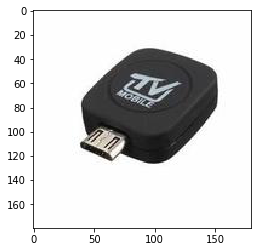

14849303-1.jpg


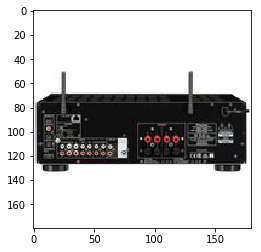

16578914-0.jpg


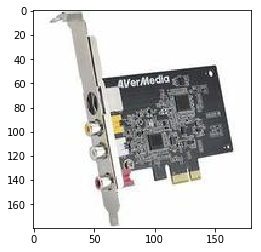

16578914-1.jpg


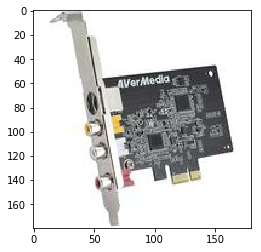

17406870-1.jpg


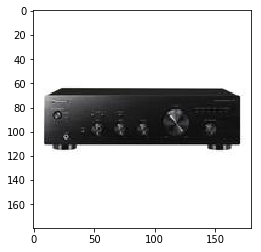

18388588-0.jpg


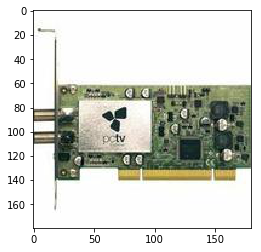

21179409-3.jpg


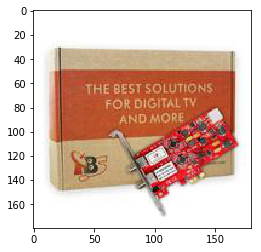

22992031-0.jpg


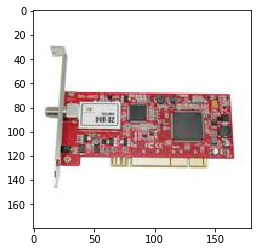

22992031-1.jpg


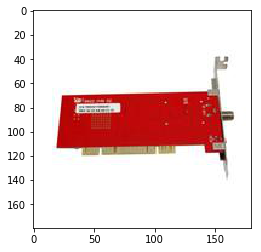

23460765-0.jpg


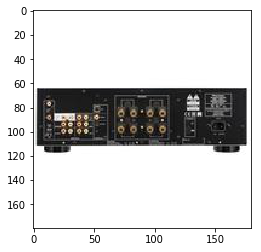

23460765-1.jpg


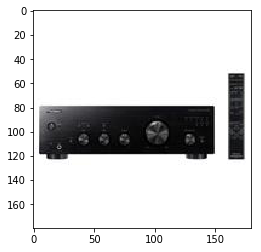

23605500-0.jpg


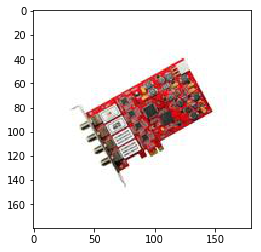

3718157-3.jpg


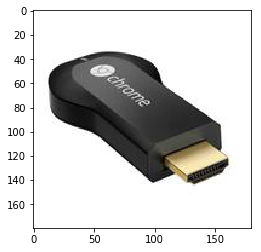

4479442-0.jpg


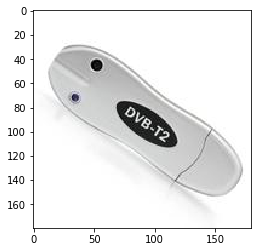

4479442-3.jpg


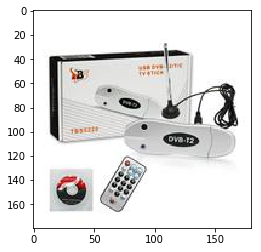

IndexError: list index out of range

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import os
import matplotlib.image as mpimg

folder = './data/files/train_small'
categories = os.listdir(folder)
category = categories[5] 
print(category)
files = os.listdir(os.path.join(folder, category))
files.sort()
#print(type(files))
for i in range(0, 30, 1):
    print(str(files[i]))
    img = mpimg.imread(os.path.join(folder, category, files[i]))
    plt.imshow(img)
    plt.show()

### X. Others

In [5]:
categories = os.listdir(out_folder)

In [6]:
len(categories)

5270

In [7]:
# Create output folder for val
out_folder_val = './data/files/valid_full'
if not os.path.exists(out_folder_val):
    os.makedirs(out_folder_val)

In [8]:
for category in tqdm(categories):
    os.mkdir(os.path.join(out_folder_val, str(category)))

100%|██████████| 5270/5270 [00:00<00:00, 55608.62it/s]


In [ ]:
len(os.listdir(out_folder))

5270

In [14]:
import shutil
categories = os.listdir(out_folder)
#for i in range(201, 5267):
    path = os.path.join(out_folder, categories[i])
    path_val = os.path.join(out_folder_val, categories[i])
    shutil.rmtree(path)   
    shutil.rmtree(path_val)

In [21]:
import random, shutil
out_folder_val = './data/files/valid_2'
out_folder = './data/files/train'

for category in os.listdir(out_folder):
    #os.mkdir(os.path.join(out_folder_val, str(category)))
    files = os.listdir(os.path.join(out_folder, str(category)))
    files.sort()
    print(files)
    break
    #length = len(files)
    #print(length, int(length*0.2))
    #for i in range(int(length*0.2)):
        #file = random.choice(os.listdir(os.path.join(out_folder, category)))
        #print(file)
        #shutil.move(os.path.join(out_folder, category, file), os.path.join(out_folder_val, category))

['10258911-0.jpg', '10539019-0.jpg', '10539019-1.jpg', '10539019-2.jpg', '10539019-3.jpg', '1082041-0.jpg', '10890887-0.jpg', '11037536-0.jpg', '11271904-0.jpg', '11271904-1.jpg', '11271904-2.jpg', '11271904-3.jpg', '11327420-0.jpg', '11346363-0.jpg', '11549040-1.jpg', '11549040-2.jpg', '11549040-3.jpg', '11884420-0.jpg', '11990552-0.jpg', '11990552-1.jpg', '11990552-2.jpg', '12569647-0.jpg', '12605776-0.jpg', '12615755-0.jpg', '13517825-0.jpg', '13776685-0.jpg', '13776685-1.jpg', '13776685-2.jpg', '13776685-3.jpg', '14071757-0.jpg', '14501686-0.jpg', '14511871-0.jpg', '14578504-0.jpg', '14701532-0.jpg', '14701532-1.jpg', '14701532-2.jpg', '1478604-0.jpg', '14922243-0.jpg', '1526561-0.jpg', '1526561-1.jpg', '1526561-2.jpg', '1526561-3.jpg', '15461688-0.jpg', '15680706-0.jpg', '15922158-0.jpg', '16026398-0.jpg', '16067624-0.jpg', '16067624-1.jpg', '16067624-2.jpg', '16067624-3.jpg', '16277047-0.jpg', '16321765-0.jpg', '16441141-0.jpg', '16596556-0.jpg', '16619725-1.jpg', '16628668-0.jpg

category count
0  1000020863  1345
1  1000014480   103
2  1000014617    11
3  1000020157    12
4  1000007146    33

In [24]:
import shutil, random
import matplotlib.pyplot as plt
%matplotlib inline

out_folder = './data/files/train'
out_folder_decreased = './data/files/train_decreased'
if not os.path.exists(out_folder_decreased):
    os.makedirs(out_folder_decreased)
    
for category in os.listdir(out_folder):
    #os.mkdir(os.path.join(out_folder_val, str(category)))
    files = os.listdir(os.path.join(out_folder, category))
    length = len(files)
    if(length <= 500):
        shutil.copytree(os.path.join(out_folder, category), os.path.join(out_folder_decreased, category))
    else:
        os.mkdir(os.path.join(out_folder_decreased, category))
        for i in range(500):
            file = files.pop(random.randrange(len(files)))
            shutil.copy(os.path.join(out_folder, category, file), os.path.join(out_folder_decreased, category))
        #print(str(category) +' - ' +  str(length))

FileExistsError: [Errno 17] File exists: './data/files/train_decreased/1000005332'